# **Modeling Mental Health with Poisson Regression**

## **Requirements**

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import scipy
import ast
from math import factorial
#import sys
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations, product
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
#sys.path.insert(0, 'C:/Users/fscielzo/Documents/DataScience-GitHub/EDA')
from EDA import dtypes_df, change_type, count_col_nulls, corr_matrix, outliers_table, scatter_matrix, boxplot_2D_matrix, histogram_2D_matrix, ecdf_2D_matrix 
from EDA import  histogram, freq_table, outlier_filter, summary, boxplot, ecdfplot, stripplot_matrix, transform_to_dummies, cross_quant_cat_summary, quant_to_cat

## **Conceptual description of the data**

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. 
22 variables has been colleted from the survey.

The following table summarize conceptually the variables contained in the data set with which we will work along this project.

| Variable Name | Description | Type |
|----------|----------|----------|
| `Diabetes`    | 0 = no diabetes ; 1 = prediabetes or diabetes   | Binary   |
| `HighBP`    | 0 = no high blood pressure ; 1 = high blood pressure  | Binary  |
| `HighChol`   |  0 = no high cholesterol ; 1 = high cholesterol   |  Binary  |
|  `CholCheck`   |  0 = no cholesterol check in 5 years ; 1 = yes cholesterol check in 5 years  |  Binary  |
| `BMI` |   Body Mass Index  |  Quantitative  |
| `Smoker`   |  Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no ; 1 = yes  | Binary  |
|  `Stroke`  |  Have you had a stroke (ictus). 0 = no ; 1 = yes  | Binary  |
|  `HeartDiseaseorAttack`   |  coronary heart disease (CHD) or myocardial infarction (MI). 0 = no ; 1 = yes   |  Binary  |
| `PhysActivity`   | physical activity in past 30 days - not including job. 0 = no ; 1 = yes   | Binary   |
|  `Fruits`  |  Consume Fruit 1 or more times per day. 0 = no ; 1 = yes | Binary  |
|   `Veggies`      |  Consume Vegetables 1 or more times per day. 0 = no ; 1 = yes   | Binary  |
| `HvyAlcoholConsump`   |  (adult men >=14 drinks per week and adult women>=7 drinks per week). 0 = no ; 1 = yes | Binary   |
| `AnyHealthcare`   |  Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no ; 1 = yes  |  Binary  |
| `NoDocbcCost`  |  Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no ; 1 = yes  |  Binary  |
|  `GenHlth`  |  Would you say that in general your health is: scale 1-5. 1 = excellent ; 2 = very good ; 3 = good ; 4 = fair ; 5 = poor  |  Multiclass  |
|  `MentHlth`  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days  |  Quantitative |
|  `PhysHlth`  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days  |  Quantitative  |
| `DiffWalk` |  Do you have serious difficulty walking or climbing stairs? 0 = no ; 1 = yes   | Binary    |
|  `Sex`  |   0 = female ; 1 = male  |  Binary   |
|  `Age`  |  13-level age category. 0 = [18, 24] ; 1 = [25 ,29 ]   ; 2 = [30 ,34 ]   ; 3 = [35 ,39 ]    ; 4 = [40 , 44]    ; 5 = [ 45, 49]    ; 6 = [50 , 54]    ; 7 = [55 , 59]    ; 8 = [60 , 64]  ; 9 = [65 , 69] ; 10 = [70 , 74]  ; 11 = [75 , 79]  ; 12 = 80 or older  |  Multiclass   |
| `Education`   |  Education level scale 0-5. 0 = Never attended school or only kindergarten ; 1 = Elementary ; 2 = Some high school ; 3 = High school graduate ; 4 = Some college or technical school ; 5 = College graduate   |   Multiclass  |
| `Income` | Income scale scale 0-7. 0 = lower than 0k ; 1 = [10k, 15k) ; 2 = [15k, 20k) ; 3 = [20k, 25k) ; 4 = [25k, 35k) ; 5 = [35k, 50k) ; 6 = [50k, 75k) ; 7 = higher than 75k | Multiclass |

the data has been obtained from `Kaggle`:  https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## **Reading the data**

First of all, we read the data.

In [3]:
mental_df = pl.read_csv('mental_health_data.csv')

In [4]:
mental_df.head(7)

shape: (7, 22)
┌──────────┬────────┬──────────┬───────────┬───┬─────┬──────┬───────────┬────────┐
│ Diabetes ┆ HighBP ┆ HighChol ┆ CholCheck ┆ … ┆ Sex ┆ Age  ┆ Education ┆ Income │
│ ---      ┆ ---    ┆ ---      ┆ ---       ┆   ┆ --- ┆ ---  ┆ ---       ┆ ---    │
│ f64      ┆ f64    ┆ f64      ┆ f64       ┆   ┆ f64 ┆ f64  ┆ f64       ┆ f64    │
╞══════════╪════════╪══════════╪═══════════╪═══╪═════╪══════╪═══════════╪════════╡
│ 0.0      ┆ 1.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 4.0  ┆ 6.0       ┆ 8.0    │
│ 0.0      ┆ 1.0    ┆ 1.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 12.0 ┆ 6.0       ┆ 8.0    │
│ 0.0      ┆ 0.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 13.0 ┆ 6.0       ┆ 8.0    │
│ 0.0      ┆ 1.0    ┆ 1.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 11.0 ┆ 6.0       ┆ 8.0    │
│ 0.0      ┆ 0.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 0.0 ┆ 8.0  ┆ 5.0       ┆ 8.0    │
│ 0.0      ┆ 0.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 0.0 ┆ 1.0  ┆ 4.0       ┆ 7.0    │
│ 0.0      ┆ 0.0    ┆ 1.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 13.0 ┆ 5.0       ┆ 6.0    │
└──────────┴────────┴──────────┴───────────┴───┴─────┴──────┴───────────┴────────┘

In [5]:
mental_df.shape

(70692, 22)

## **Data preprocessing**

In this section we are going to carry out some preprocessing tasks on the data.

### **Data types**

We check the variables data types according to `polars` structure.

In [6]:
dtypes_df(df=mental_df)

shape: (22, 2)
┌───────────┬─────────────┐
│ Columns   ┆ Python_type │
│ ---       ┆ ---         │
│ str       ┆ object      │
╞═══════════╪═════════════╡
│ Diabetes  ┆ Float64     │
│ HighBP    ┆ Float64     │
│ HighChol  ┆ Float64     │
│ CholCheck ┆ Float64     │
│ …         ┆ …           │
│ Sex       ┆ Float64     │
│ Age       ┆ Float64     │
│ Education ┆ Float64     │
│ Income    ┆ Float64     │
└───────────┴─────────────┘

### **Unique values**

We compute the unique values of each variable, what is useful to get a more real idea of their nature.

In [7]:
for col in mental_df.columns :
    display(mental_df[col].unique())

shape: (2,)
Series: 'Diabetes' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'HighBP' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'HighChol' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'CholCheck' [f64]
[
	0.0
	1.0
]

shape: (80,)
Series: 'BMI' [f64]
[
	12.0
	13.0
	14.0
	15.0
	16.0
	17.0
	18.0
	19.0
	20.0
	21.0
	22.0
	23.0
	…
	79.0
	80.0
	81.0
	82.0
	83.0
	84.0
	85.0
	86.0
	87.0
	89.0
	92.0
	95.0
	98.0
]

shape: (2,)
Series: 'Smoker' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'Stroke' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'HeartDiseaseorAttack' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'PhysActivity' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'Fruits' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'Veggies' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'HvyAlcoholConsump' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'AnyHealthcare' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'NoDocbcCost' [f64]
[
	0.0
	1.0
]

shape: (5,)
Series: 'GenHlth' [f64]
[
	1.0
	2.0
	3.0
	4.0
	5.0
]

shape: (31,)
Series: 'MentHlth' [f64]
[
	0.0
	1.0
	2.0
	3.0
	4.0
	5.0
	6.0
	7.0
	8.0
	9.0
	10.0
	11.0
	…
	18.0
	19.0
	20.0
	21.0
	22.0
	23.0
	24.0
	25.0
	26.0
	27.0
	28.0
	29.0
	30.0
]

shape: (31,)
Series: 'PhysHlth' [f64]
[
	0.0
	1.0
	2.0
	3.0
	4.0
	5.0
	6.0
	7.0
	8.0
	9.0
	10.0
	11.0
	…
	18.0
	19.0
	20.0
	21.0
	22.0
	23.0
	24.0
	25.0
	26.0
	27.0
	28.0
	29.0
	30.0
]

shape: (2,)
Series: 'DiffWalk' [f64]
[
	0.0
	1.0
]

shape: (2,)
Series: 'Sex' [f64]
[
	0.0
	1.0
]

shape: (13,)
Series: 'Age' [f64]
[
	1.0
	2.0
	3.0
	4.0
	5.0
	6.0
	7.0
	8.0
	9.0
	10.0
	11.0
	12.0
	13.0
]

shape: (6,)
Series: 'Education' [f64]
[
	1.0
	2.0
	3.0
	4.0
	5.0
	6.0
]

shape: (8,)
Series: 'Income' [f64]
[
	1.0
	2.0
	3.0
	4.0
	5.0
	6.0
	7.0
	8.0
]

### **Standard encoding**

We will apply standard encoding on the categorical variables.

The variables to apply standard encoding are the following:

In [8]:
cols_to_std_encoding = ['GenHlth', 'Age', 'Education', 'Income']

In [9]:
for col in cols_to_std_encoding :

    X_std_encoding = OrdinalEncoder(dtype=int).fit_transform(mental_df[[col]]).flatten()
    mental_df = mental_df.with_columns(pl.Series(X_std_encoding).alias(col))

In [10]:
mental_df.head()

shape: (5, 22)
┌──────────┬────────┬──────────┬───────────┬───┬─────┬─────┬───────────┬────────┐
│ Diabetes ┆ HighBP ┆ HighChol ┆ CholCheck ┆ … ┆ Sex ┆ Age ┆ Education ┆ Income │
│ ---      ┆ ---    ┆ ---      ┆ ---       ┆   ┆ --- ┆ --- ┆ ---       ┆ ---    │
│ f64      ┆ f64    ┆ f64      ┆ f64       ┆   ┆ f64 ┆ i32 ┆ i32       ┆ i32    │
╞══════════╪════════╪══════════╪═══════════╪═══╪═════╪═════╪═══════════╪════════╡
│ 0.0      ┆ 1.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 3   ┆ 5         ┆ 7      │
│ 0.0      ┆ 1.0    ┆ 1.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 11  ┆ 5         ┆ 7      │
│ 0.0      ┆ 0.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 12  ┆ 5         ┆ 7      │
│ 0.0      ┆ 1.0    ┆ 1.0      ┆ 1.0       ┆ … ┆ 1.0 ┆ 10  ┆ 5         ┆ 7      │
│ 0.0      ┆ 0.0    ┆ 0.0      ┆ 1.0       ┆ … ┆ 0.0 ┆ 7   ┆ 4         ┆ 7      │
└──────────┴────────┴──────────┴───────────┴───┴─────┴─────┴───────────┴────────┘

### **Changing  data types**



We will change the `Polars` data type of some columns.

In [11]:
len_unique = []
columns_df = np.array(mental_df.columns)
for col in columns_df :
    len_unique.append(len(mental_df[col].unique()))
len_unique = np.array(len_unique)

In [12]:
binary_columns = columns_df[len_unique == 2].tolist()
multi_columns = columns_df[(len_unique > 2) & (len_unique <= 13)].tolist()
cat_columns = binary_columns + multi_columns
quant_columns = columns_df[len_unique > 13].tolist()

In [13]:
cols_to_int = binary_columns + multi_columns

In [14]:
for col in cols_to_int :
    mental_df = change_type(df=mental_df, col_name=col, new_type=pl.Int64)

In [15]:
mental_df.head()

shape: (5, 22)
┌──────────┬────────┬──────────┬───────────┬───┬─────┬─────┬───────────┬────────┐
│ Diabetes ┆ HighBP ┆ HighChol ┆ CholCheck ┆ … ┆ Sex ┆ Age ┆ Education ┆ Income │
│ ---      ┆ ---    ┆ ---      ┆ ---       ┆   ┆ --- ┆ --- ┆ ---       ┆ ---    │
│ i64      ┆ i64    ┆ i64      ┆ i64       ┆   ┆ i64 ┆ i64 ┆ i64       ┆ i64    │
╞══════════╪════════╪══════════╪═══════════╪═══╪═════╪═════╪═══════════╪════════╡
│ 0        ┆ 1      ┆ 0        ┆ 1         ┆ … ┆ 1   ┆ 3   ┆ 5         ┆ 7      │
│ 0        ┆ 1      ┆ 1        ┆ 1         ┆ … ┆ 1   ┆ 11  ┆ 5         ┆ 7      │
│ 0        ┆ 0      ┆ 0        ┆ 1         ┆ … ┆ 1   ┆ 12  ┆ 5         ┆ 7      │
│ 0        ┆ 1      ┆ 1        ┆ 1         ┆ … ┆ 1   ┆ 10  ┆ 5         ┆ 7      │
│ 0        ┆ 0      ┆ 0        ┆ 1         ┆ … ┆ 0   ┆ 7   ┆ 4         ┆ 7      │
└──────────┴────────┴──────────┴───────────┴───┴─────┴─────┴───────────┴────────┘

### **Missing values**

We check if there are missing values (null/NaN) in our data.

In [16]:
count_col_nulls(mental_df)

shape: (1, 22)
┌──────────┬────────┬──────────┬───────────┬───┬─────┬─────┬───────────┬────────┐
│ Diabetes ┆ HighBP ┆ HighChol ┆ CholCheck ┆ … ┆ Sex ┆ Age ┆ Education ┆ Income │
│ ---      ┆ ---    ┆ ---      ┆ ---       ┆   ┆ --- ┆ --- ┆ ---       ┆ ---    │
│ u32      ┆ u32    ┆ u32      ┆ u32       ┆   ┆ u32 ┆ u32 ┆ u32       ┆ u32    │
╞══════════╪════════╪══════════╪═══════════╪═══╪═════╪═════╪═══════════╪════════╡
│ 0        ┆ 0      ┆ 0        ┆ 0         ┆ … ┆ 0   ┆ 0   ┆ 0         ┆ 0      │
└──────────┴────────┴──────────┴───────────┴───┴─────┴─────┴───────────┴────────┘

## **Train-Test Split**

We perform a train-test split. Along the most part of the project we will only use the train part, since it plays the role of the data that we have in reality, and the test partition only should be used to estimate the predictive performance of the model with "new" data (estimation of future performance).

In [17]:
response = 'MentHlth'
predictors = [x for x in mental_df.columns if x != response]

In [18]:
X = mental_df[predictors]
Y = mental_df[response]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=123)
X_Y_train_df = pl.concat((X_train, pl.DataFrame(Y_train)), how='horizontal')
X_Y_test_df = pl.concat((X_test, pl.DataFrame(Y_test)), how='horizontal')

## **EDA**

In this section we are going to complement this predictive modeling project with  an exploratory data analysis.

We are going to carry out an exploratory data analysis (EDA) only on training data, just because testing data plays the role of data that we really don't have on reality and only can be used to test models, no to extract any information that could be used to define some aspects of our predictive modeling process.

### **Descriptive summary**

In [19]:
quant_summary, cat_summary = summary(df=X_Y_train_df, auto_col=False,
                                     quant_col_names=quant_columns,
                                     cat_col_names=cat_columns)

In [20]:
quant_summary

BMI  MentHlth   PhysHlth
n_unique                  79        31         31
prop_nan                 0.0       0.0        0.0
mean               29.865249  3.751132   5.819679
std                 7.120358  8.155693  10.065874
min                     12.0       0.0        0.0
Q10                     22.0       0.0        0.0
Q25                     25.0       0.0        0.0
median                  29.0       0.0        0.0
Q75                     33.0       2.0        6.0
Q90                     39.0      15.0       30.0
max                     98.0      30.0       30.0
kurtosis            9.923542  7.500723   4.165429
skew                1.692153  2.389862   1.652748
n_outliers              1571      8279       7460
n_not_outliers         47913     41205      42024
prop_outliers       0.031748  0.167307   0.150756
prop_not_outliers   0.968252  0.832693   0.849244

In [21]:
cat_summary

Diabetes HighBP HighChol CholCheck Smoker Stroke  \
n_unique        2      2        2         2      2      2   
prop_nan      0.0    0.0      0.0       0.0    0.0    0.0   
mode            1      1        1         1      0      0   

         HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump  \
n_unique                    2            2      2       2                 2   
prop_nan                  0.0          0.0    0.0     0.0               0.0   
mode                        0            1      1       1                 0   

         AnyHealthcare NoDocbcCost DiffWalk  Sex GenHlth  Age Education Income  
n_unique             2           2        2    2       5   13         6      8  
prop_nan           0.0         0.0      0.0  0.0     0.0  0.0       0.0    0.0  
mode                 1           0        0    0       2    9         5      7

### **Outliers**

In [22]:
outliers_table(df=X_Y_train_df, auto=False, col_names=quant_columns)

shape: (3, 7)
┌──────────────┬─────────────┬─────────────┬────────────┬──────────────┬─────────────┬─────────────┐
│ quant_variab ┆ lower_bound ┆ upper_bound ┆ n_outliers ┆ n_not_outlie ┆ prop_outlie ┆ prop_not_ou │
│ les          ┆ ---         ┆ ---         ┆ ---        ┆ rs           ┆ rs          ┆ tliers      │
│ ---          ┆ f64         ┆ f64         ┆ i64        ┆ ---          ┆ ---         ┆ ---         │
│ str          ┆             ┆             ┆            ┆ i64          ┆ f64         ┆ f64         │
╞══════════════╪═════════════╪═════════════╪════════════╪══════════════╪═════════════╪═════════════╡
│ BMI          ┆ 13.0        ┆ 45.0        ┆ 1571       ┆ 47913        ┆ 0.031748    ┆ 0.968252    │
│ MentHlth     ┆ -3.0        ┆ 5.0         ┆ 8279       ┆ 41205        ┆ 0.167307    ┆ 0.832693    │
│ PhysHlth     ┆ -9.0        ┆ 15.0        ┆ 7460       ┆ 42024        ┆ 0.150756    ┆ 0.849244    │
└──────────────┴─────────────┴─────────────┴────────────┴──────────────┴─────────────┴─────────────┘

In [23]:
X_Y_train_df_trimmed = outlier_filter(X_Y_train_df, col='MentHlth', h=1.5)
X_Y_train_df_trimmed = outlier_filter(X_Y_train_df_trimmed, col='PhysHlth', h=1.5)

In [24]:
X_Y_train_df.shape

(49484, 22)

### **Response analysis**

#### **Histogram**

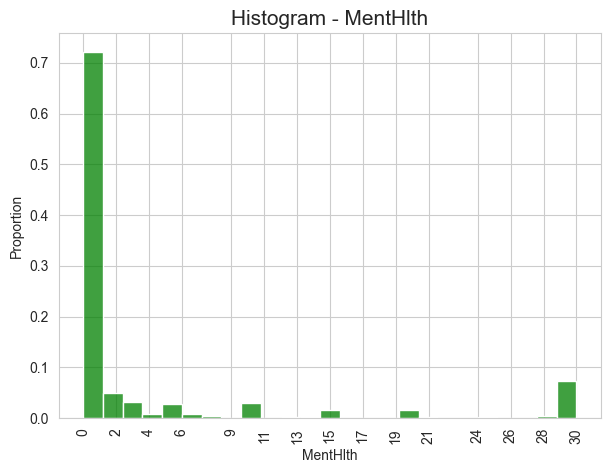

In [25]:
histogram(X=X_Y_train_df[response], bins=25, color='green', figsize=(7,5), random=True, n=500, seed=123, x_rotation=90) 

#### **Frequencies**

In [35]:
response_cat = quant_to_cat(X_Y_train_df[response], rule='quantiles', t=0.15)

In [36]:
freq_table(X=response_cat)

shape: (4, 5)
┌─────────────────────────┬──────────┬──────────┬──────────────┬──────────────┐
│ MentHlth: unique values ┆ abs_freq ┆ rel_freq ┆ cum_abs_freq ┆ cum_rel_freq │
│ ---                     ┆ ---      ┆ ---      ┆ ---          ┆ ---          │
│ object                  ┆ i64      ┆ f64      ┆ i64          ┆ f64          │
╞═════════════════════════╪══════════╪══════════╪══════════════╪══════════════╡
│ (-inf, 0]               ┆ 33656    ┆ 0.6801   ┆ 33656        ┆ 0.680139     │
│ (0, 2]                  ┆ 3745     ┆ 0.0757   ┆ 37401        ┆ 0.75582      │
│ (2, 15]                 ┆ 7693     ┆ 0.1555   ┆ 45094        ┆ 0.911284     │
│ (15, 30]                ┆ 4390     ┆ 0.0887   ┆ 49484        ┆ 1.0          │
└─────────────────────────┴──────────┴──────────┴──────────────┴──────────────┘

#### **Boxplot**

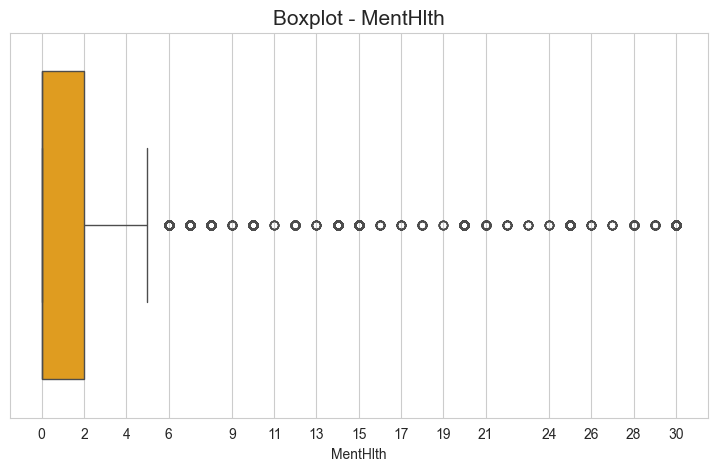

In [28]:
boxplot(X=X_Y_train_df[response], color='orange', figsize=(9,5), n_xticks=15, x_rotation=0, statistics=False)

#### **ECDF-plot**

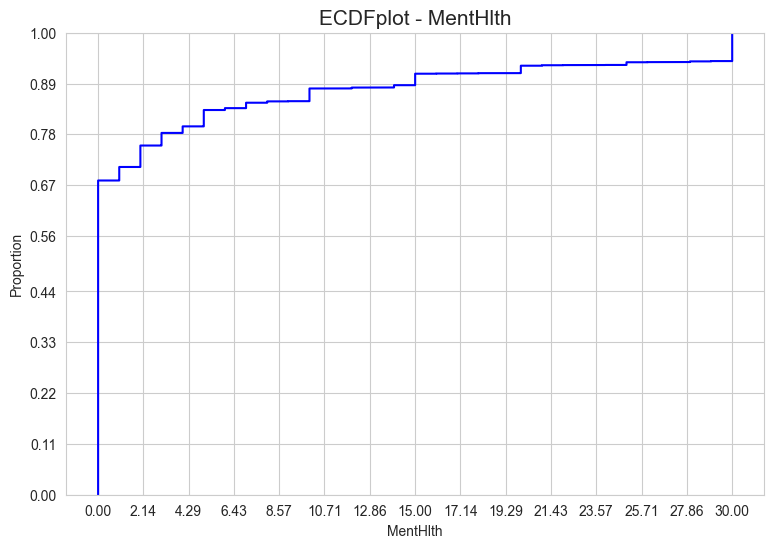

In [29]:
ecdfplot(X=X_Y_train_df['MentHlth'], color='blue', figsize=(9,6))

### **Relation between response and predictors**

In [30]:
quant_predictors = [x for x in quant_columns if x != response]
cat_predictors = [x for x in binary_columns + multi_columns if x != response]

In [31]:
corr_matrix(df=X_Y_train_df, response=response, predictors=quant_predictors, method='pearson')

MentHlth
BMI           0.10
PhysHlth      0.38

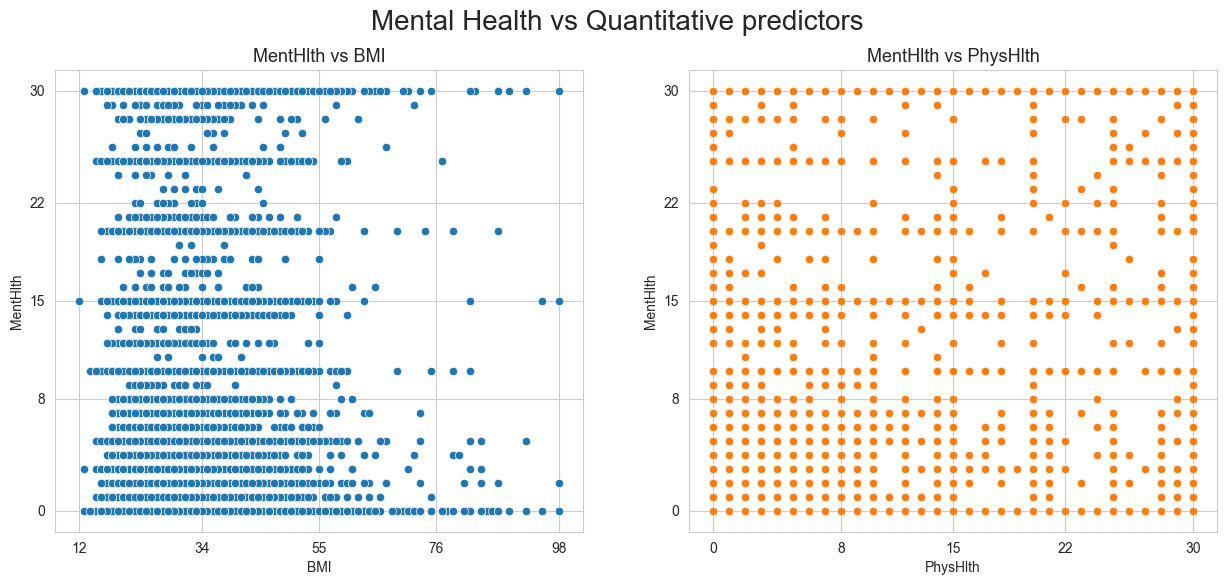

In [32]:
scatter_matrix(df=X_Y_train_df, n_cols=2, tittle='Mental Health vs Quantitative predictors', figsize=(15,6), 
                 response=[response], predictors=quant_predictors,
                 n_yticks=5, n_xticks=5, title_height=0.98, hspace=1, fontsize=20)

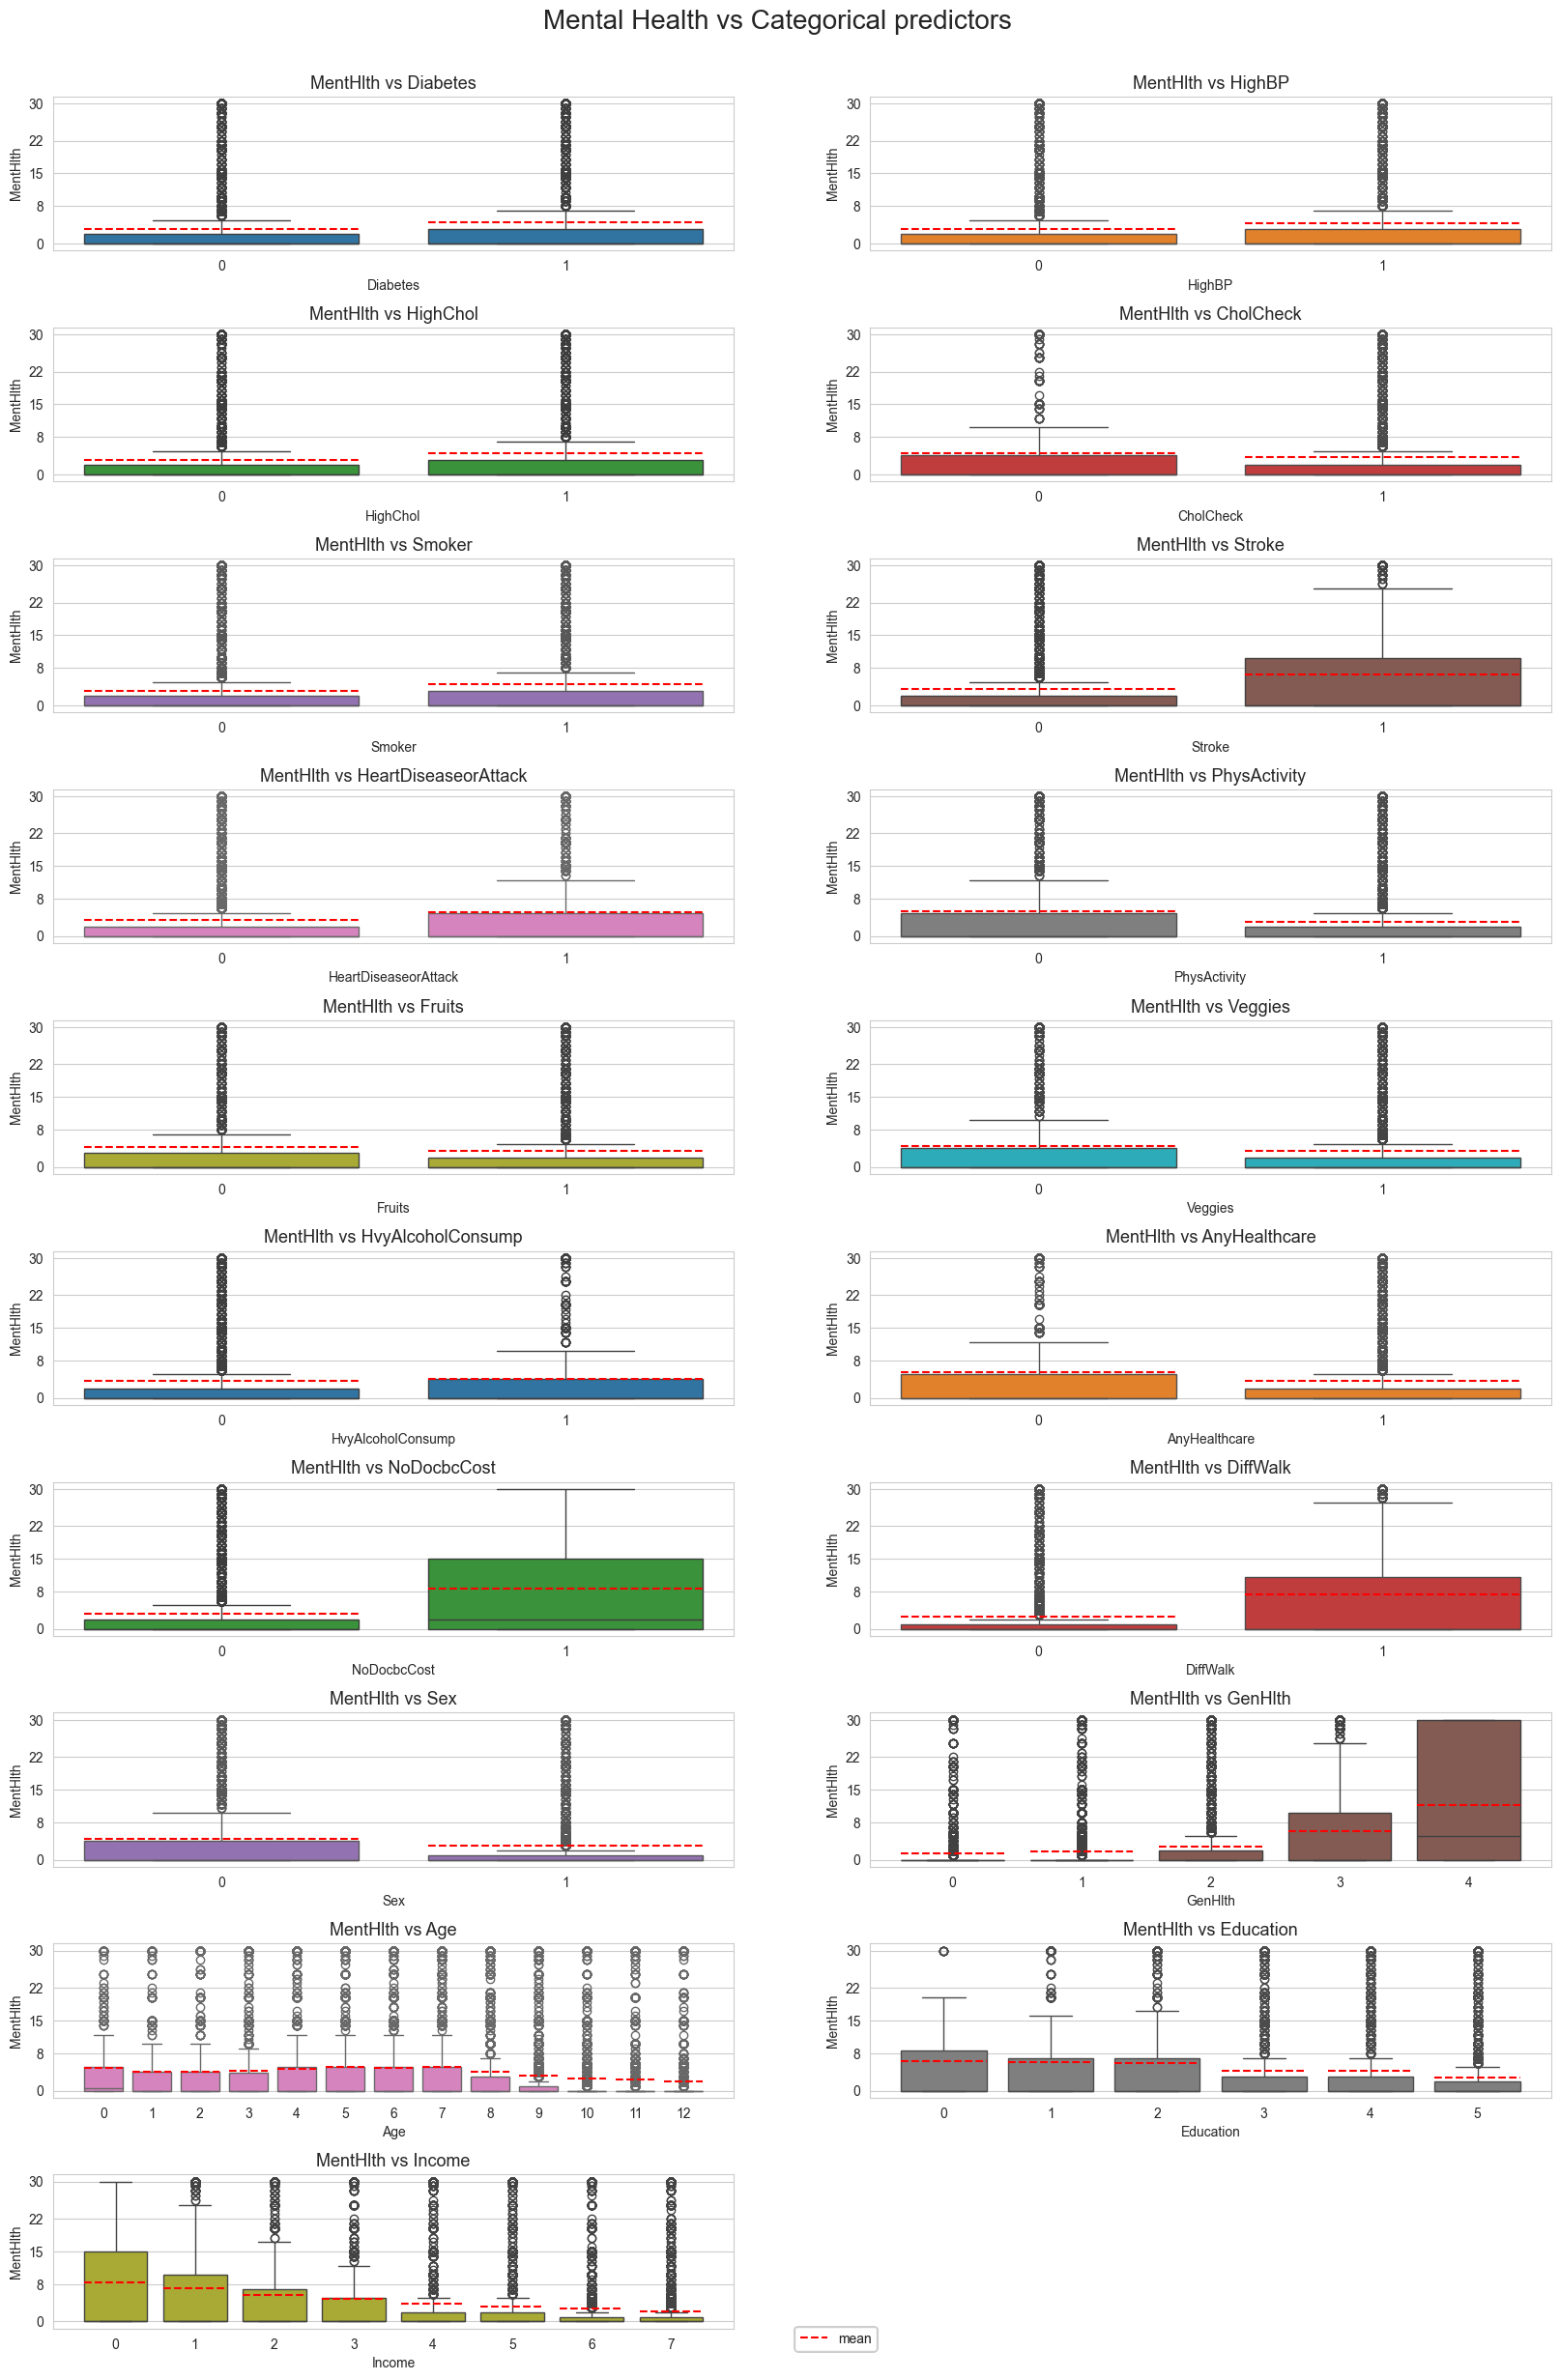

In [33]:
boxplot_2D_matrix(df=X_Y_train_df, n_cols=2, tittle='Mental Health vs Categorical predictors', figsize=(20,30), 
                 response=[response], predictors=cat_predictors,
                 n_yticks=5, title_height=0.91, hspace=0.5, fontsize=20,
                 statistics=['mean'], lines_width=0.8, bbox_to_anchor=(0.53,0.1), 
                 legend_size=10, color_stats=['red'], showfliers=True)

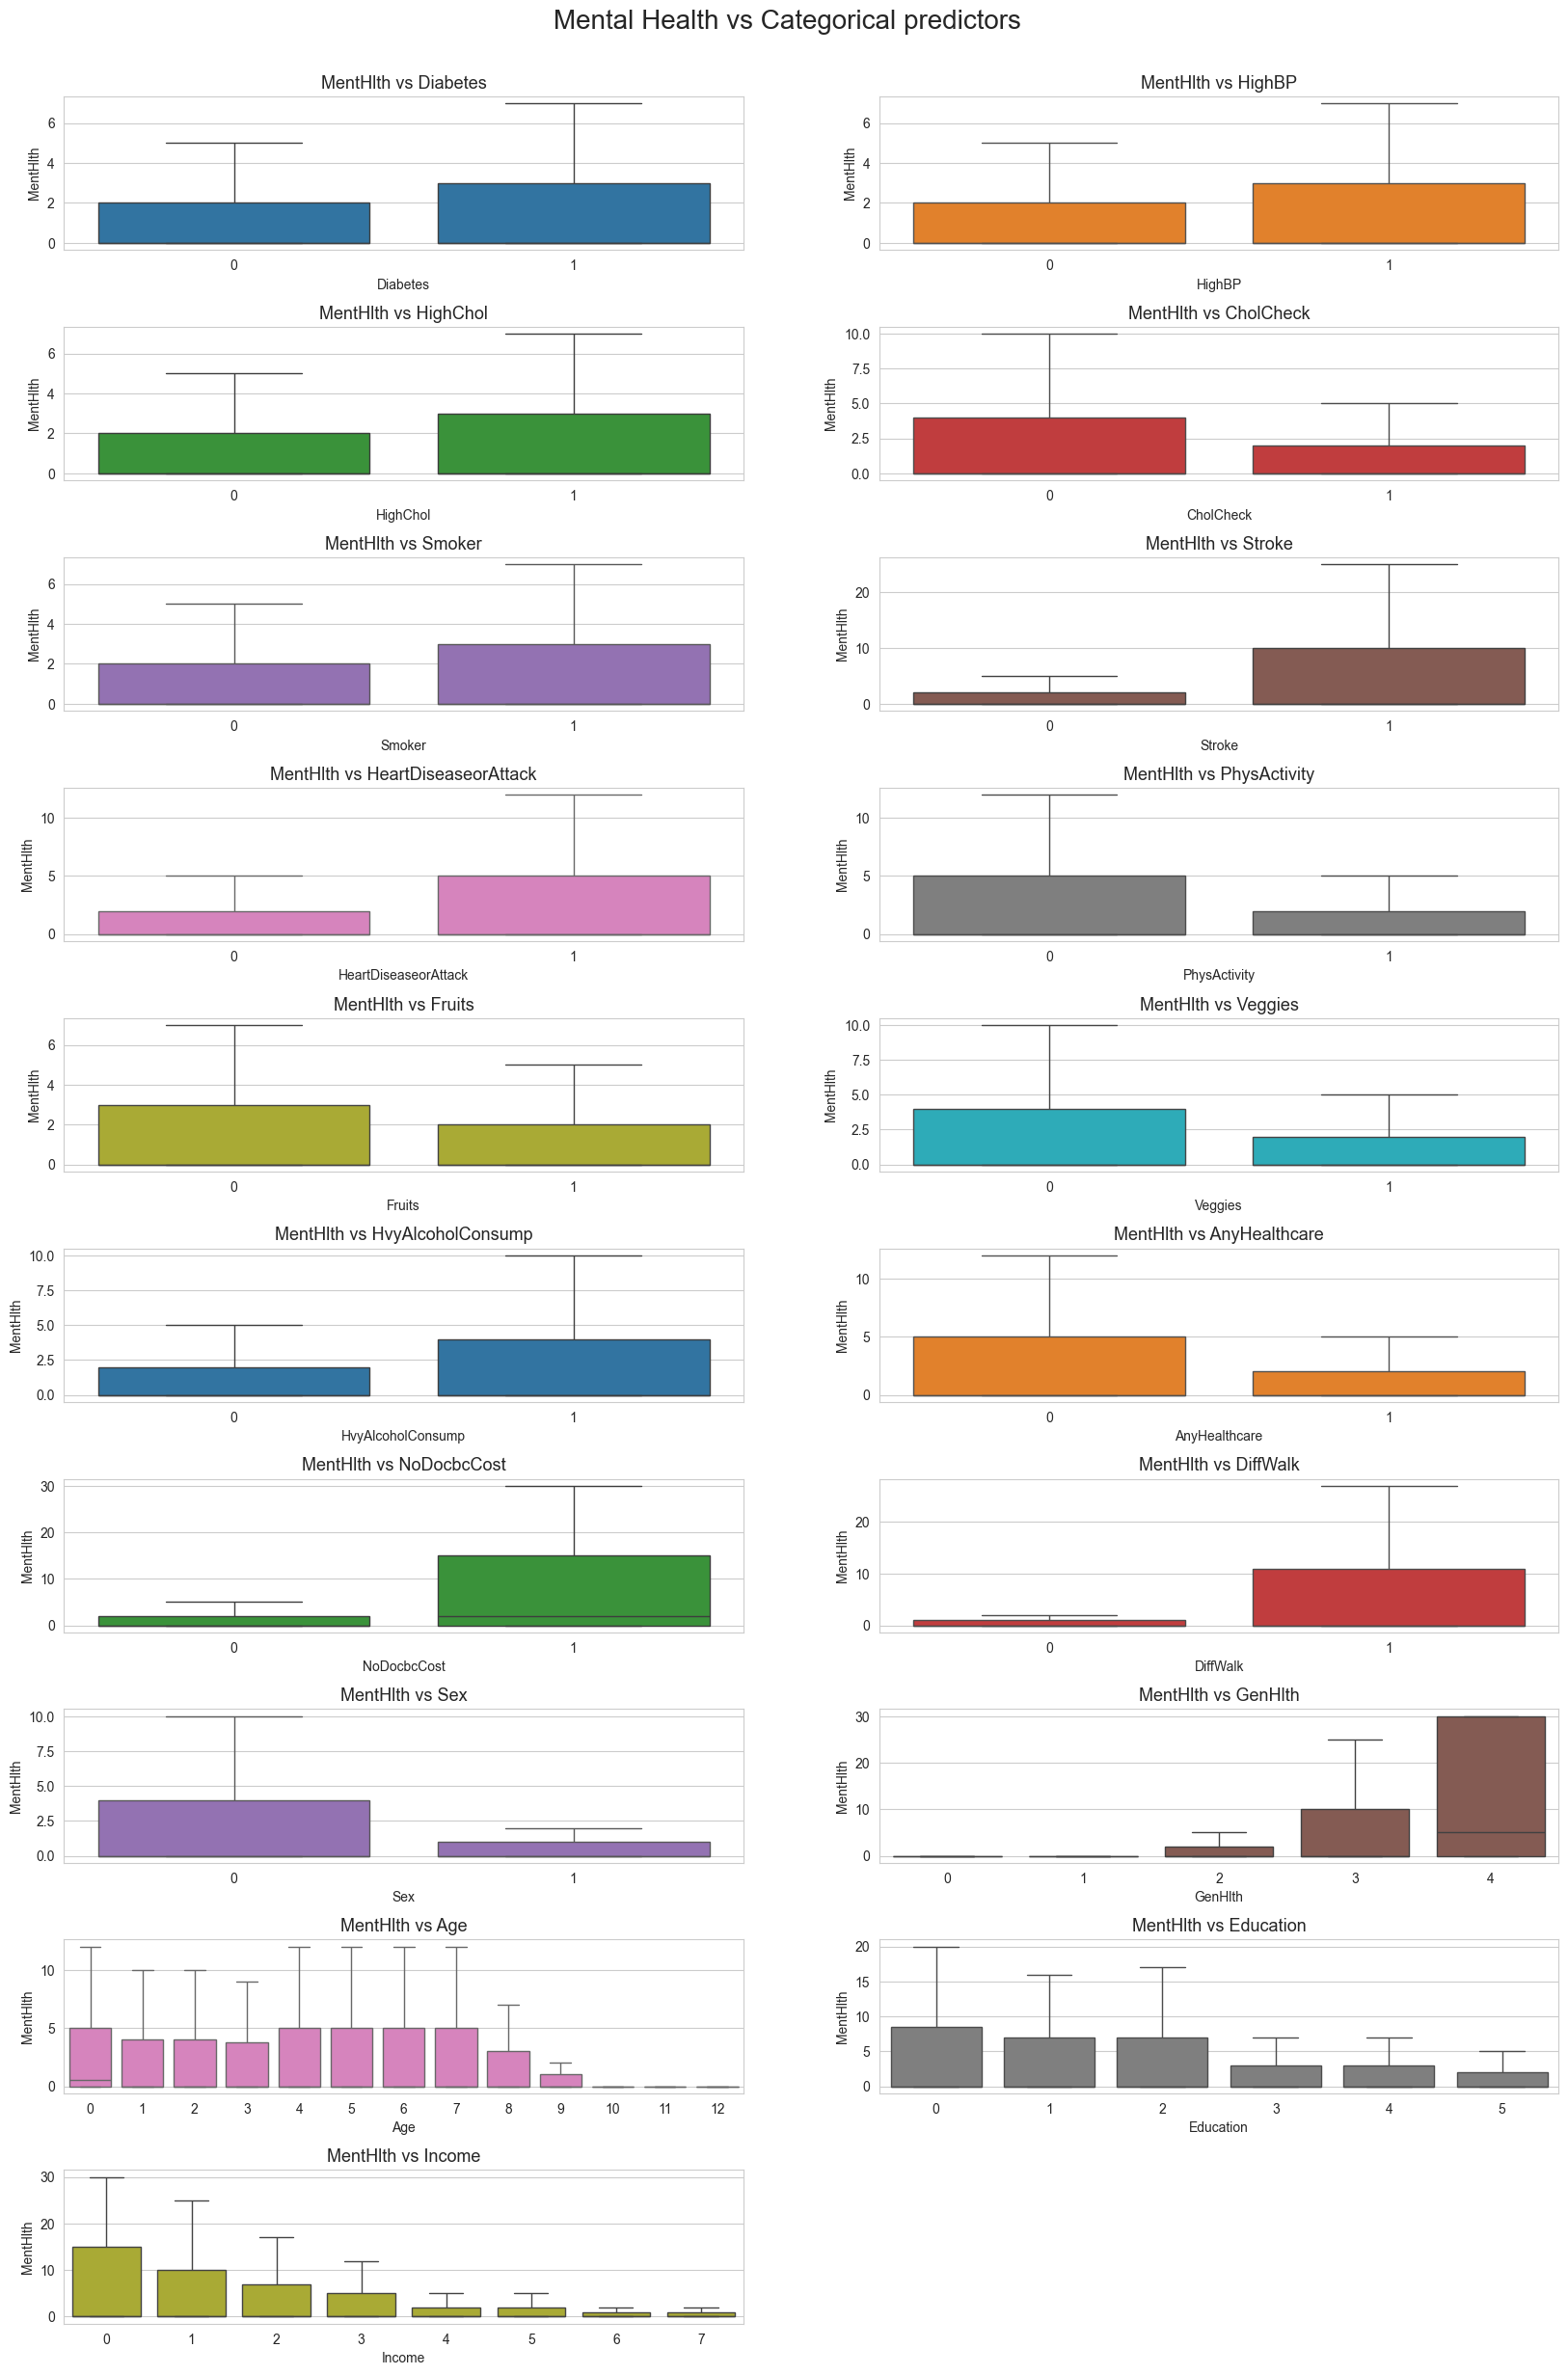

In [34]:
boxplot_2D_matrix(df=X_Y_train_df, n_cols=2, tittle='Mental Health vs Categorical predictors', figsize=(20,30), 
                 response=[response], predictors=cat_predictors,
                 n_yticks=5, title_height=0.91, hspace=0.5, fontsize=20,
                 showfliers=False)

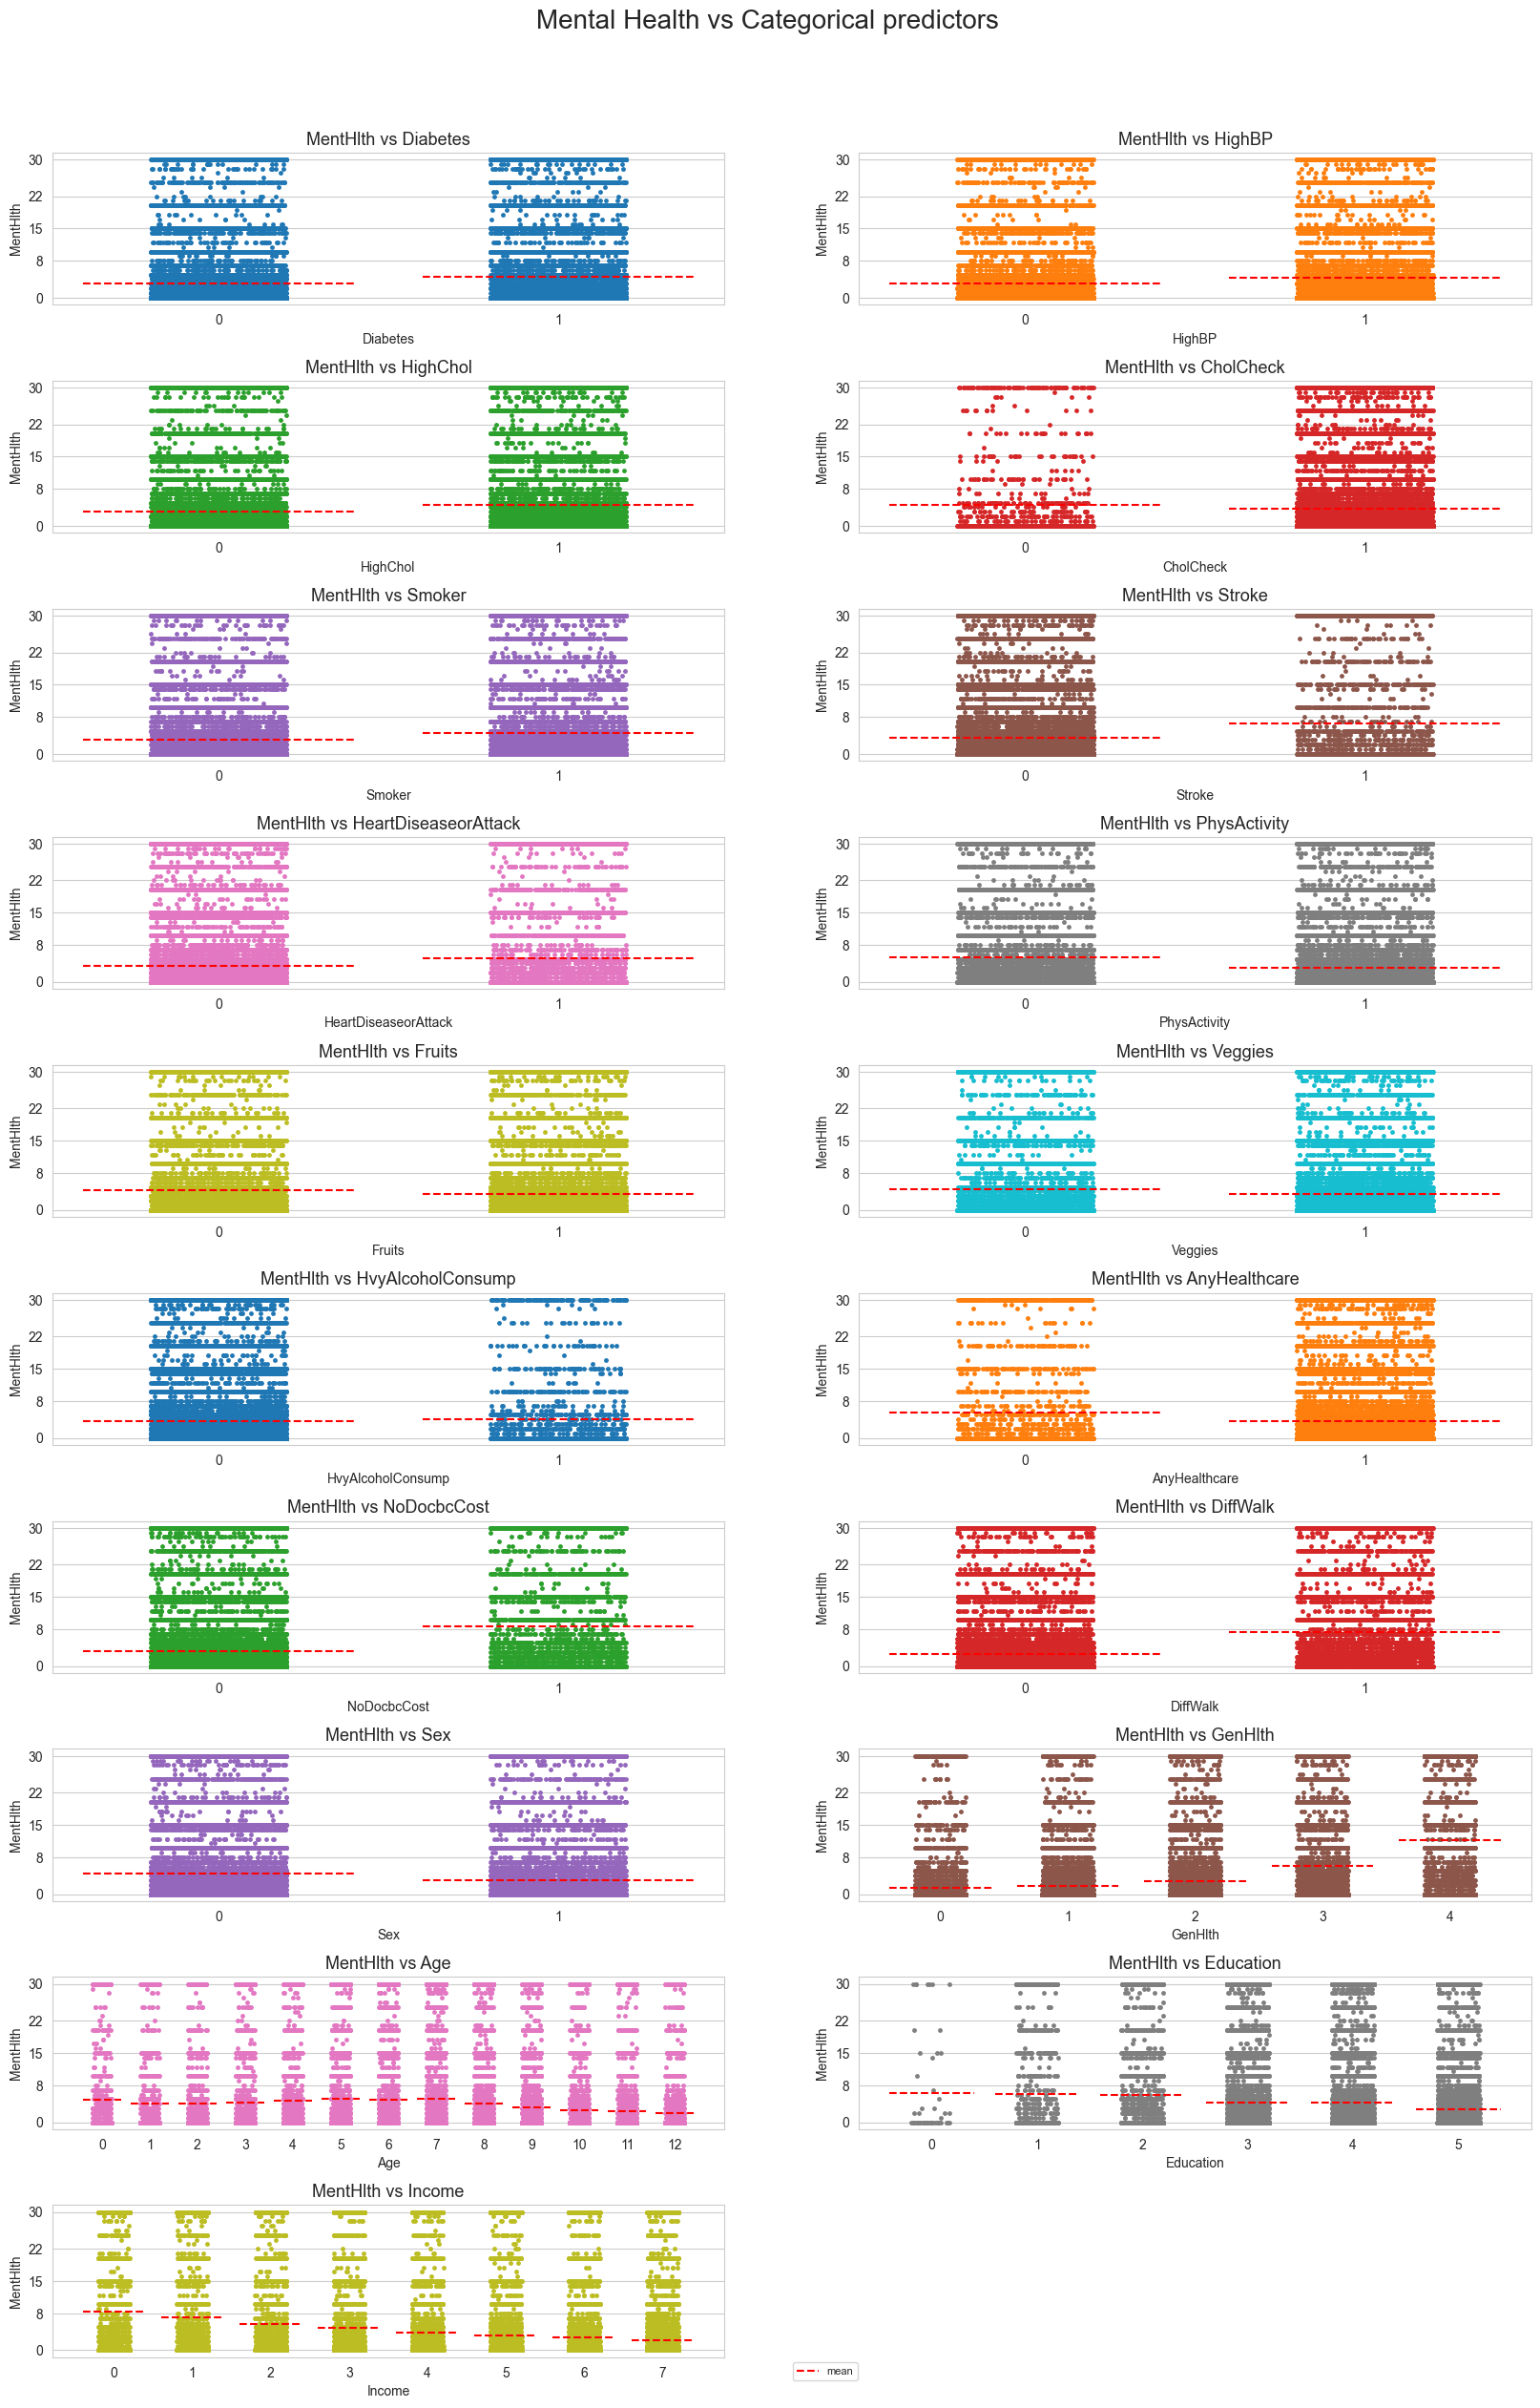

In [35]:
stripplot_matrix(df=X_Y_train_df, n_cols=2, tittle='Mental Health vs Categorical predictors', figsize=(20,30), jitter=0.2,
                 response=[response], predictors=cat_predictors,
                 n_yticks=5, title_height=0.93, hspace=0.5, fontsize=20,
                 statistics=['mean'], lines_width=0.8, bbox_to_anchor=(0.53, 0.1), 
                 legend_size=8, color_stats=['red'])

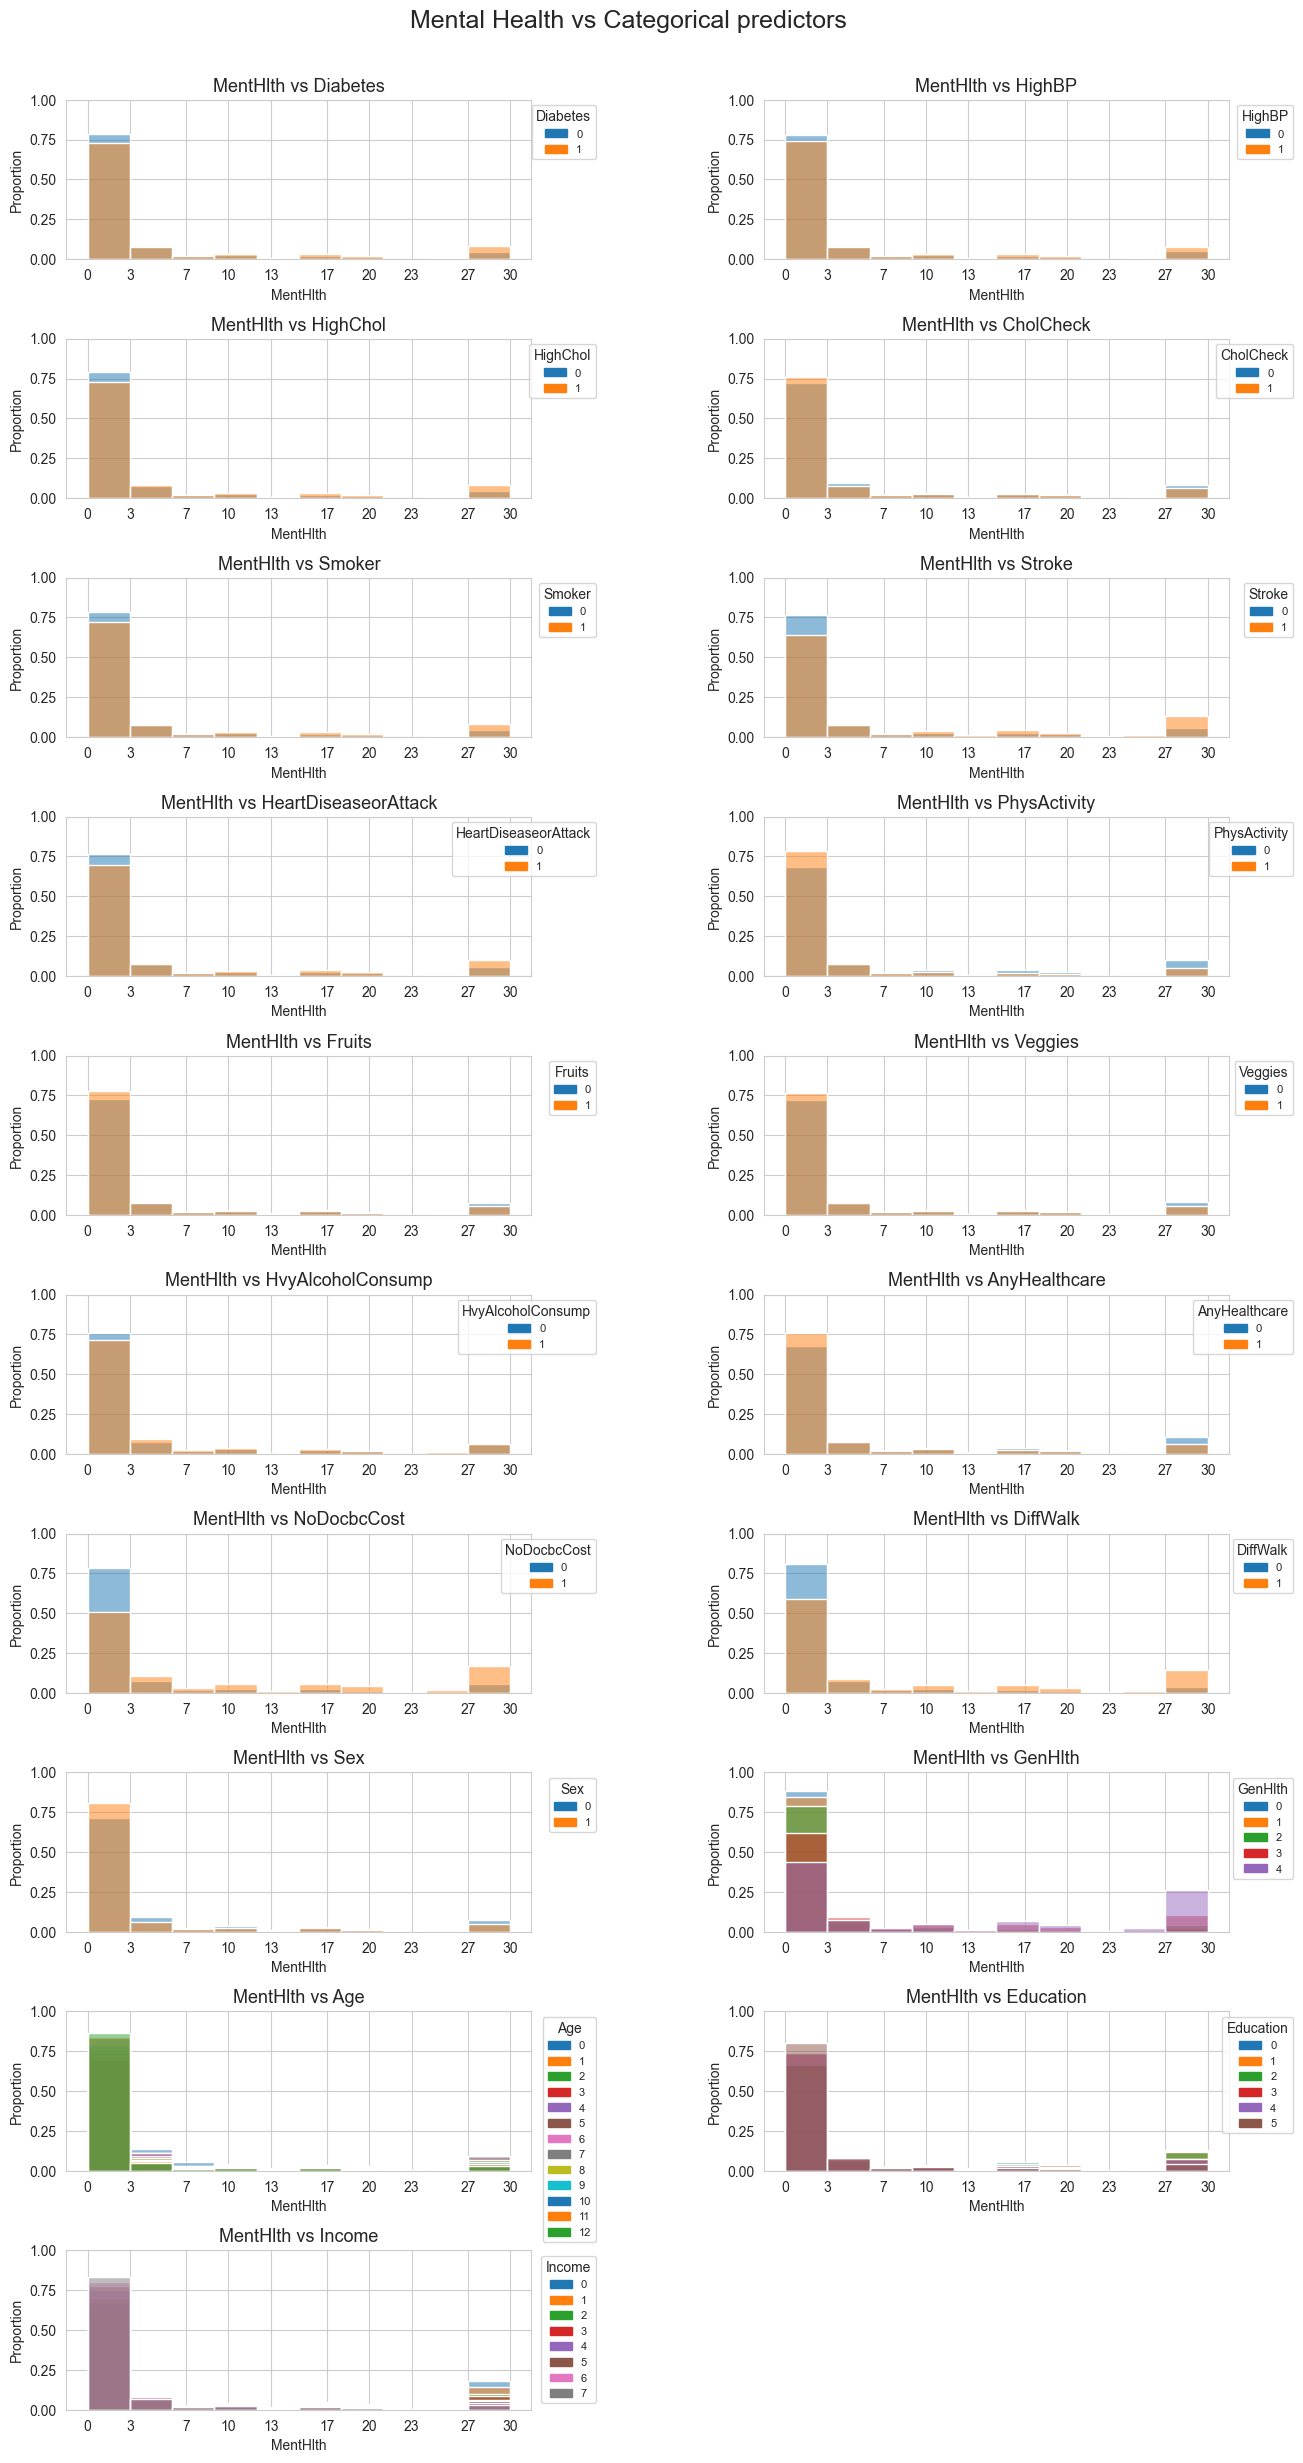

In [36]:
histogram_2D_matrix(df=X_Y_train_df, bins=10, n_cols=2, tittle='Mental Health vs Categorical predictors', figsize=(15,30), 
                 response=[response], predictors=cat_predictors,
                 n_yticks=5, n_xticks=10, title_height=0.91, fontsize=18,
                 bbox_to_anchor=(1.15, 1), wspace=0.5, hspace=0.5,
                 legend_size=8, transparency=0.5)

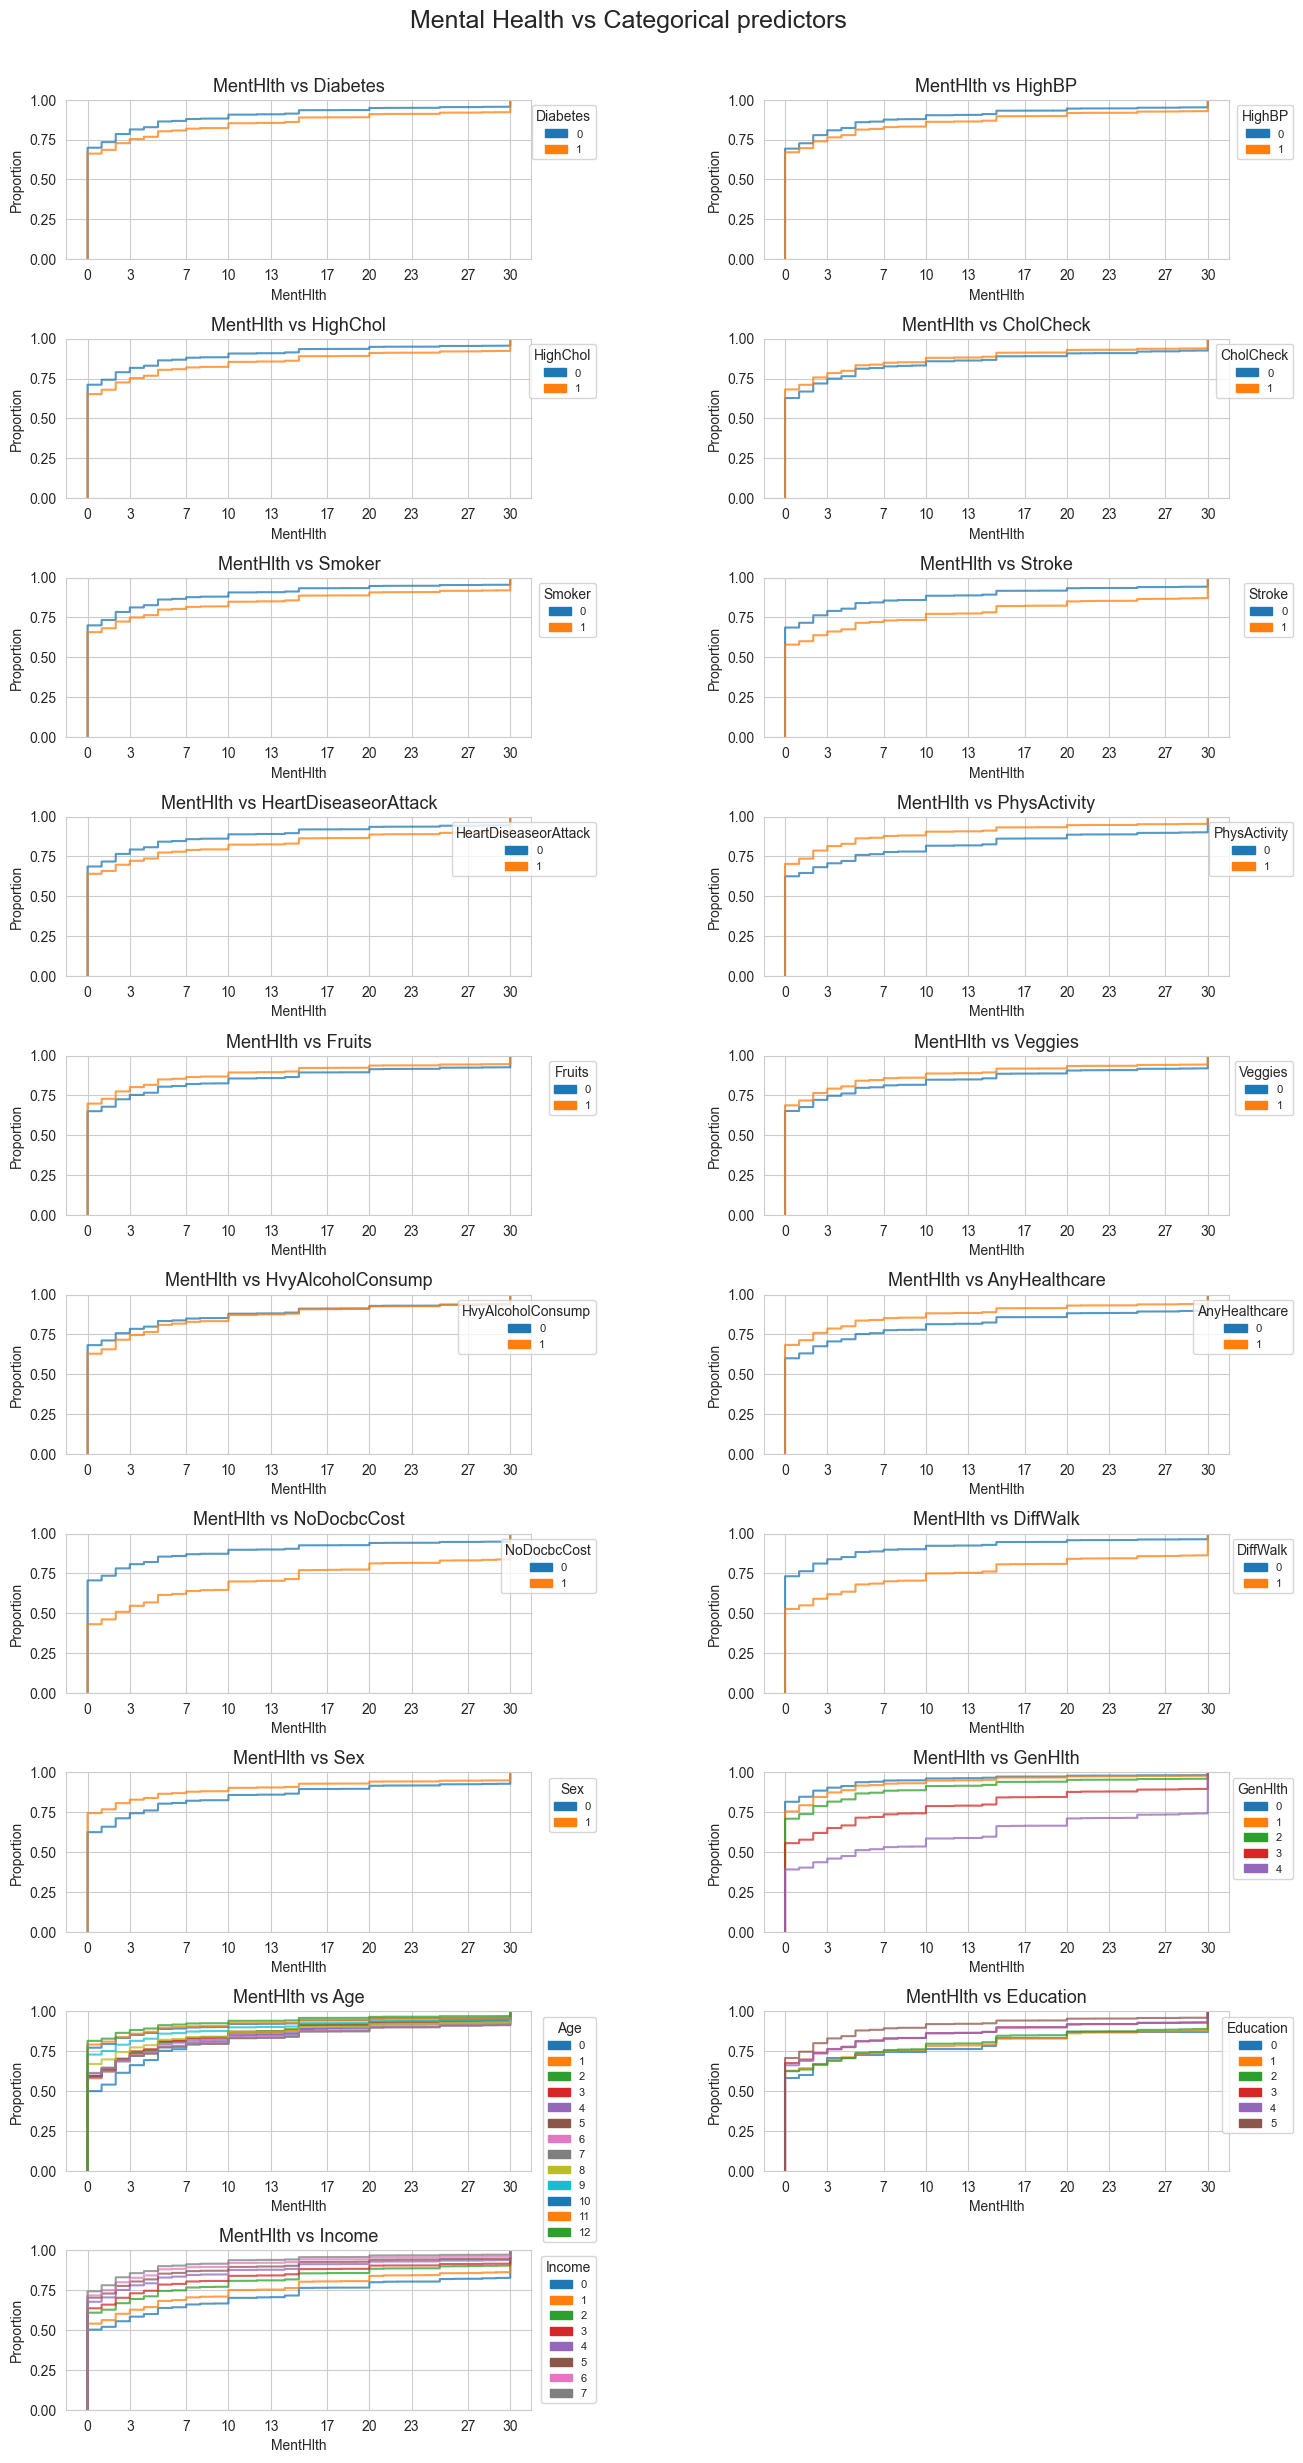

In [37]:
ecdf_2D_matrix(df=X_Y_train_df, n_cols=2, tittle='Mental Health vs Categorical predictors', figsize=(15,30), 
                 response=[response], predictors=cat_predictors,
                 n_xticks=10, n_yticks=5, title_height=0.91, fontsize=18,
                 bbox_to_anchor=(1.15, 1), wspace=0.5, hspace=0.5,
                 legend_size=8, transparency=0.75)

In [38]:
for col in cat_predictors:
    display(cross_quant_cat_summary(df=X_Y_train_df, quant_col=response, cat_col=col))

shape: (2, 14)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Diabetes ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---      ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│          ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│          ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0      ┆ 3.037     ┆ 7.209     ┆ 0.0       ┆ … ┆ 7.05      ┆ 2.815     ┆ 0.136506  ┆ 0.0       │
│ 1.0      ┆ 4.46      ┆ 8.941     ┆ 0.0       ┆ … ┆ 2.881     ┆ 2.066     ┆ 0.181734  ┆ 0.0       │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ HighBP ┆ mean_MentH ┆ std_MentHl ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---    ┆ lth        ┆ th         ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│        ┆ f64        ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0    ┆ 3.157      ┆ 7.382      ┆ 0.0       ┆ … ┆ 6.595     ┆ 2.747     ┆ 0.141036  ┆ 0.0       │
│ 1.0    ┆ 4.21       ┆ 8.679      ┆ 0.0       ┆ … ┆ 3.355     ┆ 2.166     ┆ 0.17203   ┆ 0.0       │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ HighChol ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---      ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│          ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│          ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0      ┆ 2.984     ┆ 7.178     ┆ 0.0       ┆ … ┆ 7.183     ┆ 2.837     ┆ 0.136073  ┆ 0.0       │
│ 1.0      ┆ 4.442     ┆ 8.889     ┆ 0.0       ┆ … ┆ 2.957     ┆ 2.082     ┆ 0.180473  ┆ 0.0       │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ CholCheck ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ ---       ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ f64       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 4.443     ┆ 8.859     ┆ 0.0       ┆ … ┆ 3.044     ┆ 2.107     ┆ 0.141827  ┆ 0.0      │
│ 1.0       ┆ 3.733     ┆ 8.136     ┆ 0.0       ┆ … ┆ 4.546     ┆ 2.398     ┆ 0.166763  ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (2, 14)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Smoker ┆ mean_MentH ┆ std_MentHl ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---    ┆ lth        ┆ th         ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│        ┆ f64        ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0    ┆ 3.042      ┆ 7.223      ┆ 0.0       ┆ … ┆ 7.01      ┆ 2.809     ┆ 0.13727   ┆ 0.0       │
│ 1.0    ┆ 4.528      ┆ 9.005      ┆ 0.0       ┆ … ┆ 2.763     ┆ 2.04      ┆ 0.183455  ┆ 0.0       │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Stroke ┆ mean_MentH ┆ std_MentHl ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---    ┆ lth        ┆ th         ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│        ┆ f64        ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0    ┆ 3.561      ┆ 7.925      ┆ 0.0       ┆ … ┆ 5.053     ┆ 2.489     ┆ 0.159565  ┆ 0.0       │
│ 1.0    ┆ 6.604      ┆ 10.658     ┆ 0.0       ┆ … ┆ 0.366     ┆ 1.407     ┆ 0.134024  ┆ 0.0       │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ HeartDise ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ aseorAtta ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ ck        ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│ ---       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│ f64       ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 3.498     ┆ 7.831     ┆ 0.0       ┆ … ┆ 5.261     ┆ 2.524     ┆ 0.157237  ┆ 0.0      │
│ 1.0       ┆ 5.212     ┆ 9.692     ┆ 0.0       ┆ … ┆ 1.71      ┆ 1.797     ┆ 0.174508  ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (2, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ PhysActiv ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ ity       ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 5.404     ┆ 9.73      ┆ 0.0       ┆ … ┆ 1.521     ┆ 1.736     ┆ 0.180731  ┆ 0.0      │
│ 1.0       ┆ 3.051     ┆ 7.277     ┆ 0.0       ┆ … ┆ 6.919     ┆ 2.801     ┆ 0.13634   ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (2, 14)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Fruits ┆ mean_MentH ┆ std_MentHl ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---    ┆ lth        ┆ th         ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│        ┆ f64        ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0    ┆ 4.365      ┆ 8.75       ┆ 0.0       ┆ … ┆ 3.131     ┆ 2.112     ┆ 0.178547  ┆ 0.0       │
│ 1.0    ┆ 3.361      ┆ 7.729      ┆ 0.0       ┆ … ┆ 5.67      ┆ 2.602     ┆ 0.149549  ┆ 0.0       │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Veggies ┆ mean_MentH ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---     ┆ lth        ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64     ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│         ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│         ┆            ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0     ┆ 4.575      ┆ 9.028     ┆ 0.0       ┆ … ┆ 2.7       ┆ 2.025     ┆ 0.151454  ┆ 0.0       │
│ 1.0     ┆ 3.53       ┆ 7.89      ┆ 0.0       ┆ … ┆ 5.151     ┆ 2.507     ┆ 0.157876  ┆ 0.0       │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ HvyAlcoho ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ lConsump  ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 3.734     ┆ 8.151     ┆ 0.0       ┆ … ┆ 4.532     ┆ 2.397     ┆ 0.166258  ┆ 0.0      │
│ 1.0       ┆ 4.132     ┆ 8.25      ┆ 0.0       ┆ … ┆ 3.863     ┆ 2.239     ┆ 0.128745  ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (2, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ AnyHealth ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ care      ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 5.554     ┆ 9.831     ┆ 0.0       ┆ … ┆ 1.392     ┆ 1.704     ┆ 0.183432  ┆ 0.0      │
│ 1.0       ┆ 3.667     ┆ 8.06      ┆ 0.0       ┆ … ┆ 4.73      ┆ 2.432     ┆ 0.163554  ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (2, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ NoDocbcCo ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ st        ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 3.242     ┆ 7.579     ┆ 0.0       ┆ … ┆ 6.07      ┆ 2.669     ┆ 0.144869  ┆ 0.0      │
│ 1.0       ┆ 8.704     ┆ 11.302    ┆ 0.0       ┆ … ┆ -0.605    ┆ 1.0       ┆ 0.0       ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (2, 14)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ DiffWalk ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---      ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│          ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│          ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0      ┆ 2.563     ┆ 6.612     ┆ 0.0       ┆ … ┆ 9.393     ┆ 3.162     ┆ 0.188504  ┆ 0.0       │
│ 1.0      ┆ 7.281     ┆ 10.844    ┆ 0.0       ┆ … ┆ 0.002     ┆ 1.263     ┆ 0.141     ┆ 0.0       │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (2, 14)
┌─────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ Sex ┆ mean_MentH ┆ std_MentHl ┆ min_MentHl ┆ … ┆ kurtosis_M ┆ skew_MentH ┆ prop_outl ┆ prop_nan_ │
│ --- ┆ lth        ┆ th         ┆ th         ┆   ┆ entHlth    ┆ lth        ┆ iers_Ment ┆ MentHlth  │
│ f64 ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ Hlth      ┆ ---       │
│     ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ f64        ┆ ---       ┆ f64       │
│     ┆            ┆            ┆            ┆   ┆            ┆            ┆ f64       ┆           │
╞═════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 0.0 ┆ 4.394      ┆ 8.654      ┆ 0.0        ┆ … ┆ 3.221      ┆ 2.123      ┆ 0.1412    ┆ 0.0       │
│ 1.0 ┆ 2.986      ┆ 7.448      ┆ 0.0        ┆ … ┆ 6.773      ┆ 2.802      ┆ 0.192626  ┆ 0.0       │
└─────┴────────────┴────────────┴────────────┴───┴────────────┴────────────┴───────────┴───────────┘

shape: (5, 14)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ GenHlth ┆ mean_MentH ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---     ┆ lth        ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64     ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│         ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│         ┆            ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0     ┆ 1.394      ┆ 4.783     ┆ 0.0       ┆ … ┆ 22.862    ┆ 4.677     ┆ 0.183865  ┆ 0.0       │
│ 1.0     ┆ 1.841      ┆ 5.342     ┆ 0.0       ┆ … ┆ 16.18     ┆ 3.959     ┆ 0.107473  ┆ 0.0       │
│ 2.0     ┆ 2.848      ┆ 6.899     ┆ 0.0       ┆ … ┆ 8.0       ┆ 2.948     ┆ 0.0       ┆ 0.0       │
│ 3.0     ┆ 6.208      ┆ 9.977     ┆ 0.0       ┆ … ┆ 0.838     ┆ 1.516     ┆ 0.244682  ┆ 0.0       │
│ 4.0     ┆ 11.673     ┆ 12.618    ┆ 0.0       ┆ … ┆ -1.482    ┆ 0.496     ┆ 0.131618  ┆ 0.0       │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

shape: (13, 14)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ Age  ┆ mean_MentH ┆ std_MentHl ┆ min_MentHl ┆ … ┆ kurtosis_M ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---  ┆ lth        ┆ th         ┆ th         ┆   ┆ entHlth    ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ Hlth      ┆ ---       │
│      ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ f64       ┆ ---       ┆ f64       │
│      ┆            ┆            ┆            ┆   ┆            ┆           ┆ f64       ┆           │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 0.0  ┆ 4.935      ┆ 8.242      ┆ 0.0        ┆ … ┆ 2.836      ┆ 1.958     ┆ 0.146802  ┆ 0.0       │
│ 1.0  ┆ 4.086      ┆ 7.901      ┆ 0.0        ┆ … ┆ 4.339      ┆ 2.302     ┆ 0.166224  ┆ 0.0       │
│ 2.0  ┆ 4.065      ┆ 7.92       ┆ 0.0        ┆ … ┆ 4.308      ┆ 2.295     ┆ 0.208619  ┆ 0.0       │
│ 3.0  ┆ 4.185      ┆ 8.231      ┆ 0.0        ┆ … ┆ 3.937      ┆ 2.249     ┆ 0.132995  ┆ 0.0       │
│ …    ┆ …          ┆ …          ┆ …          ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 9.0  ┆ 3.158      ┆ 7.612      ┆ 0.0        ┆ … ┆ 6.241      ┆ 2.711     ┆ 0.142283  ┆ 0.0       │
│ 10.0 ┆ 2.495      ┆ 6.808      ┆ 0.0        ┆ … ┆ 9.223      ┆ 3.173     ┆ 0.161602  ┆ 0.0       │
│ 11.0 ┆ 2.357      ┆ 6.688      ┆ 0.0        ┆ … ┆ 9.992      ┆ 3.292     ┆ 0.184543  ┆ 0.0       │
│ 12.0 ┆ 1.915      ┆ 5.945      ┆ 0.0        ┆ … ┆ 13.719     ┆ 3.758     ┆ 0.126042  ┆ 0.0       │
└──────┴────────────┴────────────┴────────────┴───┴────────────┴───────────┴───────────┴───────────┘

shape: (6, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Education ┆ mean_Ment ┆ std_MentH ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan │
│ ---       ┆ Hlth      ┆ lth       ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ _MentHlt │
│ f64       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ h        │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.0       ┆ 6.291     ┆ 10.544    ┆ 0.0       ┆ … ┆ 0.595     ┆ 1.474     ┆ 0.170404  ┆ 0.0      │
│ 1.0       ┆ 6.124     ┆ 10.482    ┆ 0.0       ┆ … ┆ 0.653     ┆ 1.506     ┆ 0.15      ┆ 0.0      │
│ 2.0       ┆ 5.858     ┆ 10.135    ┆ 0.0       ┆ … ┆ 1.002     ┆ 1.596     ┆ 0.11936   ┆ 0.0      │
│ 3.0       ┆ 4.15      ┆ 8.589     ┆ 0.0       ┆ … ┆ 3.501     ┆ 2.191     ┆ 0.127273  ┆ 0.0      │
│ 4.0       ┆ 4.15      ┆ 8.55      ┆ 0.0       ┆ … ┆ 3.53      ┆ 2.197     ┆ 0.170792  ┆ 0.0      │
│ 5.0       ┆ 2.713     ┆ 6.795     ┆ 0.0       ┆ … ┆ 8.769     ┆ 3.078     ┆ 0.16845   ┆ 0.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

shape: (8, 14)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Income ┆ mean_MentH ┆ std_MentHl ┆ min_MentH ┆ … ┆ kurtosis_ ┆ skew_Ment ┆ prop_outl ┆ prop_nan_ │
│ ---    ┆ lth        ┆ th         ┆ lth       ┆   ┆ MentHlth  ┆ Hlth      ┆ iers_Ment ┆ MentHlth  │
│ f64    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ Hlth      ┆ ---       │
│        ┆ f64        ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64       │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆ f64       ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0    ┆ 8.467      ┆ 11.625     ┆ 0.0       ┆ … ┆ -0.649    ┆ 1.016     ┆ 0.14237   ┆ 0.0       │
│ 1.0    ┆ 7.211      ┆ 10.886     ┆ 0.0       ┆ … ┆ 0.005     ┆ 1.271     ┆ 0.145741  ┆ 0.0       │
│ 2.0    ┆ 5.592      ┆ 9.758      ┆ 0.0       ┆ … ┆ 1.312     ┆ 1.67      ┆ 0.199752  ┆ 0.0       │
│ 3.0    ┆ 4.787      ┆ 9.135      ┆ 0.0       ┆ … ┆ 2.42      ┆ 1.952     ┆ 0.143312  ┆ 0.0       │
│ 4.0    ┆ 3.779      ┆ 8.147      ┆ 0.0       ┆ … ┆ 4.46      ┆ 2.376     ┆ 0.170311  ┆ 0.0       │
│ 5.0    ┆ 3.259      ┆ 7.574      ┆ 0.0       ┆ … ┆ 6.098     ┆ 2.669     ┆ 0.168709  ┆ 0.0       │
│ 6.0    ┆ 2.691      ┆ 6.759      ┆ 0.0       ┆ … ┆ 8.817     ┆ 3.081     ┆ 0.0       ┆ 0.0       │
│ 7.0    ┆ 2.166      ┆ 5.935      ┆ 0.0       ┆ … ┆ 12.434    ┆ 3.543     ┆ 0.15736   ┆ 0.0       │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

## **Poisson Model**

### **Why Poisson regression?** 



Linear regression is not suitable for counting data because of several reasons, some of them are the following:

1. It can lead into negative predictions (negative counts)

2. The response is often not distributed as a Normal.

3. The variance of the error is often not constant (depend on the mean).

4. Is difficult to use transformations when there are zeros in the response variable.

### **Assumptions**

We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have a $n$ size sample of this variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$



- The basic assumption is that the response follows a Poisson distribution: 

   - $\mathcal{Y}\sim Poisson(\mu), \quad \mu>0$

   Therefore: 

   - $P(\mathcal{Y} = y) = \dfrac{e^{-\mu}\cdot \mu^y}{y!}$

   - $E[\mathcal{Y}] = Var(\mathcal{Y}) = \mu$
   

- The model is defined as follows:

    $$\mu_i = e^{\beta_0 + x_{i}^{\prime} \cdot \beta} = e^{\eta_i}, \quad \small{i=1,\dots,n}$$

- Taking the natural logarithm we have the following:

    $$log(\mu_i) = \eta_i = \beta_0 +  x_{i}^{\prime} \cdot \beta, \quad \small{i=1,\dots,n}$$

   Where: 

    - $\mu_i = E[\mathcal{Y} | \mathcal{X}=x_i]\hspace{0.05cm} = \text{the mean of the response conditioned to the value of the predictors.}$ 
    
    - $x_i = (x_{i1},\dots, x_{ip})^\prime \in \mathbb{R}^p$

    - $\beta = (\beta_1, \dots, \beta_p)^\prime  \in \mathbb{R}^p$

### **Estimation**

Parameters $(\beta_0, \beta)$ are estimated by Maximum Likelihood, we are not going to go deeper into  details at this point, because the optimization problem has no exact solution, and, therefore, it's a little advanced and  out of the scope of this project.

Anyway, once the parameters are estimated we have  $(\widehat{\beta}_0, \widehat{\beta})$ $\hspace{0.15cm}\Rightarrow\hspace{0.15cm}$ $\widehat{\mu}_i = e^{\widehat{\beta}_0 + x_{i}^{\prime} \cdot \widehat{\beta}}$

We can estimate a Poisson regression model in `Python` using `statsmodels`, a fantastic library to implement statistical models.



The following code is a class to perform Poisson regression using `statsmodels` implementation but  with the possibility of including categorical predictors as dummy variables and interactions between the predictors.



In [39]:
class poisson_model :

    def __init__(self, X, Y):

        if isinstance(X, pl.DataFrame):
            X = X.to_pandas()
        if isinstance(Y, pl.DataFrame):
            Y = Y.to_pandas()

        X = X.reset_index(drop=True)   
        Y = Y.reset_index(drop=True)    

        self.X = X
        self.Y = Y

    def dummies(self, X, pred_to_dummies):

        X = transform_to_dummies(X, cols_to_dummies=pred_to_dummies, drop_first=True)
        X = X.to_pandas()
        self.pred_to_dummies = pred_to_dummies
        return X

    def interactions(self, X, interactions_to_add):

        X_inter = pd.DataFrame()
        x = interactions_to_add
        if self.pred_to_dummies is not None:
            X_initial = self.X # X without any changes
            interactions_to_add = [(x[i][0], x[i][1]+f'_{j}') 
                                   for i in range(0, len(x)) 
                                   for j in np.sort(X_initial[x[i][1]].unique())[1:]]

        for quant, cat in interactions_to_add:
            X_inter[f'{quant}:{cat}'] = X[quant]*X[cat]
        X = pd.concat((X, X_inter), axis=1)
        return X

    def fit(self, pred_to_dummies=None, interactions_to_add=None):

        X = self.X
        self.interactions_to_add = interactions_to_add
        self.pred_to_dummies = pred_to_dummies

        if pred_to_dummies is not None:
            X = self.dummies(X, pred_to_dummies=pred_to_dummies)
        if interactions_to_add is not None:
            X = self.interactions(X, interactions_to_add=interactions_to_add)
        self.X_modified = X

        poisson = sm.GeneralizedPoisson(endog=self.Y, exog=X)
        self.poisson_fit = poisson.fit(disp=0)
    
    def predict(self, X):

        pred_to_dummies = self.pred_to_dummies
        interactions_to_add = self.interactions_to_add

        if pred_to_dummies is not None:
            X = self.dummies(X, pred_to_dummies=pred_to_dummies)
        if interactions_to_add is not None:
            X = self.interactions(X, interactions_to_add=interactions_to_add)
        
        Y_hat = self.poisson_fit.predict(X)
        return Y_hat

Just to see how to use the class and their summary output we are going to train four full linear models. Full in the sense that hey will include all the available predictors, but we will distinguish four cases:

1. Full model with dummies for categorical predictors and some interactions

2. Full model without dummies but with interactions.
3. Full model with dummies but without interactions.
4. Full model without dummies and interactions.

In [40]:
# Statmodels only reads Pandas dataframes, for now.
X_train = X_train.to_pandas()
Y_train = Y_train.to_pandas()

In [41]:
# Full model - interactions - dummies
full_model_inter_dummies = poisson_model(Y=Y_train, X=X_train)
interactions = [('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')]
full_model_inter_dummies.fit(pred_to_dummies=cat_predictors, interactions_to_add=interactions)
results_full_model_inter_dummies = full_model_inter_dummies.poisson_fit.summary()

In [42]:
# Full model - interactions 
full_model_inter = poisson_model(Y=Y_train, X=X_train)
interactions = [('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')]
full_model_inter.fit(pred_to_dummies=None, interactions_to_add=interactions)
results_full_model_inter = full_model_inter.poisson_fit.summary()

In [43]:
# Full model - dummies
full_model_dummies = poisson_model(Y=Y_train, X=X_train)
full_model_dummies.fit(pred_to_dummies=cat_predictors, interactions_to_add=None)
results_full_model_dummies = full_model_dummies.poisson_fit.summary()

In [44]:
# Full model - not interactions - not dummies
full_model = poisson_model(Y=Y_train, X=X_train)
full_model.fit(pred_to_dummies=None, interactions_to_add=None)
results_full_model = full_model.poisson_fit.summary()

We are going to print the summaries of the respective models just to see how they look like.

In [45]:
print(results_full_model_inter_dummies)

                    GeneralizedPoisson Regression Results                     
Dep. Variable:               MentHlth   No. Observations:                49484
Model:             GeneralizedPoisson   Df Residuals:                    49426
Method:                           MLE   Df Model:                           57
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                 0.06499
Time:                        10:40:16   Log-Likelihood:                -83468.
converged:                      False   LL-Null:                       -89269.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
BMI                       -0.0001      0.001     -0.120      0.905      -0.003       0.002
PhysHlth                   0.0374      0.006      6.788      0.000       0.027       0.048
Diab

In [46]:
print(results_full_model_inter)

                    GeneralizedPoisson Regression Results                     
Dep. Variable:               MentHlth   No. Observations:                49484
Model:             GeneralizedPoisson   Df Residuals:                    49459
Method:                           MLE   Df Model:                           24
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                 0.06248
Time:                        10:40:18   Log-Likelihood:                -83691.
converged:                      False   LL-Null:                       -89269.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Diabetes                -0.1198      0.018     -6.500      0.000      -0.156      -0.084
HighBP                  -0.0231      0.019     -1.237      0.216      -0.060       0.014
HighChol    

In [47]:
print(results_full_model_dummies)

                    GeneralizedPoisson Regression Results                     
Dep. Variable:               MentHlth   No. Observations:                49484
Model:             GeneralizedPoisson   Df Residuals:                    49439
Method:                           MLE   Df Model:                           44
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                 0.06463
Time:                        10:40:23   Log-Likelihood:                -83499.
converged:                      False   LL-Null:                       -89269.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
BMI                       -0.0018      0.001     -1.682      0.093      -0.004       0.000
PhysHlth                   0.0276      0.001     32.348      0.000       0.026       0.029
Diab

In [48]:
print(results_full_model)

                    GeneralizedPoisson Regression Results                     
Dep. Variable:               MentHlth   No. Observations:                49484
Model:             GeneralizedPoisson   Df Residuals:                    49463
Method:                           MLE   Df Model:                           20
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                 0.06172
Time:                        10:40:25   Log-Likelihood:                -83759.
converged:                      False   LL-Null:                       -89269.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Diabetes                -0.1179      0.018     -6.389      0.000      -0.154      -0.082
HighBP                  -0.0236      0.019     -1.259      0.208      -0.060       0.013
HighChol    

### **Standard deviation of coefficients**

The precision of beta coefficients estimations is given by the
standard deviation of their estimators:

$$s_d(\widehat{\beta}_j)$$

In this case we don't have a close formula for it as in linear regression. It's estimated through Maximum Likelihood, following the nex three steps:

1. Estimation of Coefficients: The coefficients in Poisson regression are usually estimated using Maximum Likelihood Estimation (MLE).

2. Variance-Covariance Matrix: After fitting the model, the covariance matrix of the estimated coefficients can be derived from the inverse of the Fisher Information Matrix. This matrix is often computed as part of the model fitting process in statistical software.

3. Standard Errors: The standard errors (which are the square roots of the variances) of the coefficients are the square roots of the diagonal elements of this variance-covariance matrix.

**Why is the variance of the coefficient estimators important?**


The standard deviation of a coefficient estimator indicates how much
the estimation of that coefficient varies, in mean, when the model is  trained with many different samples.

Suppose many samples are obtained, and with each of them a linear
regression model is trained. Then, we get many estimations of the model
coefficient $\widehat{\beta}_j$, one with each sample.

Then, $s_d(\widehat{\beta}_j)$ indicates how much
$\widehat{\beta}_j$ varies from one sample to another, in mean.



**Interpretation:**

- If the standard deviation is **high**, this indicates that will be obtained
big differences when $\beta_j$ is estimate with $\widehat{\beta}_j$
depending on the sample that is used for estimate it, that means
estimator $\widehat{\beta}_j$ is **imprecise**, because it will be much
dispersion of the values of $\widehat{\beta}_j$ respect to the mean.

- On the contrary, if the standard deviation is **low**, this indicates that
will be obtained small differences when $\beta_j$ is estimate with
$\widehat{\beta}_j$ depending on the sample that is used for estimate it,
that means estimator $\widehat{\beta}_j$ is **precise**, because it will be little
dispersion of the values of $\widehat{\beta}_j$ respect to the mean.

- In addition, $\widehat{s_d}(\widehat{\beta}_j)$ allows to define a confidence interval for $\widehat{\beta}_j$ estimator .


We can obtain the estimation fo the standard deviation of coefficient estimators with our class as follows:

In [49]:
full_model_inter_dummies.poisson_fit.bse

BMI                       0.001211
PhysHlth                  0.005515
Diabetes_1                0.018525
HighBP_1                  0.018611
HighChol_1                0.017194
CholCheck_1               0.044929
Smoker_1                  0.016098
Stroke_1                  0.028673
HeartDiseaseorAttack_1    0.022690
PhysActivity_1            0.017292
Fruits_1                  0.016181
Veggies_1                 0.019040
HvyAlcoholConsump_1       0.035293
AnyHealthcare_1           0.035043
NoDocbcCost_1             0.021647
DiffWalk_1                0.020910
Sex_1                     0.068579
GenHlth_1                 0.036511
GenHlth_2                 0.037133
GenHlth_3                 0.042685
GenHlth_4                 0.064115
Age_1                     0.075156
Age_10                    0.065833
Age_11                    0.069253
Age_12                    0.070626
Age_2                     0.070408
Age_3                     0.067031
Age_4                     0.065220
Age_5               

### **Confidence intervals for  coefficients**

Confidence intervals for beta coefficients at a level $1-\alpha$ can be defined as follows:

 $$CI(\beta_j)_{1-\alpha} = \left[\widehat{\beta}_j \hspace{0.1cm} \pm \hspace{0.1cm} t^{n-p-1}_{\alpha/2}\cdot \widehat{s_d}(\widehat{\beta}_j)\right]$$

**Observation:**

The smaller $\widehat{s_d}(\widehat{\beta}_j)$, the smaller $CI(\beta_j)$.

Using our class these confidence intervals can be obtained as follows:

In [50]:
betas_CI = full_model_inter_dummies.poisson_fit.conf_int(alpha=0.05)
betas_CI.columns = ['2.5%', '97.5%']
betas_CI

2.5%     97.5%
BMI                    -0.002519  0.002229
PhysHlth                0.026628  0.048246
Diabetes_1             -0.131831 -0.059214
HighBP_1               -0.049509  0.023445
HighChol_1              0.167081  0.234479
CholCheck_1            -0.257783 -0.081665
Smoker_1                0.094747  0.157851
Stroke_1                0.052098  0.164495
HeartDiseaseorAttack_1 -0.059120  0.029824
PhysActivity_1         -0.028178  0.039605
Fruits_1               -0.097810 -0.034384
Veggies_1              -0.049864  0.024771
HvyAlcoholConsump_1     0.229749  0.368093
AnyHealthcare_1         0.090731  0.228097
NoDocbcCost_1           0.331509  0.416364
DiffWalk_1              0.252971  0.334939
Sex_1                  -0.527432 -0.258609
GenHlth_1               0.328264  0.471385
GenHlth_2               0.512890  0.658450
GenHlth_3               0.820537  0.987860
GenHlth_4               1.266647  1.517971
Age_1                  -0.251993  0.042612
Age_10                 -1.470115 -1.212052
Age_11                 -1.606503 -1.335035
Age_12                 -1.807470 -1.530620
Age_2                  -0.340611 -0.064617
Age_3                  -0.356241 -0.093485
Age_4                  -0.374550 -0.118893
Age_5                  -0.465406 -0.215934
Age_6                  -0.651130 -0.405182
Age_7                  -0.708360 -0.464425
Age_8                  -0.957745 -0.712517
Age_9                  -1.189101 -0.940726
Education_1             0.961507  1.375299
Education_2             0.950503  1.344098
Education_3             1.064156  1.442758
Education_4             1.149407  1.530553
Education_5             1.221404  1.604144
Income_1               -0.131343  0.095435
Income_2               -0.230547 -0.012084
Income_3               -0.256606 -0.045777
Income_4               -0.260048 -0.055309
Income_5               -0.351059 -0.150606
Income_6               -0.355356 -0.157016
Income_7               -0.464694 -0.271364
BMI:Sex_1              -0.007862  0.000732
PhysHlth:Sex_1          0.003425  0.008485
PhysHlth:GenHlth_1     -0.016621  0.005846
PhysHlth:GenHlth_2     -0.017822  0.003031
PhysHlth:GenHlth_3     -0.020083  0.000564
PhysHlth:GenHlth_4     -0.032552 -0.010951
PhysHlth:Income_1      -0.006098  0.004616
PhysHlth:Income_2      -0.006017  0.004717
PhysHlth:Income_3      -0.003210  0.007204
PhysHlth:Income_4      -0.010477  0.000168
PhysHlth:Income_5      -0.003784  0.006613
PhysHlth:Income_6      -0.009766  0.001010
PhysHlth:Income_7      -0.007049  0.003346
alpha                   5.596406  6.009062

### **Prediction**

Once we have estimated the model parameters we can make predictions on the response using data of the predictors.

The prediction of the response for individuals with the value $x_i \in \mathbb{R}^p$ for the predictors is:

$$\widehat{\mu}_i = e^{\widehat{\beta}_0 + x_{i}^{\prime} \cdot \widehat{\beta}}= exp \left\lbrace \widehat{\beta}_0 + x_{i}^{\prime} \cdot \widehat{\beta} \right\rbrace$$

 

In [51]:
# Full model - interactions - dummies
full_model_inter_dummies = poisson_model(Y=Y_train, X=X_train)
interactions = [('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')]
full_model_inter_dummies.fit(pred_to_dummies=cat_predictors, interactions_to_add=interactions)

In [52]:
# Computing predictions
Y_train_hat = full_model_inter_dummies.predict(X_train)
# Computing RMSE
np.sqrt(np.mean((Y_train_hat - Y_train.to_numpy())**2))

7.271751356023486

### **Predictors Selection**

In this section we are going to explore several methods to select predictors.

Given a data set with $p$ predictors, the number of possible linear regression model that can be trained with a subset (all included) of them is:

$$\sum_{k=1}^p C(p,k) = \sum_{k=1}^p \dfrac{p!}{k! (p-k)!}$$

Where: 

$$C(p,k) = \dfrac{p!}{k! (p-k)!}$$
is the  number of possible combinations of $k$ objects selected from a set of $p$ objects, without repetition and where the order does not matter, is given by the binomial coefficient:



In [53]:
def binom(p,k) :
    return factorial(p) / (factorial(k)*factorial(p-k))

In [54]:
p = X_train.shape[1]
np.sum([binom(p,k) for k in range(1,p+1)])

2097151.0

In this case we can train 2097151 different Poisson regression model with our data set, that has $p=21$ predictors.

So, we are interested in a way to select the "best" combination of predictors. There is no definitive method, so, we will see several options.

#### **Significance test**

\begin{cases}
H_0 : \beta_j = 0 \\
H_1 : \beta_j \neq 0
\end{cases}


**Statistic:**

$$z_{exp} = \dfrac{\widehat{\beta}_j - \beta_j}{sd(\widehat{\beta}_j)} =_{H_0} \dfrac{\widehat{\beta}_j }{sd(\widehat{\beta}_j)} \rightarrow N(0,1)$$

**p-value:**

$$\text{p-value} = P\left(N(0,1) \geq \dfrac{\widehat{\beta}_j }{sd(\widehat{\beta}_j)}\right)$$

**Decision rule based in p-value:**

- If $\text{p-value} < \alpha \hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ Reject $H_0 \hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ predictor $\mathcal{X}_j$  is **significative** to explain the response.

- If $\text{p-value} \geq \alpha \hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ Not Reject $H_0 \hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ predictor $\mathcal{X}_j$  is **not significative** to explain the response.

**Decision rule basede in confidence intervals:**

This test can be performed with the $CI(\beta_j) = \left[\widehat{\beta}_j \pm z_{1-\alpha/2}\cdot sd(\widehat{\beta}_j)\right]$ as follows:

- If $0\in CI(\beta_j)\Rightarrow$ Not reject $H_0$
- If $0\not\in CI(\beta_j)\Rightarrow$  Reject $H_0$

The following function allow us to extract the significant predictors of a given linear regression model according to the above test.

In [55]:
def significant_test(model, alpha=0.05, figsize=(5, 6)) :

    pvalues = model.poisson_fit.pvalues.values
    pvalues = pvalues[0:len(pvalues)-1]
    predictors = model.poisson_fit.pvalues.index.to_numpy()
    predictors = predictors[0:len(predictors)-1]
    significant_results = pvalues < alpha

    significant_predictors = predictors[significant_results==True]
    not_significant_predictors = predictors[significant_results==False]
    significant_results_str = np.array([str(x) for x in significant_results])

    plt.figure(figsize=figsize)
    ax = sns.scatterplot(x=significant_results_str, y=predictors, color='red', s=100)
    ax = sns.scatterplot(x=significant_results_str[significant_results==True], 
                         y=predictors[significant_results==True], color='blue', s=100)
    plt.title('Significance Test', size=15)
    ax.set_ylabel('Predictors', size=12)
    ax.set_xlabel('Significant', size=12)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=11)
    ax.set_xlim(-0.5, 1.5) 
    plt.show()

    return significant_predictors, not_significant_predictors

The idea is to applied this method to the full model (the one that include all the predictors) to identify which of them are not significative (according to the above test), and therefore we will select one combination of predictors, the significative one.

Since we have four full models, as we explained before, we will apply the test to all of them, and we will obtain a "final" set of predictors in each case.

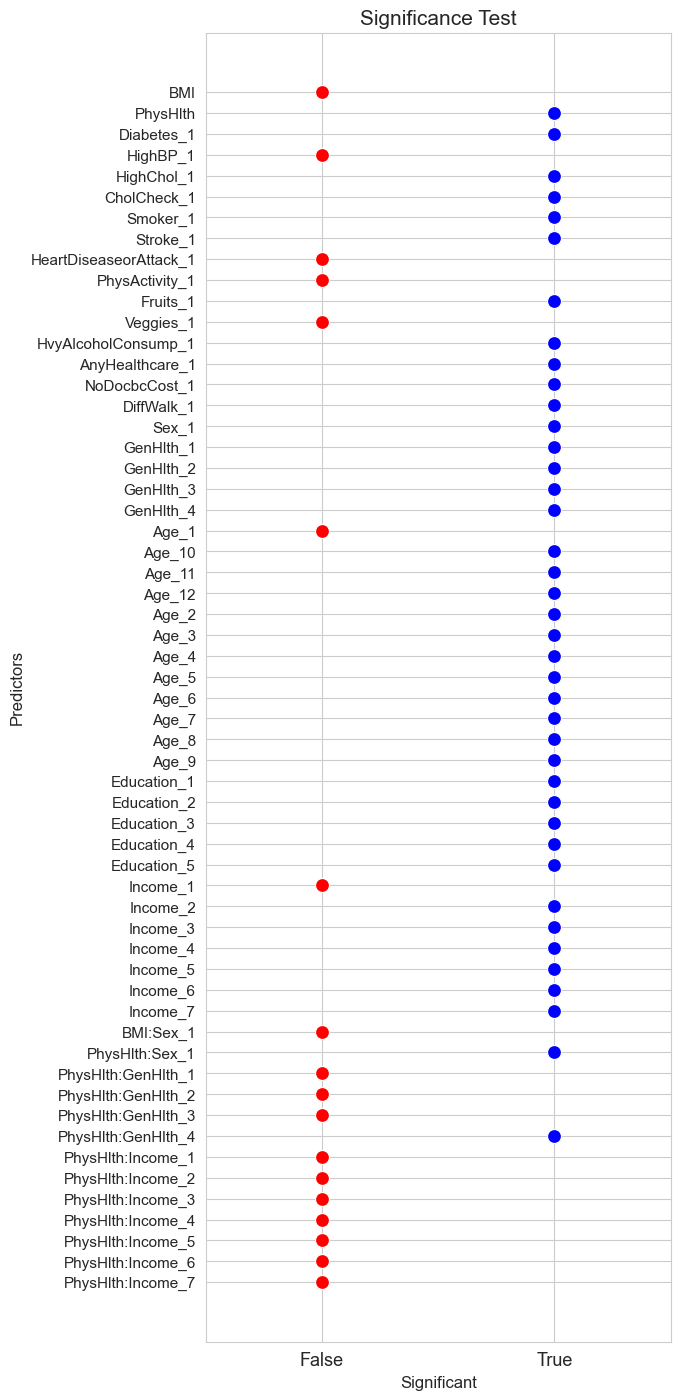

In [56]:
# Full model - interactions - dummies
significant_pred_model_inter_dummies_ST, not_significant_pred_model_inter_dummies_ST = significant_test(model=full_model_inter_dummies, alpha=0.05, figsize=(6,17))

Given a categorical predictor, if at least one dummy is significative, we consider the predictor significative. And the same for the interactions.


In [57]:
def recognition(initial_list):
    output_list = []
    for x in initial_list :
        try :
            int(x.split('_')[len(x.split('_'))-1]) 
            list_strings = x.split('_')[:len(x.split('_'))-1]
            output_list.append('_'.join(list_strings))
        except:
            output_list.append(x)
    output_list = list(set(output_list))
    return np.array(output_list)

In [58]:
predictors_selected, interactions_selected, pred_to_dummies = {}, {}, {}

In [59]:
significant_pred_model_inter_dummies_ST = recognition(significant_pred_model_inter_dummies_ST)
not_significant = recognition(not_significant_pred_model_inter_dummies_ST)
not_significant_pred_model_inter_dummies_ST = np.array([x for x in not_significant if x not in significant_pred_model_inter_dummies_ST]) 

predictors_selected['ST_inter_dummies'] = [x for x in significant_pred_model_inter_dummies_ST if ':' not in x]
interactions_selected['ST_inter_dummies'] = [(x.split(':')[0], x.split(':')[1]) for x in significant_pred_model_inter_dummies_ST  if ':' in x]
pred_to_dummies['ST_inter_dummies'] = [x for x in cat_predictors if x in predictors_selected['ST_inter_dummies']]

In [60]:
predictors_selected['ST_inter_dummies']

['Smoker',
 'Education',
 'CholCheck',
 'Fruits',
 'HvyAlcoholConsump',
 'HighChol',
 'PhysHlth',
 'AnyHealthcare',
 'Sex',
 'Stroke',
 'GenHlth',
 'DiffWalk',
 'NoDocbcCost',
 'Diabetes',
 'Age',
 'Income']

In [61]:
interactions_selected['ST_inter_dummies']

[('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth')]

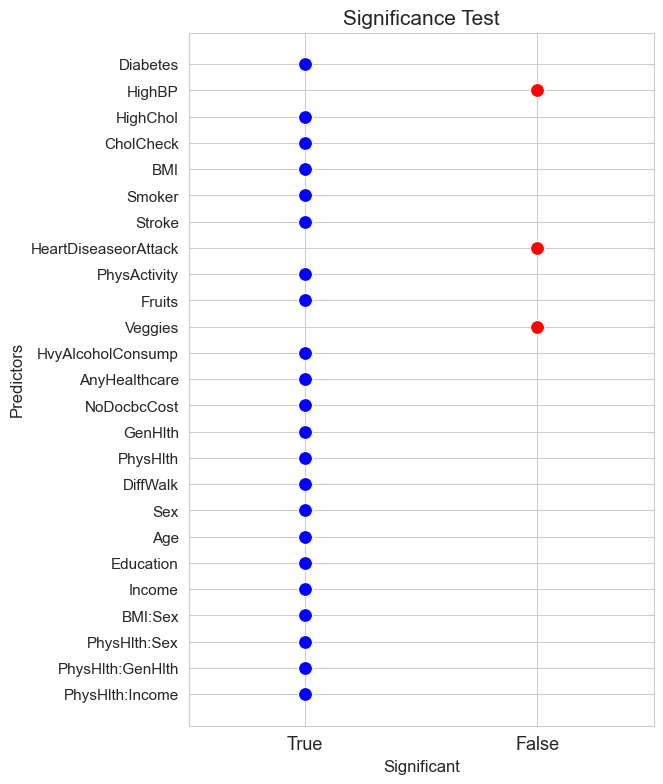

In [62]:
# Full model - interactions 
significant_pred_model_inter_ST, not_significant_pred_model_inter_ST = significant_test(model=full_model_inter, alpha=0.05, figsize=(6,9))

In [63]:
predictors_selected['ST_inter'] = [x for x in significant_pred_model_inter_dummies_ST if ':' not in x]
interactions_selected['ST_inter'] = [(x.split(':')[0], x.split(':')[1]) for x in significant_pred_model_inter_dummies_ST  if ':' in x]
pred_to_dummies['ST_inter'] = None

In [64]:
predictors_selected['ST_inter'] 

['Smoker',
 'Education',
 'CholCheck',
 'Fruits',
 'HvyAlcoholConsump',
 'HighChol',
 'PhysHlth',
 'AnyHealthcare',
 'Sex',
 'Stroke',
 'GenHlth',
 'DiffWalk',
 'NoDocbcCost',
 'Diabetes',
 'Age',
 'Income']

In [65]:
interactions_selected['ST_inter']

[('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth')]

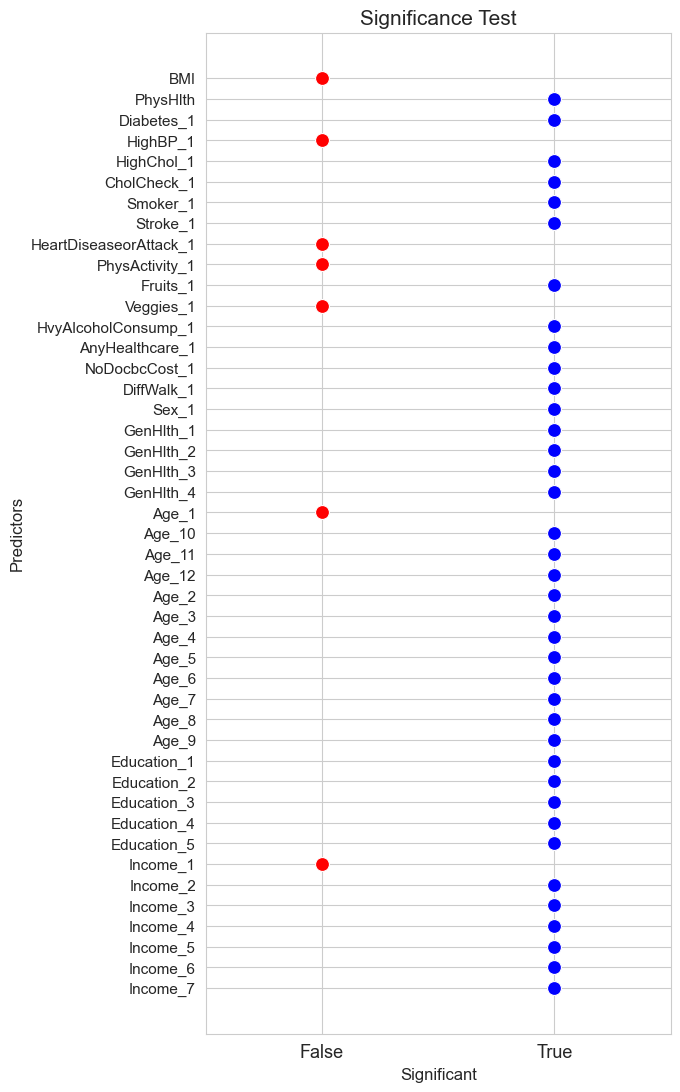

In [66]:
# Full model - dummies
significant_pred_model_dummies_ST, not_significant_pred_model_dummies_ST = significant_test(model=full_model_dummies, alpha=0.05, figsize=(6,13))

In [67]:
significant_pred_model_dummies_ST = recognition(significant_pred_model_dummies_ST)
not_significant = recognition(not_significant_pred_model_dummies_ST)
not_significant_pred_model_dummies_ST = np.array([x for x in not_significant if x not in significant_pred_model_dummies_ST]) 

predictors_selected['ST_dummies'] = significant_pred_model_dummies_ST
interactions_selected['ST_dummies'] = None
pred_to_dummies['ST_dummies'] = [x for x in cat_predictors if x in predictors_selected['ST_inter_dummies']]

In [68]:
predictors_selected['ST_dummies']

array(['Smoker', 'Education', 'CholCheck', 'Fruits', 'HvyAlcoholConsump',
       'HighChol', 'PhysHlth', 'AnyHealthcare', 'Sex', 'Stroke',
       'GenHlth', 'DiffWalk', 'NoDocbcCost', 'Diabetes', 'Age', 'Income'],
      dtype='<U17')

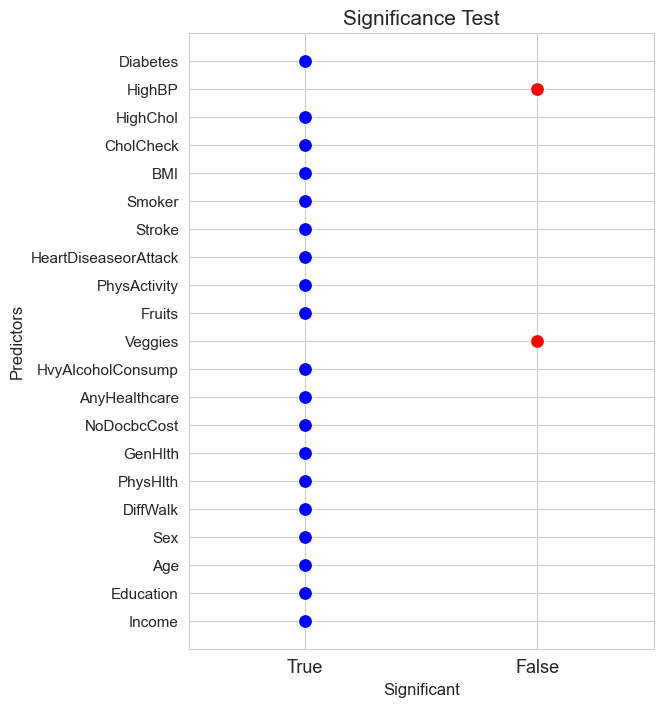

In [69]:
# Full model - not interactions - not dummies
significant_pred_model_basic_ST, not_significant_pred_model_basic_ST = significant_test(model=full_model, alpha=0.05, figsize=(6,8))

In [70]:
predictors_selected['ST_basic'] = significant_pred_model_basic_ST
interactions_selected['ST_basic'] = None
pred_to_dummies['ST_basic'] = None

In [71]:
predictors_selected['ST_basic']

array(['Diabetes', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype=object)

#### **Goodness of fit**


##### **Deviance**

Given an statistical regression model $M$, such as Poisson regression model, its deviance is defined as:

$$D(M) = -2 \cdot log \left( \mathcal{L}(\widehat{\beta}_0, \widehat{\beta}) \right)$$

Where $\mathcal{L}(\widehat{\beta}_0, \widehat{\beta})$ is the estimated Likelihood function of the model.


The deviance is a measure of how well the model is fitting the training data, so, is a measure of **goodness of fit** of the model.

**Properties:**

- $D(M)\in [0, \infty)$

- The larger $D(M)$, the worse $M$ fits the training data.

- The smaller $D(M)$, the better $M$ fits the training data.

- The null model $M_0$ (the one that doesn't include predictors) has the maximum deviance.

- The classic determination coefficient $R$-square can be obtain through the deviance as $\hspace{0.05cm}R^2(M) = 1 - \dfrac{D(M)}{D(M_0)}$




#### **Likelihood Ratio Test as significance test**

Originally the Likelihood ratio test is a test to compare the goodness of fit of different nested models, but in this section we are going to adapt it to be a significance test for the predictors.

Given two nested models $M_p$, $M_{p-1}$ such that $M_p$ is the full model (includes the $p$ available predictors) and $M_{p-1}$ is the same model but without the predictor $X_j$.

The significant test for predictor $X_j$ can be perform as a Likelihood Ratio Test:


\begin{cases}
H_0 : M_{p-1}  \\
H_1 : M_p
\end{cases}


**Statistic:**

$$LTR = D(M_{p-1}) - D(M_p) \sim \chi_{1}^2$$

**p-value:**

$$pvalue = P(\chi_{1}^2 \geq LRT)$$

**Decision rule:**

- If $pvalue < \alpha \hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ Reject $H_0 \hspace{0.1cm}\Rightarrow\hspace{0.1cm}$  $M_p$ fits better the training data than $M_{p-1}$    $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ predictor $\mathcal{X}_j$  is **significative** to explain the response.

- If $pvalue \geq \alpha \hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ Not Reject $H_0 \hspace{0.1cm}\Rightarrow\hspace{0.1cm}$  $M_{p-1}$ fits better the training data than $M_{p}$  $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ predictor $\mathcal{X}_j$  is **not significative** to explain the response.

Let's implements the Likelihood Test Ratio as significance test in `Python`:

In [72]:
def LRT(full_model, predictor_to_test) :

    X_full = full_model.X
    Y = full_model.Y
    interactions = full_model.interactions_to_add
    pred_to_dummies = full_model.pred_to_dummies
    predictors = X_full.columns.tolist().copy()

    if predictor_to_test in predictors:
        predictors_reduced = [x for x in predictors if x != predictor_to_test]
        interactions_reduced = [(quant, cat) for (quant, cat) in interactions if cat != predictor_to_test and quant != predictor_to_test]  if interactions is not None else None
        pred_to_dummies_reduced = [x for x in pred_to_dummies if x != predictor_to_test] if pred_to_dummies is not None else None

    elif predictor_to_test in interactions:
        predictors_reduced = predictors
        interactions_reduced = [(quant, cat) for (quant, cat) in interactions if (quant, cat) != predictor_to_test]
        pred_to_dummies_reduced = pred_to_dummies

    reduced_model = poisson_model(Y=Y, X=X_full[predictors_reduced])
    reduced_model.fit(pred_to_dummies=pred_to_dummies_reduced, interactions_to_add=interactions_reduced)

    loglike_full = full_model.poisson_fit.llf
    loglike_reduced = reduced_model.poisson_fit.llf
    deviance_full = -2*loglike_full
    deviance_reduced = -2*loglike_reduced
    LRT_ = deviance_reduced - deviance_full
    df_full = full_model.poisson_fit.df_model # number of coefficients of full model
    df_reduced = reduced_model.poisson_fit.df_model # number of coefficients of reduced model 
    pvalue = stats.chi2.sf(LRT_, df_full-df_reduced)

    return pvalue

In [73]:
def LTR_significant_test(full_model, alpha=0.05, figsize=(7,7)) :

    if full_model.interactions_to_add is not None :
        predictors_to_test =  full_model.X.columns.tolist() + full_model.interactions_to_add 
    else:
        predictors_to_test =  full_model.X.columns.tolist()
    
    pvalue = dict()

    for predictor in predictors_to_test :
        pvalue[predictor] = LRT(full_model, predictor_to_test=predictor)
    
    predictors_tested = np.array([str(x) for x in pvalue.keys()])
    pvalues = np.array([x for x in pvalue.values()])
    significance_results = pvalues < alpha
    significant_predictors = predictors_tested[significance_results==True]
    not_significant_predictors = predictors_tested[significance_results==False]
    significance_test_results_str = np.array([str(x) for x in significance_results])

    plt.figure(figsize=figsize)
    ax = sns.scatterplot(x=significance_test_results_str, y=predictors_tested, color='red', s=100)
    ax = sns.scatterplot(x=significance_test_results_str[significance_results==True], 
                         y=predictors_tested[significance_results==True], color='blue', s=100)

    plt.title('Significance Test - LRT', size=15)
    ax.set_ylabel('Predictors', size=12)
    ax.set_xlabel('Significant', size=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    ax.set_xlim(-0.5, 1.5) 
    plt.show()

    return significant_predictors, not_significant_predictors

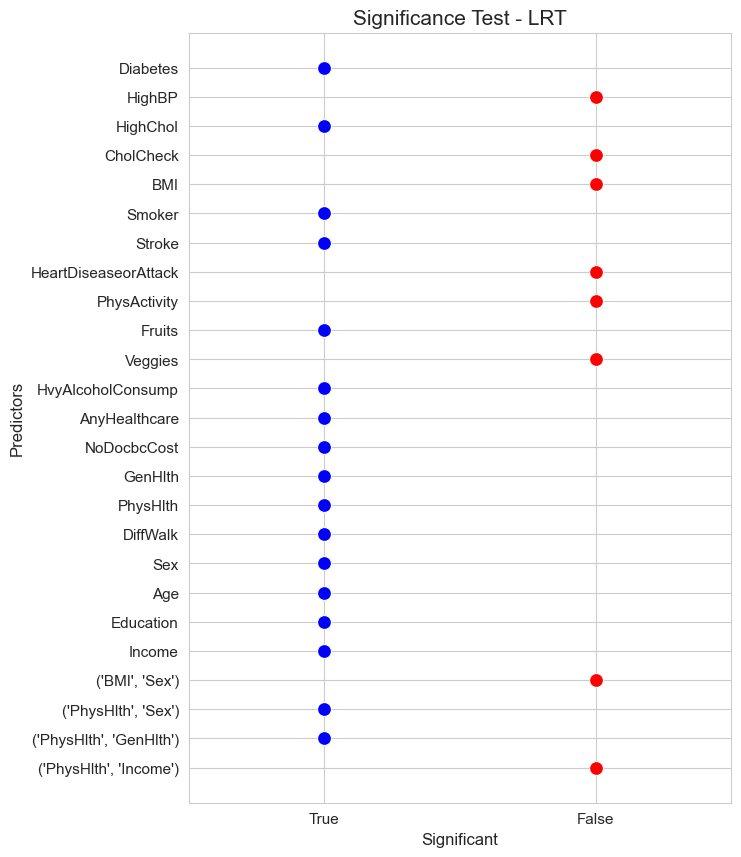

In [74]:
# Full model - interactions - dummies
full_model_inter_dummies = poisson_model(Y=Y_train, X=X_train)
interactions = [('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')]
full_model_inter_dummies.fit(pred_to_dummies=cat_predictors, interactions_to_add=interactions)

significant_pred_model_inter_dummies_LRT, not_significant_pred_model_inter_dummies_LRT = LTR_significant_test(full_model=full_model_inter_dummies, 
                                                                                                              alpha=0.05, figsize=(7,10))

In [75]:
significant_pred_model_inter_dummies_LRT 

array(['Diabetes', 'HighChol', 'Smoker', 'Stroke', 'Fruits',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       "('PhysHlth', 'Sex')", "('PhysHlth', 'GenHlth')"], dtype='<U23')

In [76]:
not_significant_pred_model_inter_dummies_LRT

array(['HighBP', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'PhysActivity', 'Veggies', "('BMI', 'Sex')",
       "('PhysHlth', 'Income')"], dtype='<U23')

In [77]:
predictors_selected['LRT_inter_dummies'] = [x for x in significant_pred_model_inter_dummies_LRT if not x[0] == '(']
interactions_selected['LRT_inter_dummies'] = [ast.literal_eval(x) for x in significant_pred_model_inter_dummies_LRT if x[0] == '(']
pred_to_dummies['LRT_inter_dummies'] = [x for x in cat_predictors if x in predictors_selected['LRT_inter_dummies']]

In [78]:
predictors_selected['LRT_inter_dummies'] 

['Diabetes',
 'HighChol',
 'Smoker',
 'Stroke',
 'Fruits',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [79]:
interactions_selected['LRT_inter_dummies']

[('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth')]

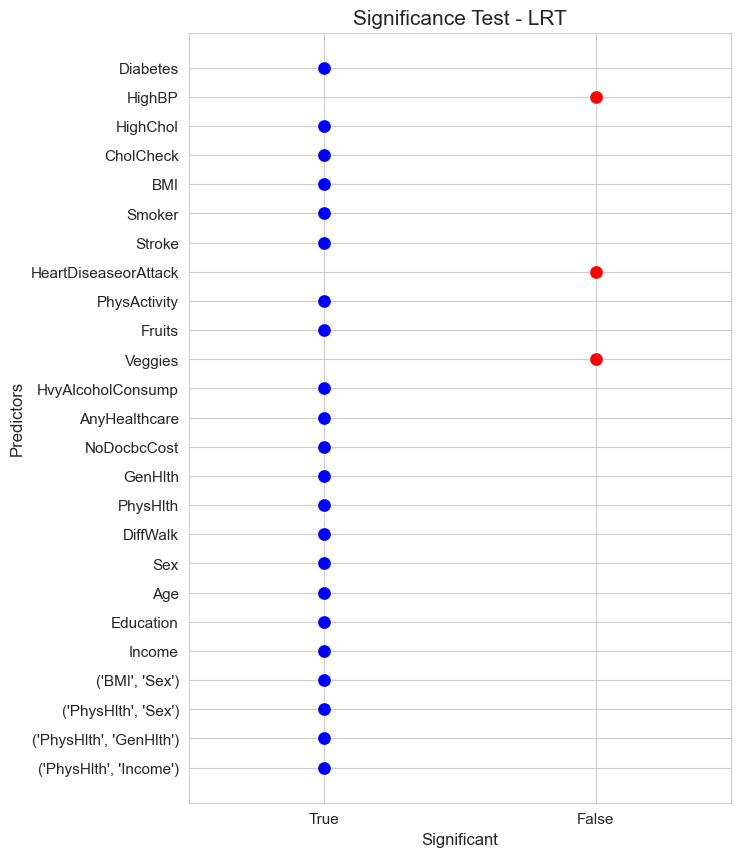

In [80]:
# Full model - interactions 
significant_pred_model_inter_LRT, not_significant_pred_model_inter_LRT = LTR_significant_test(full_model=full_model_inter, alpha=0.05, figsize=(7,10))

In [81]:
predictors_selected['LRT_inter'] = [x for x in significant_pred_model_inter_LRT if not x[0] == '(']
interactions_selected['LRT_inter'] = [ast.literal_eval(x) for x in significant_pred_model_inter_LRT if x[0] == '(']
pred_to_dummies['LRT_inter'] = None

In [82]:
predictors_selected['LRT_inter']

['Diabetes',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'PhysActivity',
 'Fruits',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [83]:
interactions_selected['LRT_inter']

[('BMI', 'Sex'),
 ('PhysHlth', 'Sex'),
 ('PhysHlth', 'GenHlth'),
 ('PhysHlth', 'Income')]

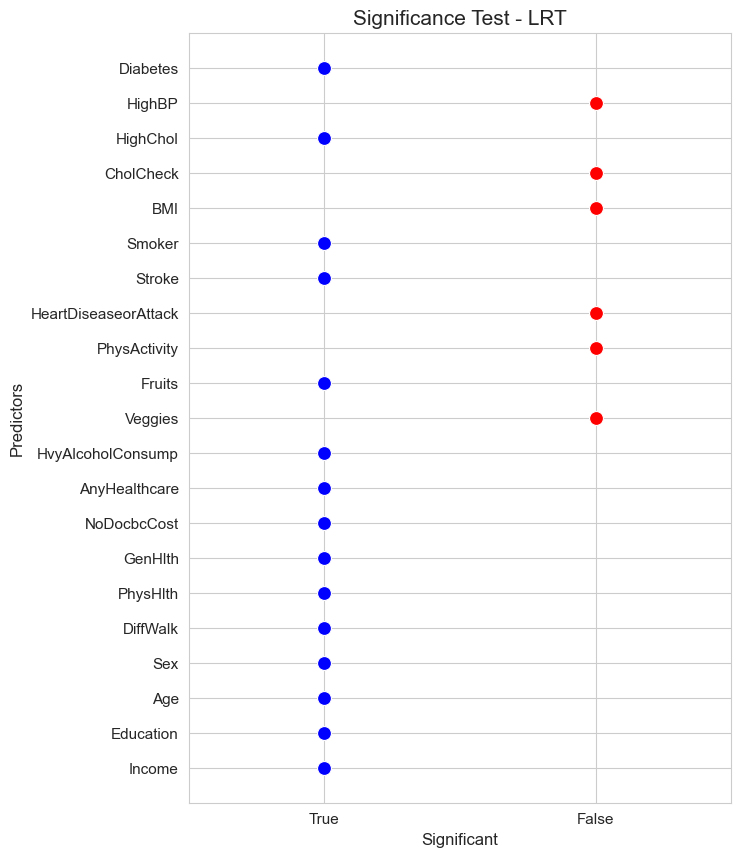

In [84]:
# Full model - dummies
significant_pred_model_dummies_LRT, not_significant_pred_model_dummies_LRT = LTR_significant_test(full_model=full_model_dummies, 
                                                                                                  alpha=0.05, figsize=(7,10))

In [85]:
predictors_selected['LRT_dummies'] = significant_pred_model_dummies_LRT
interactions_selected['LRT_dummies'] = None
pred_to_dummies['LRT_dummies'] = None

In [86]:
predictors_selected['LRT_dummies']

array(['Diabetes', 'HighChol', 'Smoker', 'Stroke', 'Fruits',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='<U20')

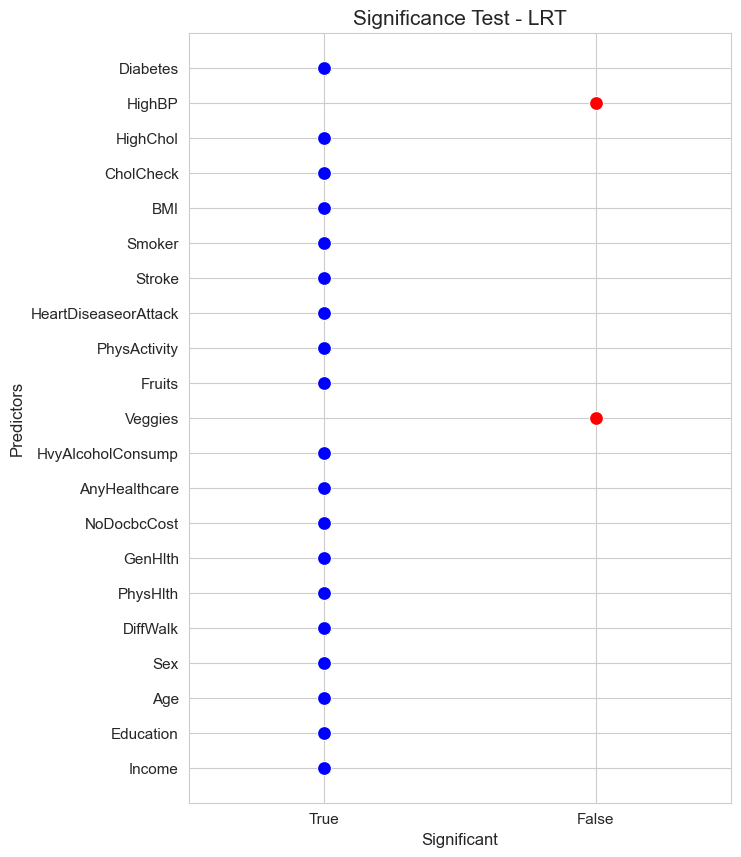

In [87]:
# Full model - not interactions - not dummies
significant_pred_model_basic_LRT, not_significant_pred_model_basic_LRT = LTR_significant_test(full_model=full_model, 
                                                                                              alpha=0.05, figsize=(7,10))

In [88]:
predictors_selected['LRT_basic'] = significant_pred_model_basic_LRT
interactions_selected['LRT_basic'] = None
pred_to_dummies['LRT_basic'] = None

In [89]:
predictors_selected['LRT_basic']

array(['Diabetes', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='<U20')

#### **Predictors selection based on predictive performance**


The idea is to consider the predictors as hyper-parameters of the model and optimize them using algorithms like grid search and cross validation.

##### **Train-Train - Train-Validate split**

Since we need to test the predictive performance of the models we need to split train partition in train-train (train2) to train the models and train-validate (val) to test them.

We don't use test partition in this case since this task implies taking decisions regarding the predictive modeling process and these decisions should be done with the training data, otherwise this can lead to **data leakage**.

The test partition will only be  used to estimate the future performance of our final model.

##### **Best subset selection algorithm**

We have $p$ predictors.

  
- We consider all the possible poisson models with  $1$ predictor, and select the one with **less (test) prediction error** computed by **simple validation** $\Rightarrow M_1^*$

- We consider all the possible poisson models with  $2$ predictor, and select the one with **less (test) prediction error** computed by **simple validation** $\Rightarrow M_2^*$  
   $\dots$ 

- We train all the possible poisson models with  $p-1$ predictor, and select the one with **less (test) prediction error** computed by **simple validation** $\Rightarrow M_{p-1}^*$

- We train the full poisson model $\Rightarrow M_{p}$

Among the models $M_1^*, M_2^*,\dots, M_{p-1}^*, M_p$ we select the one with **less (test) prediction error**, and it is consider the **best Poisson model** according to best subset selection algorithm.


This method is not feasible in this case. Because as we saw before, the number of possible linear regression models that can be trained with all the possible subsets of the $p=21$ predictors is $2097151$, which is not acceptable computationally with the `statsmodels` implementation of the Poisson regression model. 


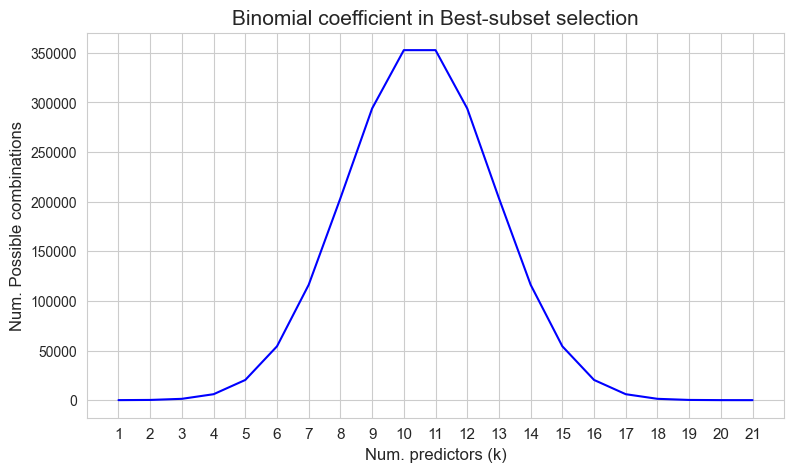

In [90]:
p=len(predictors)
binom_values = [binom(p=len(predictors), k=k) for k in np.arange(1,p+1)]

plt.figure(figsize=(9, 5))
ax = sns.lineplot(y=binom_values, x=np.arange(1,p+1), color='blue')
ax.set_ylabel('Num. Possible combinations', size=12)
ax.set_xlabel('Num. predictors (k)', size=12)
plt.xticks(np.arange(1,p+1), fontsize=11)
plt.title('Binomial coefficient in Best-subset selection', size=15)
plt.show()

We have $350000$ possible combinations of size $k=10$ of $p=21$ predictors, this means that just in this case we would have to train $350000$ models !

Assuming that `statmodels` takes 1.5 secs to train each model (which is an optimistic assumption), this task would be performed in 6 days !! 

And this is only one of the task that this algorithm should perform, because it has to carry out this process for $k=1,2,\dots,p$.

By the way, the total number of model to train will be exactly the sum of `binom_values`, as we said before there are 2097151 possible combinations !

In [91]:
np.sum(binom_values)

2097151.0

The time expected to train this models would be 36 days...

##### **Backward selection algorithm**

From the largest model to the smallest.

We have $p$ predictors.

- We consider the full poisson regression model $\Rightarrow M_{p}$
  
- We consider all the  poisson models resulting from removing one predictor from the model $M_p$, and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{p-1}^*$


- We consider all the  poisson models resulting from removing one predictor from the model $M_{p-1}$, and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{p-2}^*$
  
   $\dots$ 

- We consider all the  poisson models resulting from removing one predictor from the model $M_2$, and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{1}^*$

Among the models $M_1^*, M_2^*,\dots, M_{p-1}^*, M_p$ we select the one with **less (test) prediction error**, and it is consider the **best Poisson model** according to backward selection algorithm. 


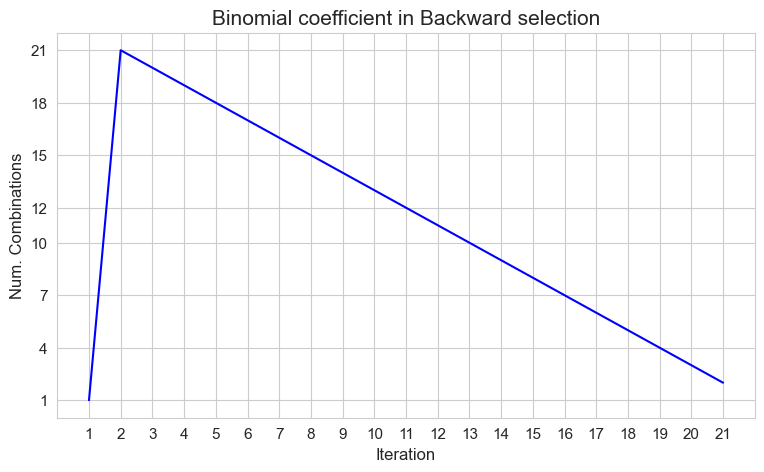

In [92]:
p=len(predictors)
binom_values = [binom(p=i, k=j) for i,j in zip(list(range(2,p+1)) + [p], range(1,p+1))]
binom_values.reverse()

plt.figure(figsize=(9, 5))
ax = sns.lineplot(y=binom_values, x=np.arange(1,p+1), color='blue')
ax.set_ylabel('Num. Combinations', size=12)
ax.set_xlabel('Iteration', size=12)
min = np.min(binom_values)
max = np.max(binom_values)
plt.yticks(np.round(np.linspace(min,max, 8)), fontsize=11)
plt.xticks(np.arange(1,p+1), fontsize=11)
plt.title('Binomial coefficient in Backward selection', size=15)
plt.show()

In [93]:
np.sum(binom_values)

231.0

In [94]:
231*1.5/60 # 6 mins approx

5.775

In [95]:
def backward_selection(X, Y, pred_to_dummies=None, interactions=None, train_size=0.75, seed=123) :

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
     
    results = dict()
    RMSE = dict()
    predictors = X_train.columns.tolist()
    predictors_combinations = [predictors]
    n_iter = X_train.shape[1]

    for iter in range(0, n_iter) :

        for predictors_combi in predictors_combinations :

            if isinstance(predictors_combi, list) :
                predictors_combi = tuple(predictors_combi)

            model = poisson_model(Y=Y_train, X=X_train[list(predictors_combi)])
            pred_to_dummies_reduced = [x for x in pred_to_dummies if x in list(predictors_combi)] if pred_to_dummies is not None else None
            interactions_reduced = [(quant, cat) for (quant, cat) in interactions if cat in list(predictors_combi) and quant in list(predictors_combi)] if interactions is not None else None
            model.fit(pred_to_dummies=pred_to_dummies_reduced, interactions_to_add=interactions_reduced)
            Y_test_hat = model.predict(X_test[list(predictors_combi)])
            RMSE[predictors_combi] = np.sqrt(np.mean((Y_test - Y_test_hat)**2))
     
        RMSE_predictors = np.array([x for x in RMSE.keys()])
        RMSE_values = np.array([x for x in RMSE.values()])
        best_predictors = tuple(RMSE_predictors[np.argsort(RMSE_values)[0]]) 
        best_interactions = tuple([(quant,cat) for (quant,cat) in interactions if quant in list(best_predictors) and cat in list(best_predictors)]) if interactions is not None else None
        if best_interactions is not None:
            results[best_predictors + best_interactions] = np.min(RMSE_values) 
        else:
            results[best_predictors] = np.min(RMSE_values) 
        # Next list of combinations
        predictors_combinations = list(combinations(best_predictors, len(best_predictors)-1))
        # Clean the dictionary
        RMSE = dict()

    return results

In [96]:
# Models with: dummies - interactions
results = backward_selection(X=X_train, Y=Y_train, train_size=0.75, seed=123, pred_to_dummies=cat_predictors, 
                             interactions=[('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')]) 

In [97]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_backward_inter_dummies_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_backward_inter_dummies = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_backward_inter_dummies = np.min(result_score)

predictors_selected['backward_inter_dummies'] = [x for x in best_pred_backward_inter_dummies if not isinstance(x,tuple)]
interactions_selected['backward_inter_dummies'] = [ast.literal_eval(x) for x in best_pred_backward_inter_dummies if isinstance(x,tuple)]
pred_to_dummies['backward_inter_dummies'] = [x for x in cat_predictors if x in predictors_selected['backward_inter_dummies']]

In [98]:
predictors_selected['backward_inter_dummies']

['Education']

In [99]:
interactions_selected['backward_inter_dummies']

[]

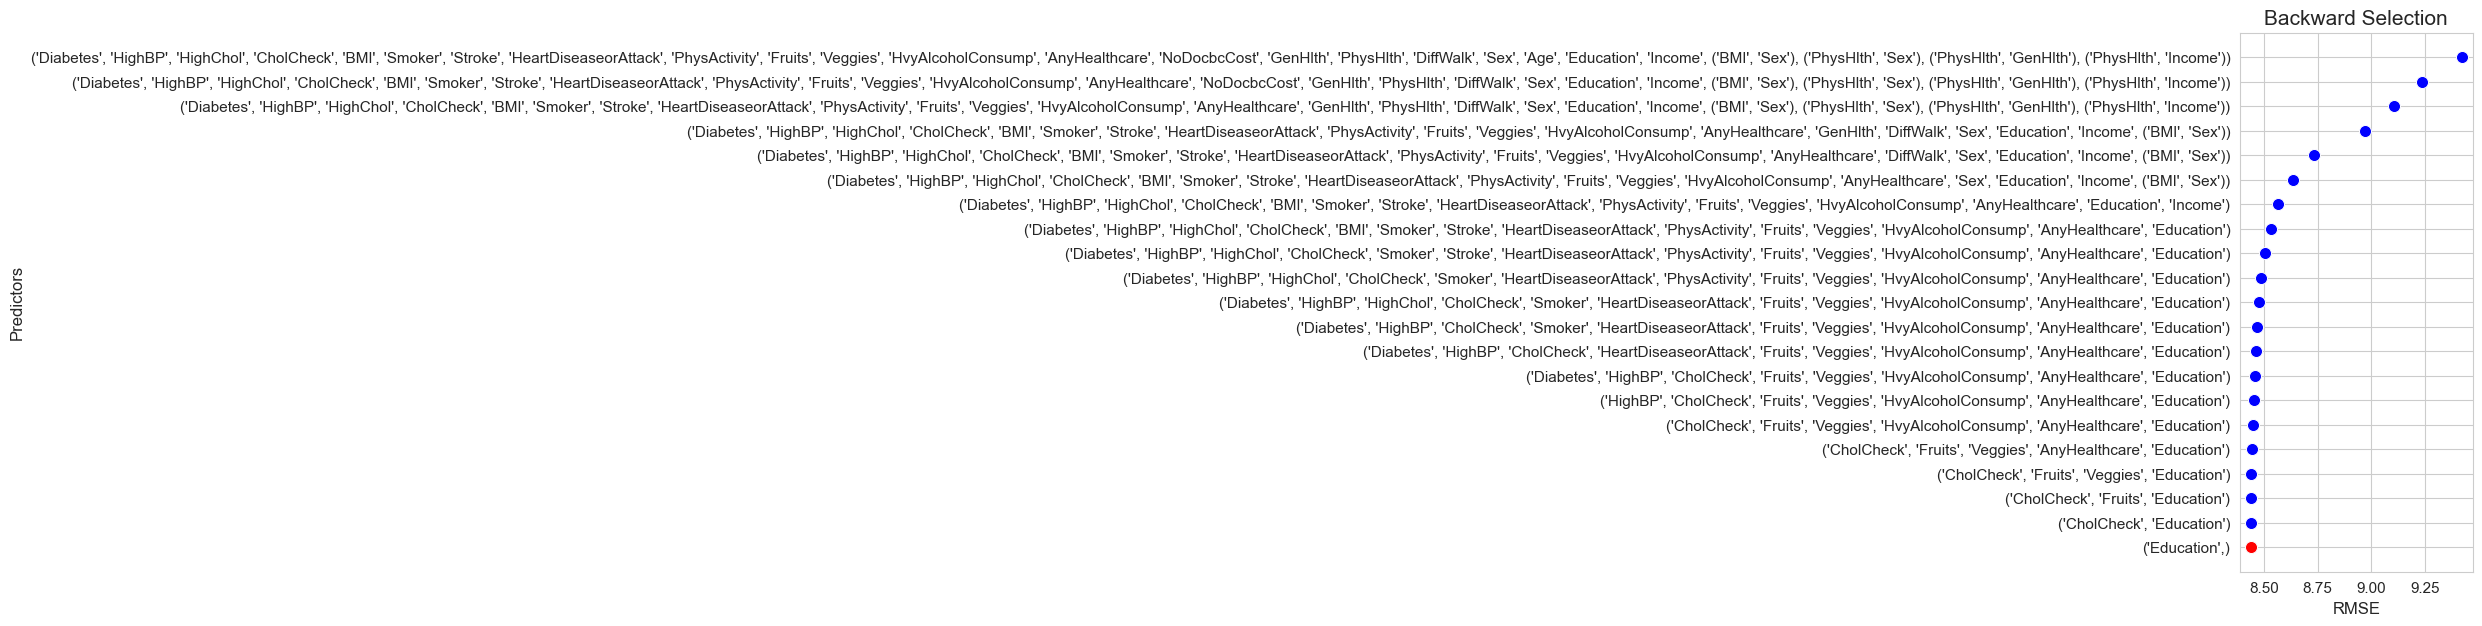

In [100]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_backward_inter_dummies, y=[best_pred_backward_inter_dummies_str], color='red', s=75)
plt.title('Backward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [101]:
# dummies
results = backward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=cat_predictors, interactions=None) 

In [102]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_backward_dummies_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_backward_dummies = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_backward_dummies = np.min(result_score)

predictors_selected['backward_dummies'] = best_pred_backward_dummies
interactions_selected['backward_dummies'] = None
pred_to_dummies['backward_dummies'] = [x for x in cat_predictors if x in predictors_selected['backward_dummies']]

In [103]:
predictors_selected['backward_dummies'] 

['Education']

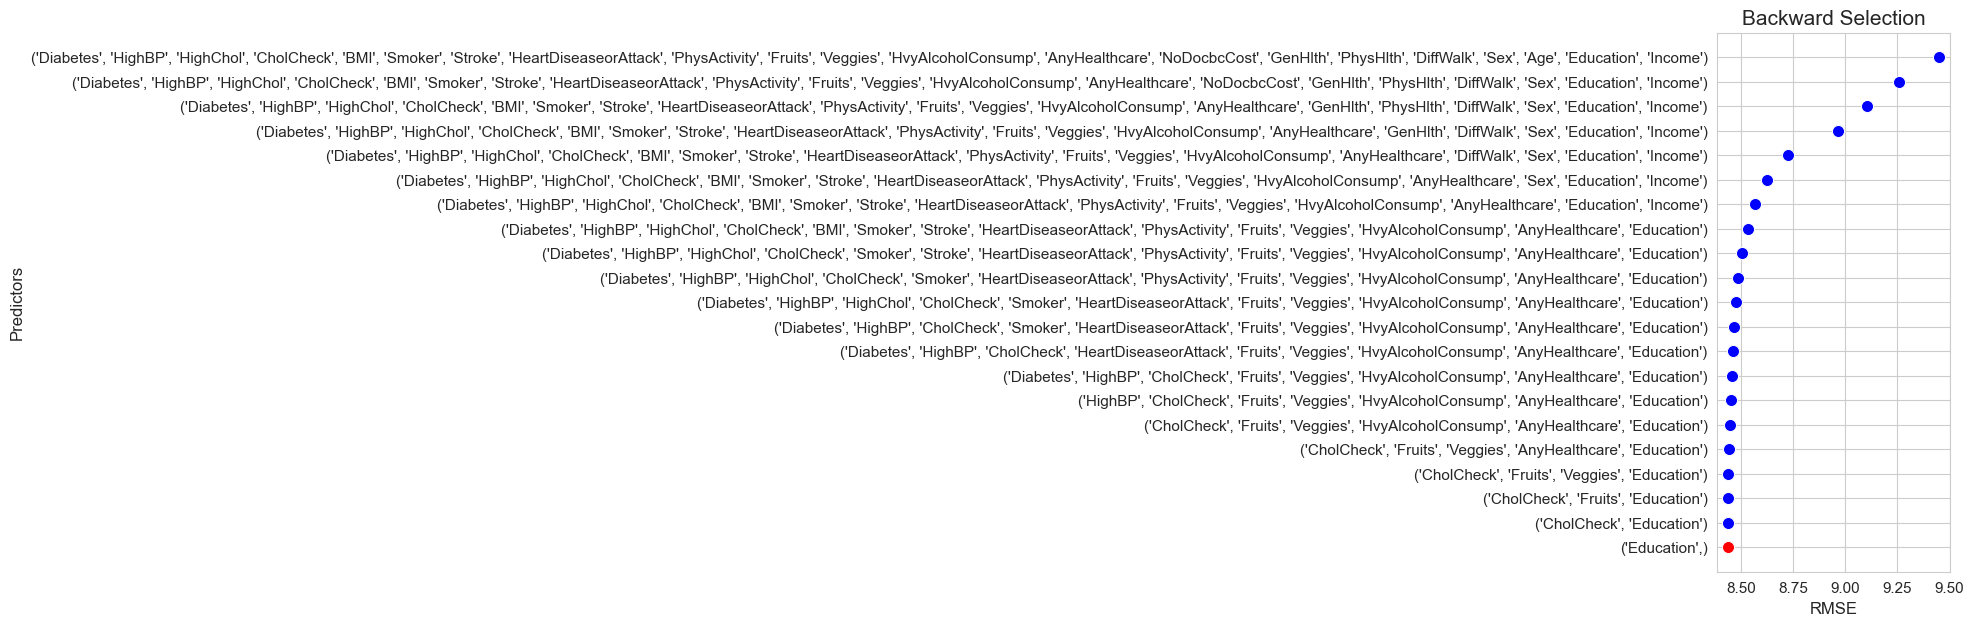

In [104]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_backward_dummies, y=[best_pred_backward_dummies_str], color='red', s=75)
plt.title('Backward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [105]:
# interactions
results = backward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=None, interactions=[('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')]) 

In [106]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_backward_inter_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_backward_inter = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_backward_inter = np.min(result_score)

predictors_selected['backward_inter'] = [x for x in best_pred_backward_inter if not isinstance(x, tuple)]
interactions_selected['backward_inter'] = [x for x in best_pred_backward_inter if isinstance(x, tuple)]
pred_to_dummies['backward_inter'] = None

In [107]:
predictors_selected['backward_inter']

['HighBP',
 'HighChol',
 'CholCheck',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'NoDocbcCost',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age']

In [108]:
interactions_selected['backward_inter']

[('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth')]

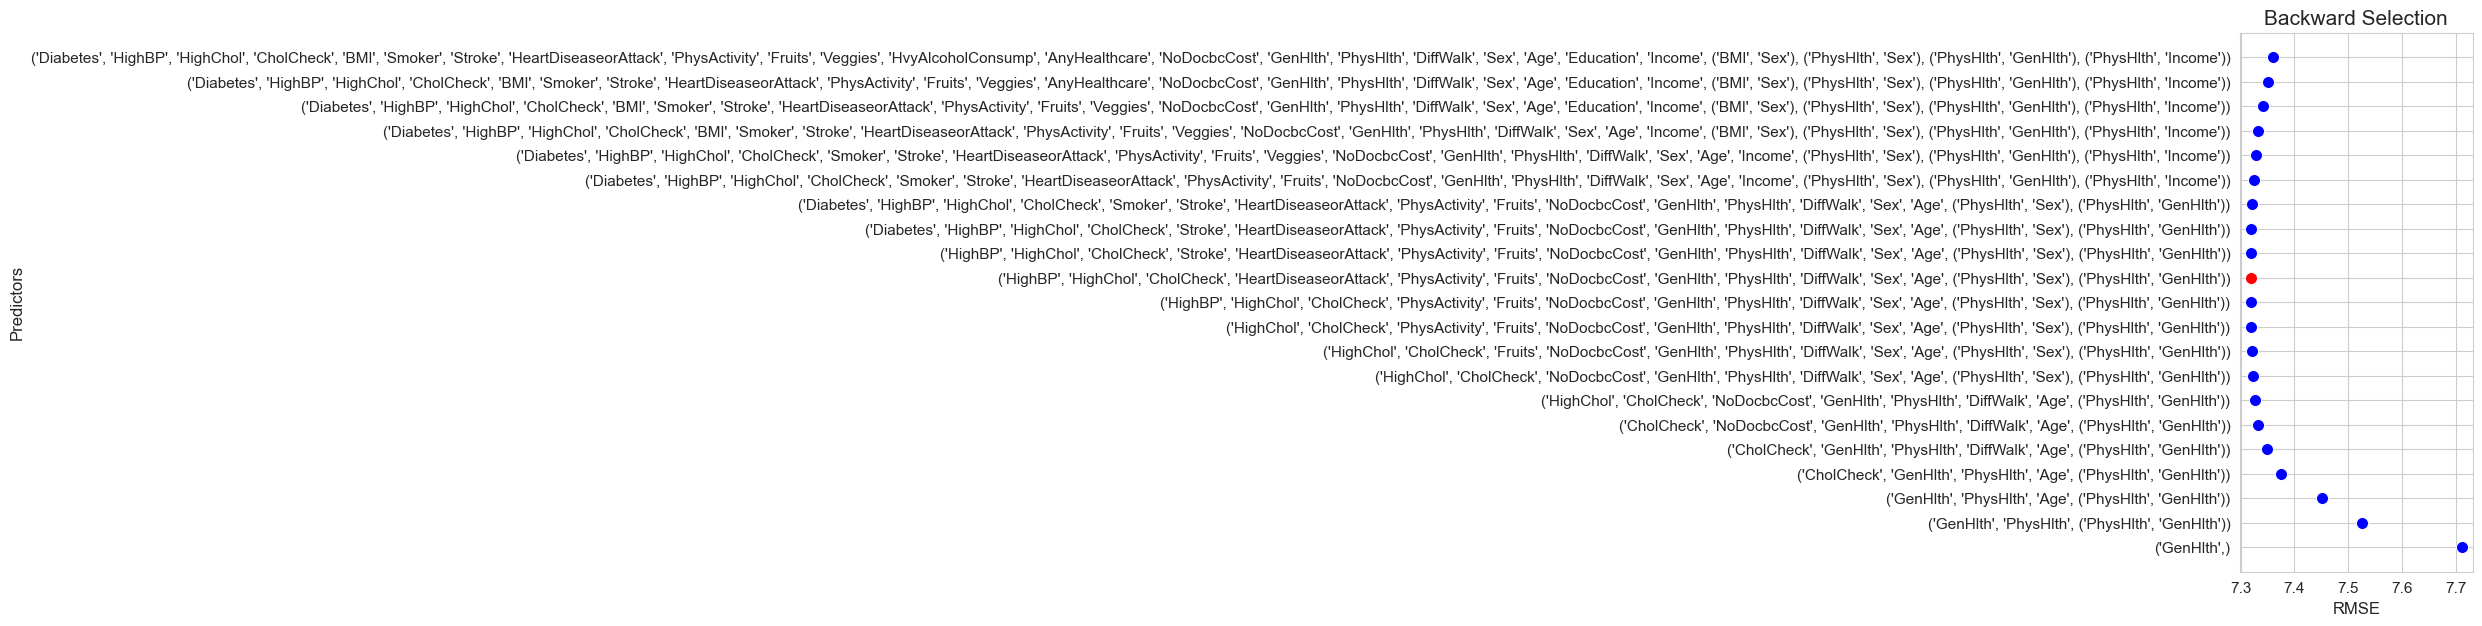

In [109]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_backward_inter, y=[best_pred_backward_inter_str], color='red', s=75)
plt.title('Backward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [110]:
# basic (not inter - not dummies)
results = backward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=None, interactions=None) 

In [111]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_backward_basic_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_backward_basic = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_backward_basic = np.min(result_score)

predictors_selected['backward_basic'] = best_pred_backward_basic 
interactions_selected['backward_basic'] = None
pred_to_dummies['backward_basic'] = None

In [112]:
predictors_selected['backward_basic']

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'NoDocbcCost',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Income']

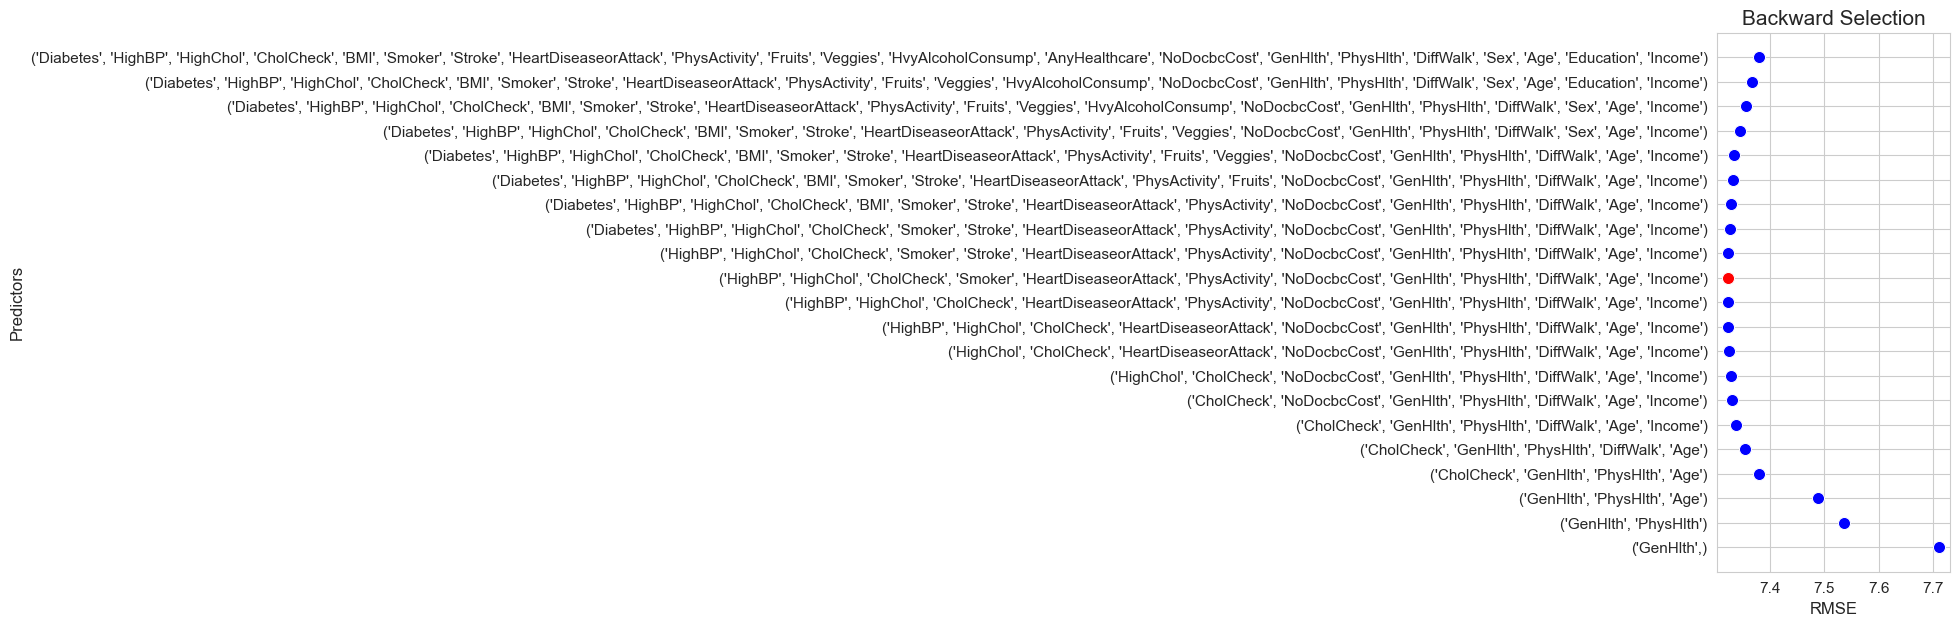

In [113]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_backward_basic, y=[best_pred_backward_basic_str], color='red', s=75)
plt.title('Backward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

##### **Forward selection algorithm**

From the smallest model to the largest.

We have $p$ predictors.

- We consider all the poisson regression models with $1$ predictor,  and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{1}^*$
  
- We consider all the  linear models resulting from adding one predictor to the model $M_1$, and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{2}^*$


- We consider all the  linear models resulting from adding one predictor to the model $M_2$, and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{3}^*$
  
   $\dots$ 

- We consider all the  linear models resulting from adding one predictor to the model $M_p-2$, and we select the one with **less (test) prediction error** by **simple validation** $\Rightarrow M_{p-1}^*$

- We consider the full linear model $\Rightarrow M_{p}$

Among the models $M_1^*, M_2^*,\dots, M_{p-1}^*, M_p$ we select the one with **less (test) prediction error**, and it is consider the **best Poisson model** according to forward selection algorithm. 


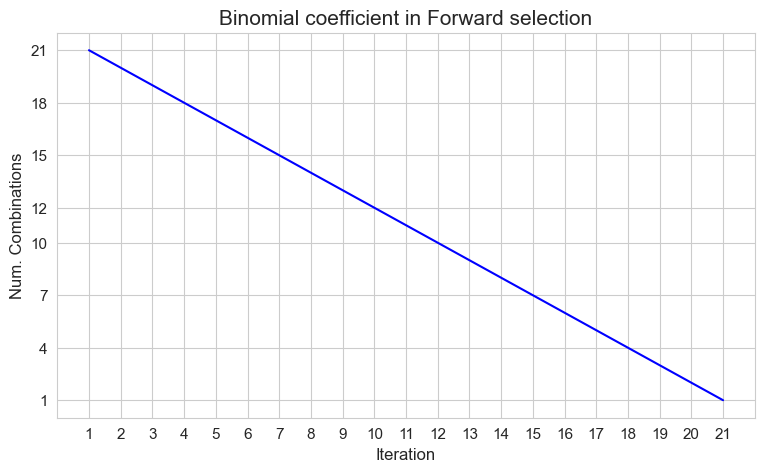

In [114]:
p=len(predictors)
binom_values = [binom(p=i, k=j) for i,j in zip(np.arange(1, p+1), np.repeat(1, p+1))]
binom_values.reverse()

plt.figure(figsize=(9, 5))
ax = sns.lineplot(y=binom_values, x=np.arange(1,p+1), color='blue')
ax.set_ylabel('Num. Combinations', size=12)
ax.set_xlabel('Iteration', size=12)
min = np.min(binom_values)
max = np.max(binom_values)
plt.yticks(np.round(np.linspace(min,max, 8)), fontsize=11)
plt.xticks(np.arange(1,p+1), fontsize=11)
plt.title('Binomial coefficient in Forward selection', size=15)
plt.show()

In [115]:
def forward_selection(X, Y,  pred_to_dummies=None, interactions=None, train_size=0.75, seed=123) :

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
    
    results = dict()
    RMSE = dict()
    predictors = X_train.columns.tolist()
    predictors_combinations = predictors
    n_iter = X_train.shape[1]

    for iter in range(0, n_iter) :

        for predictors_combi in predictors_combinations:

            if isinstance(predictors_combi, str) :
               predictors_combi = (predictors_combi, )

            model = poisson_model(Y=Y_train, X=X_train[list(predictors_combi)])
            pred_to_dummies_reduced = [x for x in pred_to_dummies if x in list(predictors_combi)] if pred_to_dummies is not None else None
            interactions_reduced = [(quant, cat) for (quant, cat) in interactions if cat in list(predictors_combi) and quant in list(predictors_combi)] if interactions is not None else None
            model.fit(pred_to_dummies=pred_to_dummies_reduced, interactions_to_add=interactions_reduced)
            Y_test_hat = model.predict(X_test[list(predictors_combi)])
            RMSE[predictors_combi] = np.sqrt(np.mean((Y_test - Y_test_hat)**2))

        RMSE_predictors = np.array([x for x in RMSE.keys()])
        RMSE_values = np.array([x for x in RMSE.values()])
        best_predictors = tuple(RMSE_predictors[np.argsort(RMSE_values)[0]])
        best_interactions = tuple([(quant,cat) for (quant,cat) in interactions if quant in list(best_predictors) and cat in list(best_predictors)]) if interactions is not None else None
        if best_interactions is not None:
            results[best_predictors + best_interactions] = np.min(RMSE_values) 
        else:
            results[best_predictors] = np.min(RMSE_values) 
        # Next list of combinations
        predictors_combinations = [best_predictors + (x, ) for x in predictors if x not in best_predictors]
        # Clean the dictionary
        RMSE = dict()

    return results

In [116]:
# interactions - dummies - interactions
results = forward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=cat_predictors, 
                            interactions=[('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')])

In [117]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_forward_inter_dummies_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_forward_inter_dummies = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_forward_inter_dummies = np.min(result_score)

predictors_selected['forward_inter_dummies'] = [x for x in best_pred_forward_inter_dummies if not isinstance(x,tuple)]
interactions_selected['forward_inter_dummies'] = [ast.literal_eval(x) for x in best_pred_forward_inter_dummies if isinstance(x,tuple)]
pred_to_dummies['forward_inter_dummies'] = [x for x in cat_predictors if x in predictors_selected['forward_inter_dummies']]

In [118]:
predictors_selected['forward_inter_dummies'] 

['Education']

In [119]:
interactions_selected['forward_inter_dummies']

[]

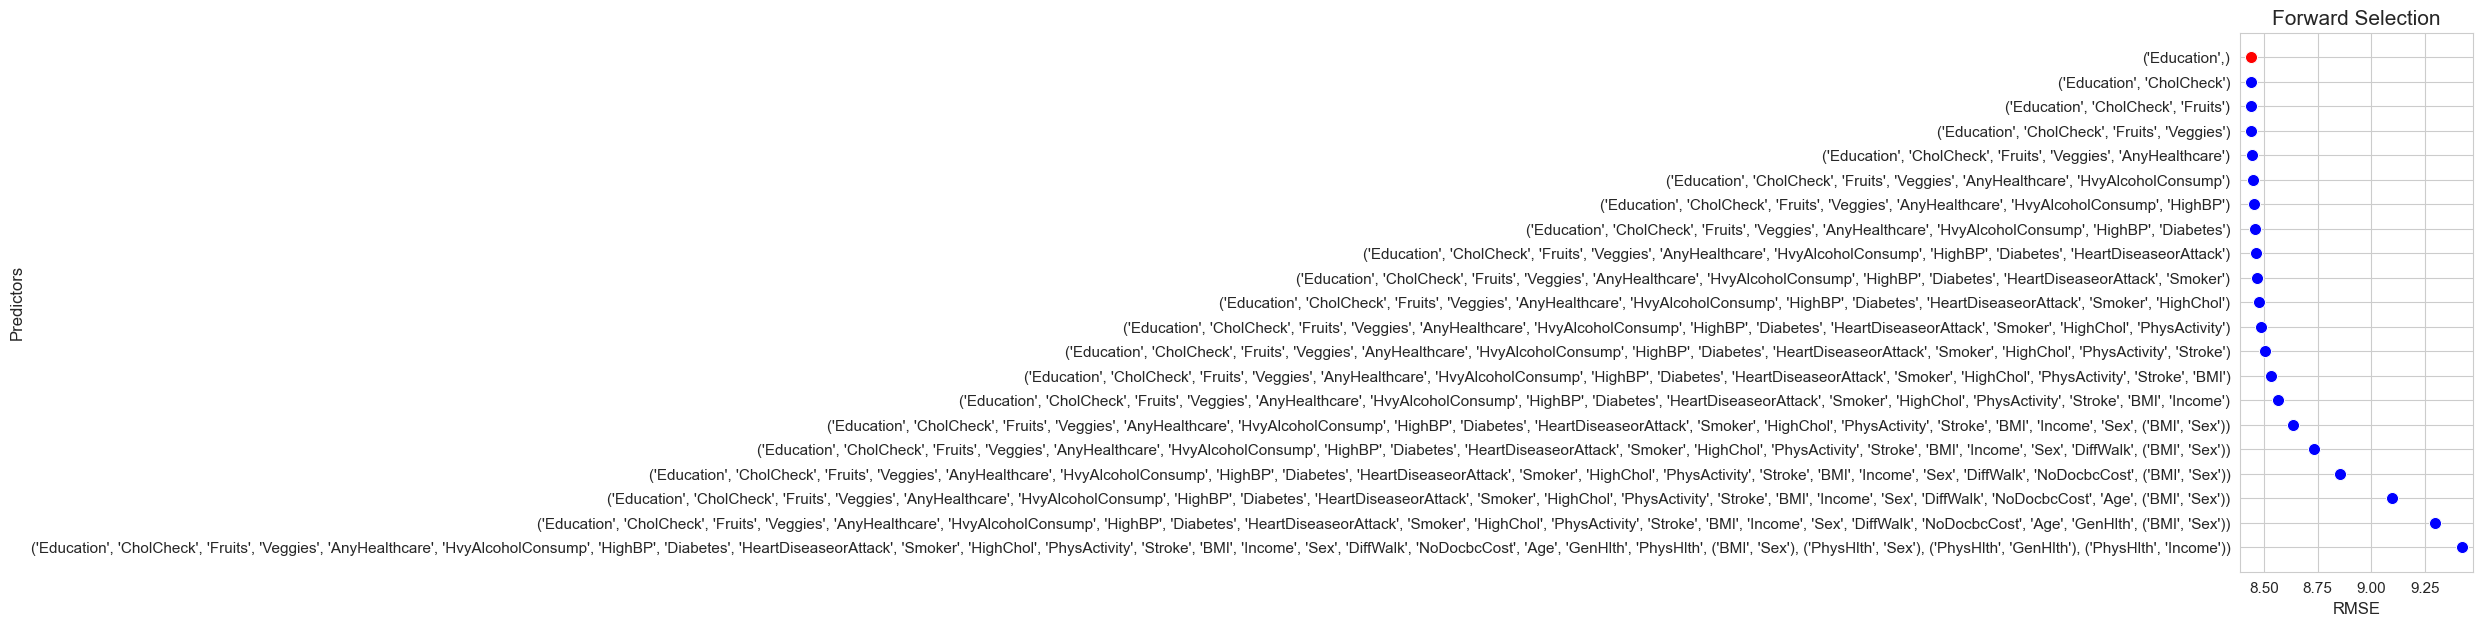

In [120]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_forward_inter_dummies, y=[best_pred_forward_inter_dummies_str], color='red', s=75)
plt.title('Forward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [121]:
# dummies 
results = forward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=cat_predictors, interactions=None)

In [122]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_forward_dummies_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_forward_dummies = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_forward_dummies = np.min(result_score)

predictors_selected['forward_dummies'] = best_pred_forward_dummies
interactions_selected['forward_dummies'] = None
pred_to_dummies['forward_dummies'] = [x for x in cat_predictors if x in predictors_selected['forward_dummies']]

In [123]:
predictors_selected['forward_dummies']

['Education']

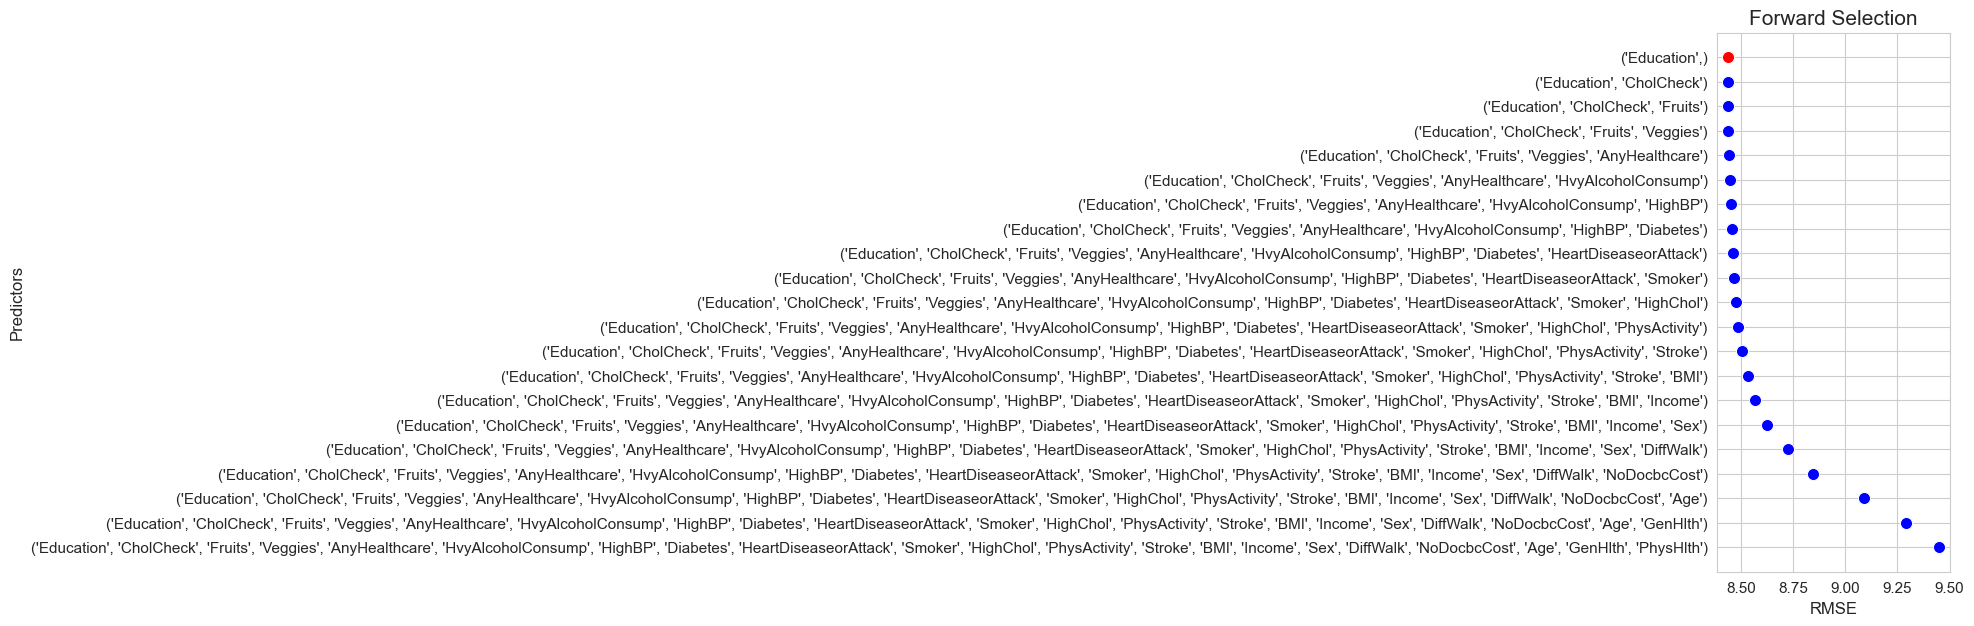

In [124]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_forward_dummies, y=[best_pred_forward_dummies_str], color='red', s=75)
plt.title('Forward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [125]:
# interactions - interaction 
results = forward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=None, interactions=[('BMI', 'Sex'), ('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth'), ('PhysHlth', 'Income')])

In [126]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_forward_inter_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_forward_inter = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_forward_inter = np.min(result_score)

predictors_selected['forward_inter'] = [x for x in best_pred_forward_inter if not isinstance(x, tuple)]
interactions_selected['forward_inter'] = [x for x in best_pred_forward_inter if isinstance(x, tuple)]
pred_to_dummies['forward_inter'] = None

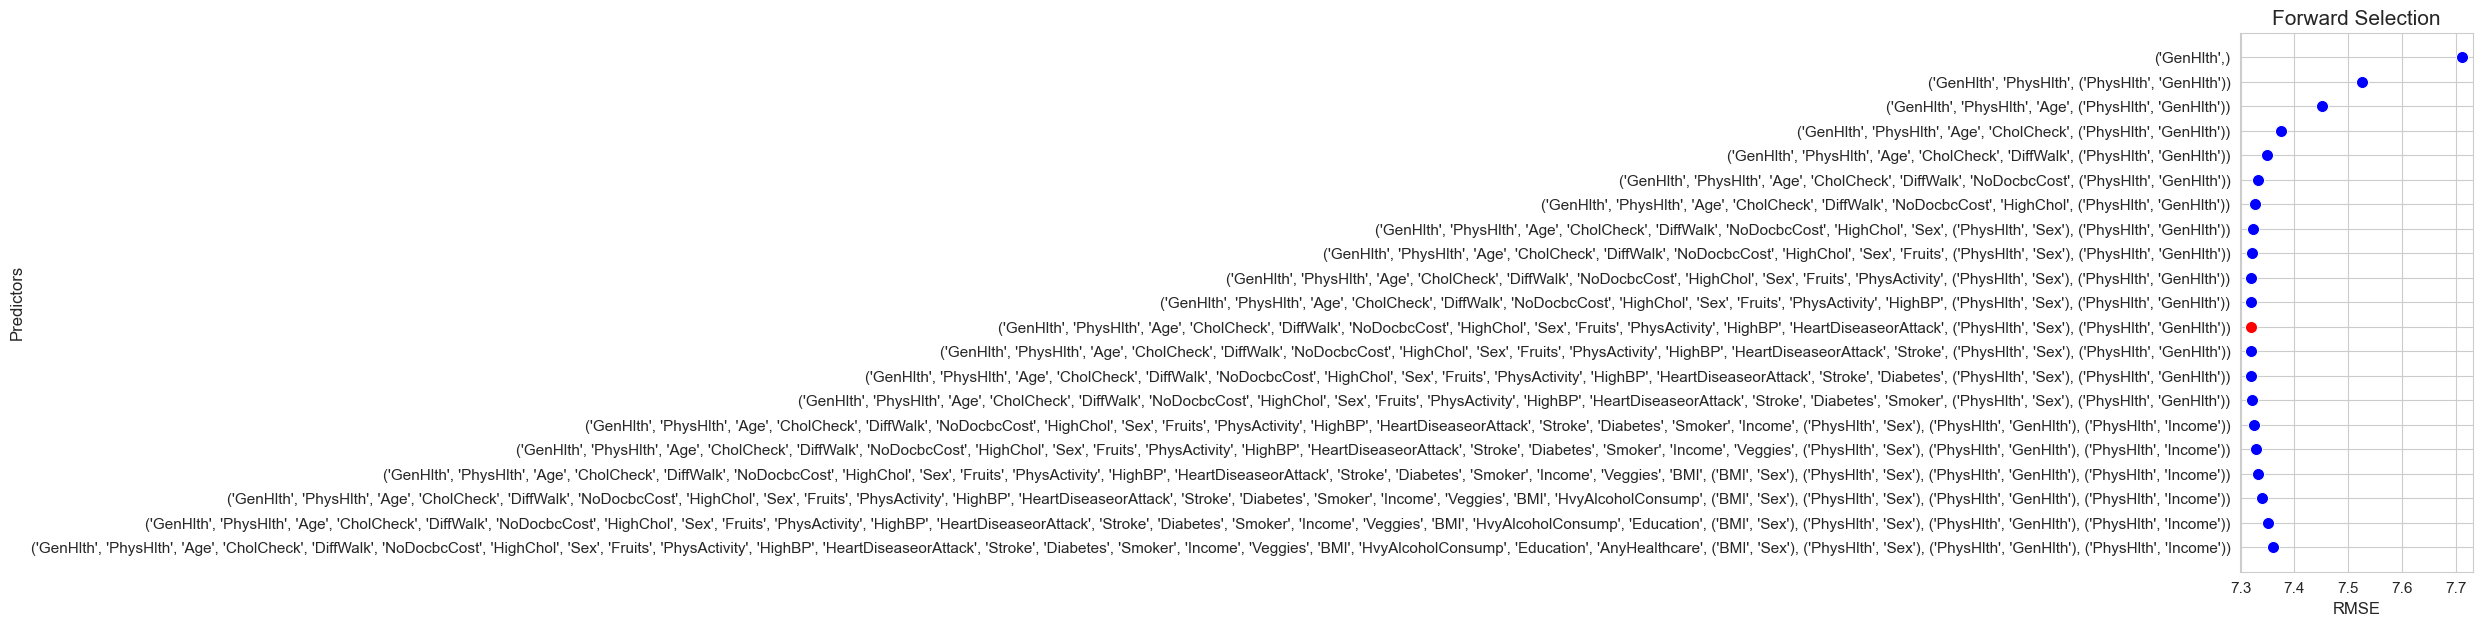

In [127]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_forward_inter, y=[best_pred_forward_inter_str], color='red', s=75)
plt.title('Forward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [128]:
# interactions - basic 
results = forward_selection(X_train, Y_train, train_size=0.75, seed=123, pred_to_dummies=None, interactions=None)

In [129]:
result_predictors = [x for x in results.keys()]
result_predictors_str = np.array([str(x) for x in results.keys()])
result_score = np.array([x for x in results.values()])
best_pred_forward_basic_str = result_predictors_str[np.argsort(result_score)[0]]
best_pred_forward_basic = list(result_predictors[np.argsort(result_score)[0]])
best_RMSE_forward_basic = np.min(result_score)

predictors_selected['forward_basic'] = best_pred_forward_basic 
interactions_selected['forward_basic'] = None
pred_to_dummies['forward_basic'] = None

In [130]:
predictors_selected['forward_basic']

['GenHlth',
 'PhysHlth',
 'NoDocbcCost',
 'Age',
 'CholCheck',
 'DiffWalk',
 'Income',
 'HighChol',
 'HeartDiseaseorAttack',
 'HighBP',
 'PhysActivity',
 'Smoker']

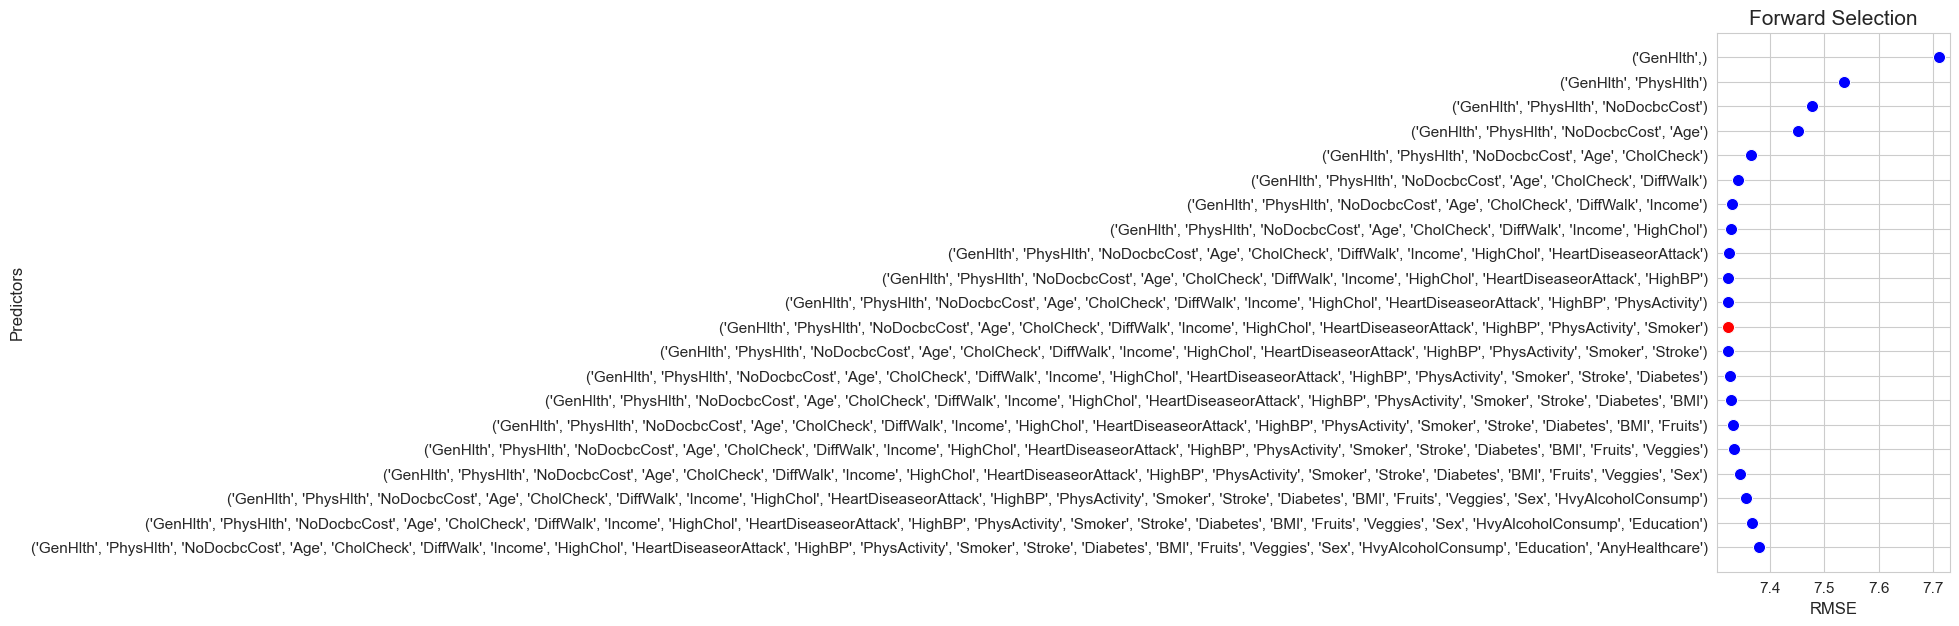

In [131]:
plt.figure(figsize=(3, 7))
ax = sns.scatterplot(x=result_score, y=result_predictors_str, color='blue', s=75)
ax = sns.scatterplot(x=best_RMSE_forward_basic, y=[best_pred_forward_basic_str], color='red', s=75)
plt.title('Forward Selection', size=15)
ax.set_ylabel('Predictors', size=12)
ax.set_xlabel('RMSE', size=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### **Model selection**

Since we we want to compare different models based on their predictive performance we need to use train-train (train2) to train them and train-validate (val) to test them, so that we will be able to compare their "real" predictive performance and choose the best one.

We don't use test partition in model selection because it is part of training, since implies taking decisions regarding the predictive modeling process and this can lead to **data leakage**.

The test partition will only be  used  to estimate the future performance of our final model.

In [132]:
def repeated_simple_validation(X, Y, train_size, n_repetitions, seed, pred_to_dummies, interactions_to_add):

    np.random.seed(seed)
    seed_arr = np.random.randint(1, 9999999, n_repetitions)
    RMSE_list = []

    for iter in range(0, n_repetitions) :
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed_arr[iter])
        model = poisson_model(Y=Y_train, X=X_train)
        model.fit(pred_to_dummies=pred_to_dummies, interactions_to_add=interactions_to_add)
        try: # If X_test contains categorical variable without some categories that are present in X_train, an error will occur.
            Y_test_hat = model.predict(X_test)
            RMSE_list.append(np.sqrt(np.mean((Y_test - Y_test_hat)**2)))
        except: 
            continue

    RMSE = np.mean(RMSE_list)
    return RMSE

In [133]:
def kfold_cv(X, Y, n_folds, shuffle, seed, pred_to_dummies, interactions_to_add, ):

    
    kfold = KFold(n_splits=n_folds, shuffle=shuffle, random_state=seed)
    folds = list(kfold.split(X=X, y=Y))
    RMSE_list = []

    for iter in range(0, n_folds) :

        X_train = X.iloc[folds[iter][0], :] ; X_test = X.iloc[folds[iter][1], :]
        Y_train = Y.iloc[folds[iter][0]] ; Y_test = Y.iloc[folds[iter][1]]
        model = poisson_model(Y=Y_train, X=X_train)
        model.fit(pred_to_dummies=pred_to_dummies, interactions_to_add=interactions_to_add)
        try: # If X_test contains categorical variable without some categories that are present in X_train, an error will occur.
            Y_test_hat = model.predict(X_test)
            RMSE_list.append(np.sqrt(np.mean((Y_test - Y_test_hat)**2)))
        except: 
            continue

    RMSE = np.mean(RMSE_list)
    return RMSE

In [134]:
RMSE_rep_sv, RMSE_kfold = {}, {}

for x in predictors_selected.keys() :

    RMSE_kfold[x] = kfold_cv(X=X_train[predictors_selected[x]], Y=Y_train, n_folds=5,
                             shuffle=True, seed=123, 
                             pred_to_dummies=pred_to_dummies[x], 
                             interactions_to_add=interactions_selected[x])

In [135]:
RMSE_kfold_arr = np.array([x for x in RMSE_kfold.values()])
Models_arr = np.array(['Linear_' + x for x in RMSE_kfold.keys()])

Best_Model_kfold = Models_arr[np.argsort(RMSE_kfold_arr)[0]]
RMSE_Best_Model_kfold = np.min(RMSE_kfold_arr)

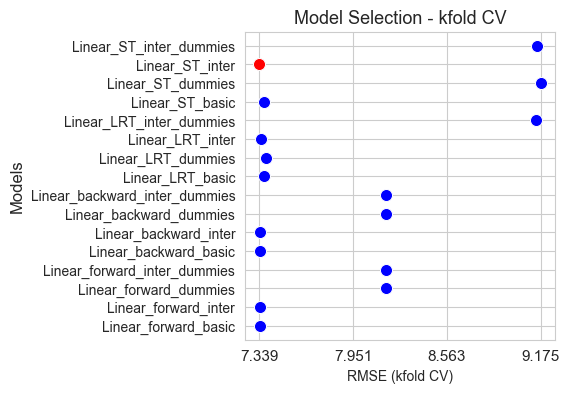

In [136]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(x=RMSE_kfold_arr, y=Models_arr, color='blue', s=75)
ax = sns.scatterplot(x=RMSE_Best_Model_kfold, y=[Best_Model_kfold], color='red', s=75)
plt.title('Model Selection - kfold CV', size=13)
ax.set_ylabel('Models', size=12)
ax.set_xlabel('RMSE (kfold CV)', size=10)
min = np.min(RMSE_kfold_arr)
max = np.max(RMSE_kfold_arr)
plt.xticks(np.round(np.linspace(min,max, 4), 3), fontsize=11)
plt.yticks(fontsize=10)
plt.show()

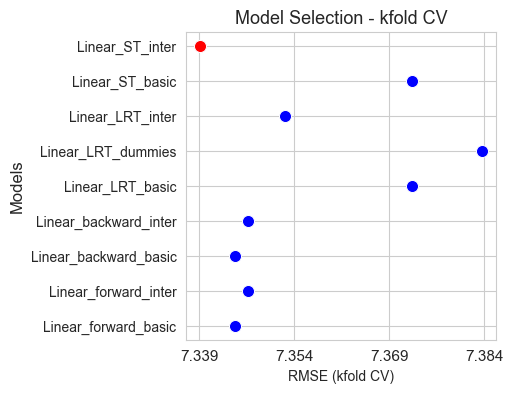

In [137]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(x=RMSE_kfold_arr[RMSE_kfold_arr < 7.5], y=Models_arr[RMSE_kfold_arr < 7.5], color='blue', s=75)
ax = sns.scatterplot(x=RMSE_Best_Model_kfold, y=[Best_Model_kfold], color='red', s=75)
plt.title('Model Selection - kfold CV', size=13)
ax.set_ylabel('Models', size=12)
ax.set_xlabel('RMSE (kfold CV)', size=10)
min = np.min(RMSE_kfold_arr[RMSE_kfold_arr < 7.5])
max = np.max(RMSE_kfold_arr[RMSE_kfold_arr < 7.5])
plt.xticks(np.round(np.linspace(min,max, 4), 3), fontsize=11)
plt.yticks(fontsize=10)
plt.show()

In [138]:
Best_Model_kfold

'Linear_ST_inter'

In [139]:
RMSE_Best_Model_kfold

7.339183127806211

In [140]:
predictors_selected['ST_inter']

['Smoker',
 'Education',
 'CholCheck',
 'Fruits',
 'HvyAlcoholConsump',
 'HighChol',
 'PhysHlth',
 'AnyHealthcare',
 'Sex',
 'Stroke',
 'GenHlth',
 'DiffWalk',
 'NoDocbcCost',
 'Diabetes',
 'Age',
 'Income']

In [141]:
interactions_selected['ST_inter']

[('PhysHlth', 'Sex'), ('PhysHlth', 'GenHlth')]

### **Estimation of future performance**

In this section we are going to estimate the future predictive performance of the best model (the one selected in the precious section). 
To estimate the future performance of the model we will use the training partition to train the model and the testing to make predictions an estimate the error, i.e, its future performance.

In [142]:
# Statsmodels doesn't work with Polars but Pandas.
X_test = X_test.to_pandas()

In [143]:
best_model = poisson_model(Y=Y_train, X=X_train[predictors_selected['ST_inter']])
best_model.fit(pred_to_dummies=None, interactions_to_add=interactions_selected['ST_inter'])
Y_test_hat = best_model.predict(X_test[predictors_selected['ST_inter']])
RMSE_future_performance = np.sqrt(np.mean((Y_test.to_numpy() - Y_test_hat)**2))

In [144]:
RMSE_future_performance

7.300893262886675

###  **Prediction intervals**

#### **Using Monte Linear Regression formula**

We will use the same formula used in Linear Regression to build the prediction intervals.

In [145]:
def prediction_intervals(X, Y, pred_to_dummies, interactions_to_add, alpha=0.05, train_size=0.70, seed=123, subset_len=70, figsize=(12,7)):

    if isinstance(X, pl.DataFrame):
        X = X.to_pandas()
    if isinstance(Y, (pl.DataFrame, pl.Series)):
        Y = Y.to_pandas()

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)

    n = len(X_test)
    p = X_test.shape[1]
    t_alpha_2 = scipy.stats.t.isf(q=alpha/2, df=n-p-1, loc=0, scale=1)

    model = poisson_model(Y=Y_train, X=X_train)
    model.fit(pred_to_dummies=pred_to_dummies, interactions_to_add=interactions_to_add)
    Y_test_hat = model.predict(X_test)

    sigma_2_est = np.sum((Y_test - Y_test_hat)**2) / (n-p-1)
    if isinstance(X, (pd.DataFrame, pl.DataFrame)):
        X_test = X_test.to_numpy()
    v = np.array([X_test[i,:].T @ np.linalg.inv(X_test.T @ X_test) @ X_test[i,:] for i in range(0,n)])

    L1 = Y_test_hat - t_alpha_2 * np.sqrt(sigma_2_est*(1+v)) # lower bound
    L2 = Y_test_hat + t_alpha_2 * np.sqrt(sigma_2_est*(1+v)) # upper bound

    prop_Y_test_out_interval = np.mean((Y_test < L1) | (Y_test > L2)) 

    plt.figure(figsize=figsize)
    subset_len = subset_len + 1
    ax = sns.lineplot(y=Y_test_hat[0:subset_len], x=np.arange(0,len(Y_test_hat[0:subset_len])), 
                      marker='o', linewidth=1.5, color='blue', markersize=6, label='Response Predictions - Test')
    ax2 = sns.lineplot(y=L1[0:subset_len], x=np.arange(0,len(L1[0:subset_len])), 
                       linestyle='--', linewidth=1, color='green', label='Lower bound - Prediction Interval')
    ax3 = sns.lineplot(y=L2[0:subset_len], x=np.arange(0,len(L2[0:subset_len])), 
                       linestyle='--', linewidth=1, color='fuchsia', label='Upper bound - Prediction Interval')
    ax4 = sns.scatterplot(y=Y_test[0:subset_len], x=np.arange(0,len(Y_test[0:subset_len])), color='red', s=30, label='Response Real Values - Test')
    ax.set_ylabel('Y_test_hat', size=12)
    ax.set_xlabel(f'X_test - Index [0:{subset_len-1}]', size=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title(f'Prediction Intervals - Test Set', size=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.95), ncol=1, fontsize=11)
    plt.show()

    print('The percentage of real values of the response (all the red points) that are out of the prediction intervals is', np.round(prop_Y_test_out_interval*100, 2), '%')

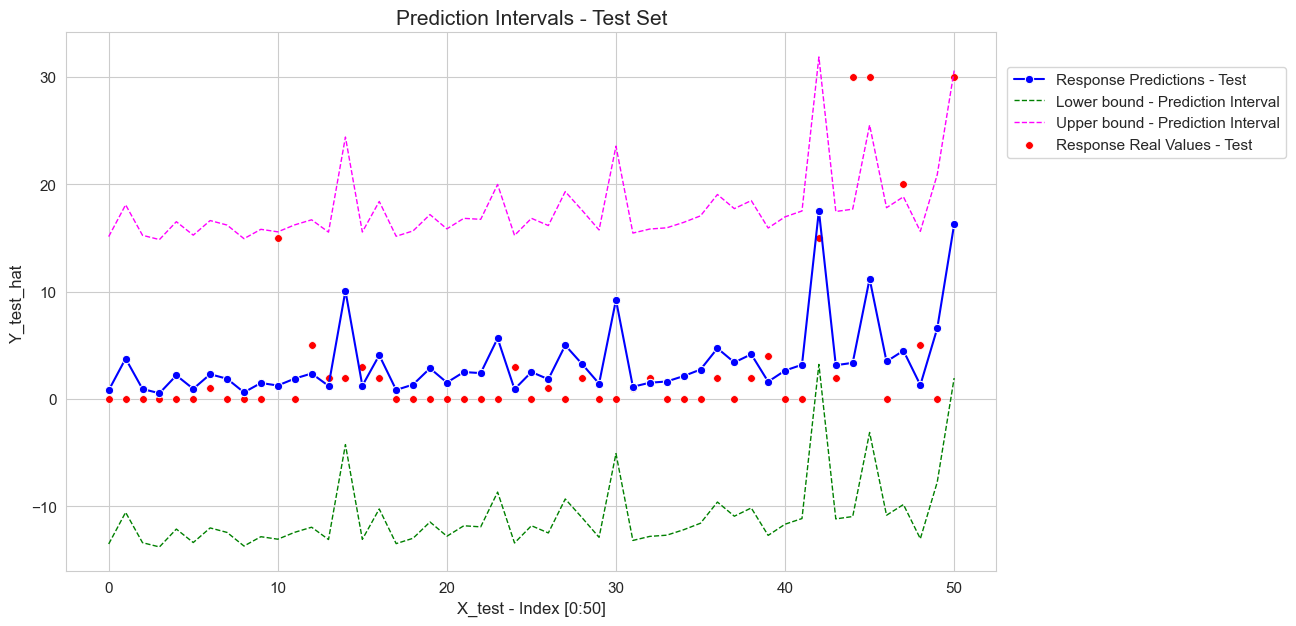

The percentage of real values of the response (all the red points) that are out of the prediction intervals is 7.62 %


In [146]:
prediction_intervals(X[predictors_selected['ST_inter']], Y, 
                     pred_to_dummies=None, 
                     interactions_to_add=interactions_selected['ST_inter'], 
                     alpha=0.05, train_size=0.70, seed=123, subset_len=50, figsize=(12,7))

#### **Using Monte Carlo Simulation**

As we can see, the prediction intervals obtained using the Linear regression formula are too wide. So, we are interesting in other procedures to estimate prediction intervals that lead to narrower intervals. A possibility is to use a method based on Monte Carlo simulation.

Generate $k$ values from $Poisson(\lambda=\widehat{y}_i)$ $\hspace{0.12cm}\Rightarrow\hspace{0.12cm}$ $\widetilde{\widehat{y}_i}= (\widetilde{\widehat{y}}_{i1},\widetilde{\widehat{y}}_{i2}, \dots , \widetilde{\widehat{y}}_{ik})^\prime$

$$PI({y}_i) = \left[Q_{\alpha/2}(\widetilde{\widehat{y}_i})\hspace{0.05cm} , \hspace{0.12cm}   Q_{1-\alpha/2}(\widetilde{\widehat{y}_i})   \right] $$

Where: 

- $Q_{\alpha/2}(\widetilde{\widehat{y}_i})$ is the $\alpha/2$-order quantile of $\widetilde{\widehat{y}_i}$

Let's implement this alternative in `Python`.

In [147]:
def prediction_intervals_monte_carlo(X, Y, pred_to_dummies, interactions_to_add, n_simulations=1000, alpha=0.05, train_size=0.70, seed=123, subset_len=70, figsize=(12,7)):

    if isinstance(X, pl.DataFrame):
        X = X.to_pandas()
    if isinstance(Y, (pl.DataFrame, pl.Series)):
        Y = Y.to_pandas()

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)

    model = poisson_model(Y=Y_train, X=X_train)
    model.fit(pred_to_dummies=pred_to_dummies, interactions_to_add=interactions_to_add)
    Y_test_hat = model.predict(X_test)

    simulation_matrix = np.zeros((len(Y_test_hat), n_simulations))
    for j in range(0, n_simulations):
       # simulation_matrix has in its i-th row the simulations of Y_test_hat[i]
       simulation_matrix[:,j] = np.random.poisson(lam=Y_test_hat)
    
    # Compute quantiles per rows (axis=1) on simulation_matrix, i.e. 
    # compute the appropriate quantiles of the Y_test_hat[i] simulations, for i=1,...,n
    L1 = np.quantile(simulation_matrix, alpha/2, axis=1) # lower bound
    L2 = np.quantile(simulation_matrix, 1-alpha/2, axis=1) # upper bound

    prop_Y_test_out_interval = np.mean((Y_test < L1) | (Y_test > L2)) 

    plt.figure(figsize=figsize)
    subset_len = subset_len + 1
    ax = sns.lineplot(y=Y_test_hat[0:subset_len], x=np.arange(0,len(Y_test_hat[0:subset_len])), 
                      marker='o', linewidth=1.5, color='blue', markersize=6, label='Response Predictions - Test')
    ax2 = sns.lineplot(y=L1[0:subset_len], x=np.arange(0,len(L1[0:subset_len])), 
                       linestyle='--', linewidth=1, color='green', label='Lower bound - Prediction Interval')
    ax3 = sns.lineplot(y=L2[0:subset_len], x=np.arange(0,len(L2[0:subset_len])), 
                       linestyle='--', linewidth=1, color='fuchsia', label='Upper bound - Prediction Interval')
    ax4 = sns.scatterplot(y=Y_test[0:subset_len], x=np.arange(0,len(Y_test[0:subset_len])), color='red', s=30, label='Response Real Values - Test')
    ax.set_ylabel('Y_test_hat', size=12)
    ax.set_xlabel(f'X_test - Index [0:{subset_len-1}]', size=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title(f'Prediction Intervals - Test Set', size=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.95), ncol=1, fontsize=11)
    plt.show()

    print('The percentage of real values of the response (all the red points) that are out of the prediction intervals is', np.round(prop_Y_test_out_interval*100, 2), '%')

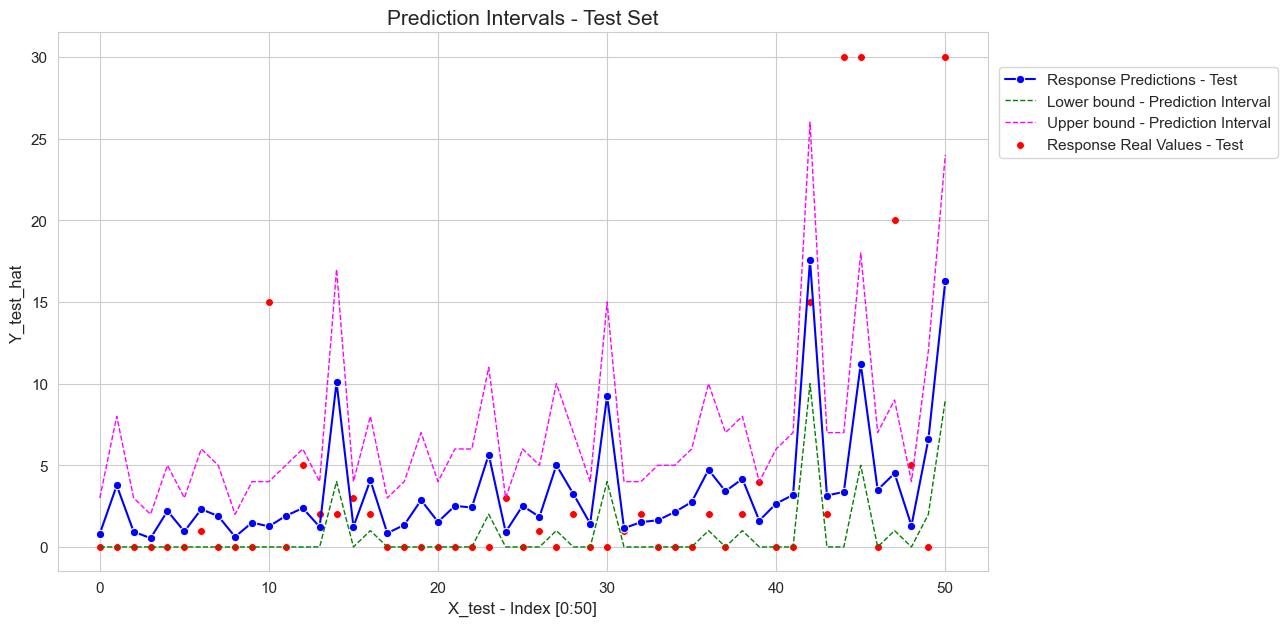

The percentage of real values of the response (all the red points) that are out of the prediction intervals is 26.94 %


In [148]:
prediction_intervals_monte_carlo(X[predictors_selected['ST_inter']], Y, 
                                 pred_to_dummies=None, 
                                 interactions_to_add=interactions_selected['ST_inter'], 
                                 alpha=0.05, train_size=0.70, seed=123, subset_len=50, figsize=(12,7),
                                 n_simulations=5000)

#### **Coefficient Interpretation: theory**

##### **Without interactions**

**Interpretation of quantitative predictors**

Suppose that $\mathcal{X}_j$ is a **quantitative** variable. 

We have the following estimation:


$$\widehat{\eta}_i = \widehat{\beta}_0 + \widehat{\beta}_{1}\cdot x_{i1} + \dots +  \widehat{\beta}_{j} \cdot x_{ij} + \dots +   \widehat{\beta}_{p}\cdot x_{ip}$$

- If $\mathcal{X}_j$ increases in $h>0$ units, in sample terms, the new value of the variable $X_j$ is $X_j + c$, and we can express this as $X'_j =X_j +c$, then:

    $$odds = \dfrac{\widehat{\mu}_i | x'_{ij} = x_{ij}+h}{\widehat{\mu}_i |  x_{ij}} = \dfrac{e^{\widehat{\eta}_i |x'_{ij}} }{e^{\widehat{\eta}_i |x_{ij}}} = e^{\widehat{\eta}_i |x'_{ij} - \widehat{\eta}_i |x_{ij}} = e^{h  \widehat{\beta}_j}$$

    Therefore:

    $$\widehat{\mu}_i | \small{x'_{ij} = x_{ij}+h}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{h  \widehat{\beta}_j} \cdot \widehat{\mu}_i |  \small{x_{ij}}$$

    **Interpretation:**

    - If $\widehat{\beta}_j > 0 \hspace{0.2cm} (e^{h  \widehat{\beta}_j} > 1)$, then:

       - $\widehat{\mu}_i$ is $e^{h  \widehat{\beta}_j}$ times higher if $x_{ij}$ increases in $h>0$ units, for $\small{i=1,\dots,n}$.

    - If $\widehat{\beta}_j < 0 \hspace{0.2cm} (e^{h  \widehat{\beta}_j} < 1)$, then:

       - $\widehat{\mu}_i$ is $1 / e^{h  \widehat{\beta}_j}$ times lower if $x_{ij}$ increases in $h>0$ units, for $\small{i=1,\dots,n}$.

    Observation: the reasoning is analogous if the predictor decreases rather than increases, but in the opposite sense.

**Interpretation of categorical predictors**

Suppose that $\mathcal{X}_j$ is a **categorical** variable with $g$ categories $(Range(\mathcal{X}_j) = \lbrace 0,1,\dots, g-1\rbrace)$. 

$\mathcal{X}_j$ enter in the model with $g-1$ dummy predictors. Considering $0$ as the reference category, these dummy predictors that enter in the model to represent $\mathcal{X}_j$ are the following:

$$X_{j1},X_{j2},\dots , X_{j(g-1)}$$

with their associated beta parameters:

$$\beta_{j1}, \beta_{j2}, \dots , \beta_{j(g-1)}$$

Where: 

$$x_{ijr} = \begin{cases}
             1, \quad x_{ij} = r \\
             0, \quad x_{ij} \neq r
             \end{cases}$$

Note that $x_{ijr} = 1$ is equivalent to $x_{ij} = r$, and $x_{ij}=0$ is equivalent to $x_{ijr}=0$ for all $\small{r=1,2, \dots, g-1}$.

The estimation  would be:


$$\widehat{\eta}_i = \widehat{\beta}_0 + \widehat{\beta}_{1}\cdot x_{i1} +  \dots +  \widehat{\beta}_{j1} \cdot x_{i j1} + \widehat{\beta}_{j2} \cdot x_{i j2} + \dots + \widehat{\beta}_{j(g-1)} \cdot x_{i j(g-1)} + \dots +   \widehat{\beta}_{p}\cdot x_{ip}$$

- Comparison between category $r$ and $0$ (the reference category):

    $$odds = \dfrac{\widehat{\mu}_i | x_{ij} = r}{\widehat{\mu}_i |  x_{ij} = 0} = \dfrac{e^{\widehat{\eta}_i |x_{ijr} = 1} }{e^{\widehat{\eta}_i |x_{ij}=0}} = e^{\widehat{\eta}_i |x_{ijr} = 1 - \widehat{\eta}_i |x_{ij}=0} = e^{ \widehat{\beta}_{jr}}$$

    Therefore:

    $$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{ \widehat{\beta}_{jr}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$

    **Interpretation:**

    - If $\widehat{\beta}_{jr} > 0 \hspace{0.2cm} (e^{\widehat{\beta}_{jr}} > 1)$, then:

       - $\widehat{\mu}_i$ is $e^{\widehat{\beta}_{jr}}$ times higher if $x_{ij}=r$  than if $x_{ij}=0$, for $\small{i=1,\dots,n}$.

    - If $\widehat{\beta}_{jr} < 0 \hspace{0.2cm} (e^{\widehat{\beta}_{jr}} < 1)$, then:

       - $\widehat{\mu}_i$ is $1 / e^{\widehat{\beta}_{jr}}$ times lower if $x_{ij}=r$ than if $x_{ij}=0$, for $\small{i=1,\dots,n}$.


- Comparison between category $r_1$ and $r_2$ (the reference category):

   $$odds = \dfrac{\widehat{\mu}_i | x_{ij} = r_1}{\widehat{\mu}_i |  x_{ij} = r_2} = \dfrac{e^{\widehat{\eta}_i |x_{ijr_1} = 1} }{e^{\widehat{\eta}_i |x_{ijr_2}=1}} = e^{\widehat{\eta}_i |x_{ijr_1} = 1 - \widehat{\eta}_i |x_{ijr_2}=1} = e^{ \widehat{\beta}_{jr_1} - \widehat{\beta}_{jr_2}}$$

   Therefore:

   $$\widehat{\mu}_i | \small{x_{ij} = r_1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{ \widehat{\beta}_{jr_1} -\widehat{\beta}_{jr_2}} \cdot \widehat{\mu}_i |  \small{x_{ij}=r_2}$$

   **Interpretation:**

   - If $\widehat{\beta}_{jr_1} -\widehat{\beta}_{jr_2} > 0 \hspace{0.2cm} (e^{ \widehat{\beta}_{jr_1} -\widehat{\beta}_{jr_2}}  > 1)$, then:

      - $\widehat{\mu}_i$ is $e^{ \widehat{\beta}_{jr_1} -\widehat{\beta}_{jr_2}}$ times higher if $x_{ij}=r_1$  thant if $x_{ij}=r_2$, for $\small{i=1,\dots,n}$.

   - If $\widehat{\beta}_{jr} < 0 \hspace{0.2cm} (e^{ \widehat{\beta}_{jr_1} -\widehat{\beta}_{jr_2}}  < 1)$, then:

      - $\widehat{\mu}_i$ is $1 / e^{ \widehat{\beta}_{jr_1} -\widehat{\beta}_{jr_2}}$ times lower if $x_{ij}=r_1$ thant if $x_{ij}=r_2$, for $\small{i=1,\dots,n}$.


##### **With interactions**

Suppose that $X_{j}$ is quantitative and $X_h$ is categorical with $g$ categories $\lbrace 0, 1, \dots, g-1\rbrace$ and the reference category is $0$.

And also suppose that the model includes an interaction between $X_j$ and $X_h$, then:

$$\widehat{\eta}_i = \widehat{\beta}_0 + \dots + \widehat{\beta}_j\cdot x_{ij} 
+ \widehat{\beta}_{h1} \cdot x_{i h1} + \dots + \widehat{\beta}_{h(g-1)} \cdot x_{i h(g-1)} + \\[0.15cm]

+ \widehat{\beta}_{jh1}\cdot x_{ij}\cdot x_{ih1} + \dots +   \widehat{\beta}_{jh(g-1)}\cdot x_{ij}\cdot x_{ih(g-1)}$$

Where:

- $\widehat{\beta}_{jh}$ is the coefficient fot he interaction between $X_j$ and $X_k$.

- $\widehat{\beta}_{jhr}$ is the coefficient fot he interaction between $X_j$ and $X_{hr}$ (the dummy variable associated to the category $r$ of $X_h$), for $\small{r=1,2,\dots,g-1}.$



**Quantitative predictors:**

- If $\mathcal{X}_j$ increases in $w>0$ units, in sample terms, the new value of the variable $X_j$ is $X_j + w$, and we can express this as $X'_j =X_j +w$, then:

    $$odds = \dfrac{\widehat{\mu}_i | x'_{ij} = x_{ij}+h}{\widehat{\mu}_i |  x_{ij}} = \dfrac{e^{\widehat{\eta}_i |x'_{ij}} }{e^{\widehat{\eta}_i |x_{ij}}} = e^{\widehat{\eta}_i |x'_{ij} - \widehat{\eta}_i |x_{ij}} = e^{\phi(\cdot)}$$


    Therefore:

    $$\widehat{\mu}_i | \small{x'_{ij} = x_{ij}+w}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\phi(\cdot)} \cdot \widehat{\mu}_i |  \small{x_{ij}}$$

    Where:

    $$\phi(\cdot) = \phi\left(x_{ih1}, x_{ih2}, \dots, x_{ih(g-1)}\right) = w\cdot \widehat{\beta}_j + w\cdot x_{ih1} \cdot \widehat{\beta}_{jh1}+ \dots + w\cdot x_{ih(g-1)} \cdot \widehat{\beta}_{jh(g-1)}$$


    **Interpretation:**

    Now the interpretation not only depend on the coefficient of the variable, but also on the coefficients and value of the categorical predictor with which an interaction has been set. 

    Let's suppose an individual with $x_{ih} = r$, i.e. $x_{ihr}=1$, then $\phi(\cdot) = w\cdot (\widehat{\beta}_j + \widehat{\beta}_{jhr})$.

    - If $\widehat{\beta}_j + \widehat{\beta}_{jhr} > 0$ $\hspace{0.15cm} (e^{w (\widehat{\beta}_j + \widehat{\beta}_{jhr})} > 1)$, is fulfilled that:
    
        - $\widehat{\mu}_i$ is $e^{w \hspace{0.05cm} \cdot (\widehat{\beta}_j + \widehat{\beta}_{jhr})} $ times higher if $x_{ij}$ increases in $w>0$ units, for $\small{i=1,\dots,n}$.

    - If $\widehat{\beta}_j + \widehat{\beta}_{jhr} < 0$ $\hspace{0.15cm} (e^{w (\widehat{\beta}_j + \widehat{\beta}_{jhr})} < 1)$, is fulfilled that:
    
        - $\widehat{\mu}_i$ is $e^{w(\widehat{\beta}_j + \widehat{\beta}_{jhr})} $ times lower if $x_{ij}$ increases in $w>0$ units, for $\small{i=1,\dots,n}$.

    Observation: the reasoning is analogous if the predictor decreases rather than increases, but in the opposite sense.

**Categorical predictors:**

- Comparison between category $r$ and $0$ (the reference category) in $X_h$:

    $$odds = \dfrac{\widehat{\mu}_i | x_{ih} = r}{\widehat{\mu}_i |  x_{ih}=0} = \dfrac{e^{\widehat{\eta}_i | x_{ih} = r} }{e^{\widehat{\eta}_i |x_{ih}=0}} = e^{\widehat{\eta}_i |x_{ih}=r - \widehat{\eta}_i |x_{ih}=0} = e^{\phi(\cdot)}$$


    Therefore:

    $$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\phi(\cdot)} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$

    Where:

    $$\phi(\cdot) = \phi(x_{ij}) = \widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr}$$

    **Interpretation:**

    Now the interpretation not only depend on the coefficient of the variable, but also on the coefficients and value of the quantitative predictor with which an interaction has been set. 

    - If $\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr} > 0$ $\hspace{0.15cm} (e^{\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr}} > 1)$, is fulfilled that:
    
        - $\widehat{\mu}_i$ is $e^{\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr}} $ times higher if $x_{ih}=r$ than if $x_{ih}=0$, for $\small{i=1,\dots,n}$.

    - If $\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr} < 0$ $\hspace{0.15cm} (e^{\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr}} < 1)$, is fulfilled that:
    
        - $\widehat{\mu}_i$ is $e^{\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr}} $ times lower if $x_{ih}=r$ than if $x_{ih}=0$, for $\small{i=1,\dots,n}$.


- Comparison between category $r_1$ and $r_2$ (the reference category) in $X_h$:

    $$odds = \dfrac{\widehat{\mu}_i | x_{ih} = r_1}{\widehat{\mu}_i |  x_{ih}=r_2} = \dfrac{e^{\widehat{\eta}_i | x_{ih} = r_1} }{e^{\widehat{\eta}_i |x_{ih}=r_2}} = e^{\widehat{\eta}_i |x_{ih}=r_1 - \widehat{\eta}_i |x_{ih}=r_2} = e^{\phi(\cdot)}$$


    Therefore:

    $$\widehat{\mu}_i | \small{x_{ij} = r_1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\phi(\cdot)} \cdot \widehat{\mu}_i |  \small{x_{ij}=r_2}$$

    Where:

    $$\phi(\cdot) = \phi(x_{ij}) = (\widehat{\beta}_{hr_1}- \widehat{\beta}_{hr_2})+  x_{ij} \cdot (\widehat{\beta}_{jhr_1}-\widehat{\beta}_{jhr_2})$$

    **Interpretation:**

    Now the interpretation not only depend on the coefficient of the variable, but also on the coefficients and value of the quantitative predictor with which an interaction has been set. 

    - If $(\widehat{\beta}_{hr_1}- \widehat{\beta}_{hr_2})+  x_{ij} \cdot (\widehat{\beta}_{jhr_1}-\widehat{\beta}_{jhr_2}) > 0$ $\hspace{0.15cm} (e^{\phi(\cdot)} > 1)$, is fulfilled that:
    
        - $\widehat{\mu}_i$ is $e^{\phi(\cdot)} $ times higher if $x_{ih}=r_1$ than if $x_{ih}=r_2$, for $\small{i=1,\dots,n}$.

    - If $(\widehat{\beta}_{hr_1}- \widehat{\beta}_{hr_2})+  x_{ij} \cdot (\widehat{\beta}_{jhr_1}-\widehat{\beta}_{jhr_2}) < 0$ $\hspace{0.15cm} (e^{\phi(\cdot)} < 1)$, is fulfilled that:
    
        - $\widehat{\mu}_i$ is $e^{\phi(\cdot)}$ times lower if $x_{ih}=r_1$ than if $x_{ih}=r_2$, for $\small{i=1,\dots,n}$.


#### **Coefficient Interpretation: application**

The best model for prediction may not be the best for interpretation. 

In order to make this section more complete, we will use a model with interactions and dummies.

In [149]:
predictors_interpretation = ['PhysHlth', 'CholCheck', 'NoDocbcCost', 'DiffWalk', 'HvyAlcoholConsump', 'Smoker', 'Sex']
interactions_interpretation = [('PhysHlth', 'Sex')]
pred_to_dummies_interpretation = [x for x in cat_predictors if x in predictors_interpretation]

In [150]:
interpretation_model = poisson_model(Y=Y_train, X=X_train[predictors_interpretation])
interpretation_model.fit(pred_to_dummies=pred_to_dummies_interpretation, 
                                                    interactions_to_add=interactions_interpretation)

In [151]:
print(interpretation_model.poisson_fit.summary())

                    GeneralizedPoisson Regression Results                     
Dep. Variable:               MentHlth   No. Observations:                49484
Model:             GeneralizedPoisson   Df Residuals:                    49476
Method:                           MLE   Df Model:                            7
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                 0.03991
Time:                        11:11:53   Log-Likelihood:                -85707.
converged:                      False   LL-Null:                       -89269.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
PhysHlth                0.0380      0.001     43.704      0.000       0.036       0.040
CholCheck_1             0.7436      0.020     36.393      0.000       0.704       0.784
Smoker_1        

**Interpreting coefficient of `PhysHlth`**

The model has a interaction between `PhisHlth` $(X_j)$ and `Sex` $(X_h)$:

$$\widehat{\mu}_i | \small{x'_{ij} = x_{ij}+w}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\phi(\cdot)} \cdot \widehat{\mu}_i |  \small{x_{ij}}$$

Where:

$$\phi(\cdot) =  w\cdot \widehat{\beta}_j + w\cdot x_{ih1} \cdot \widehat{\beta}_{jh1}+ \dots + c\cdot x_{ih(g-1)} \cdot \widehat{\beta}_{jh(g-1)}$$

In this case $r\in \lbrace 0, 1\rbrace$, since `Sex` is a binary variable, therefore:

$$\phi(\cdot) =  w\cdot \widehat{\beta}_j + w\cdot x_{ih1} \cdot \widehat{\beta}_{jh1} =w\cdot\left( \widehat{\beta}_j +  x_{ih1} \cdot \widehat{\beta}_{jh1} \right) = w\cdot\left( 0.038 +  x_{ih1} \cdot 0.002 \right)$$

If $x_{ih1} = 1$, in other words, `Sex=1` (male), then:

$$\widehat{\mu}_i | \small{x'_{ij} = x_{ij}+w}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{ w\cdot 0.04} \cdot \widehat{\mu}_i |  \small{x_{ij}}$$

Since: 

$$\phi(\cdot) =  w\cdot 0.04$$

Therefore:

- If the number of days with not good physical health (in the last 30 gays) of a **male** increases in 1 day $(w=1)$, then the average number of days with bad mental health (in the las 30 days) is $1.04$ times greater. And if the increment is in 10 days $(w=10)$ of bad physical health, the increment in the bad mental health is in $1.50$ times.

- For males, when the number of days with bad physical health increases, the number of days with poor mental health increases as well. And, the more days with bad physical health, the more days with bad mental health. And, higher increases in the number of days with bad physical healths lead to higher increases in the number of days with poor mental health. 

If $x_{ih1} = 0$, in other words, `Sex=0` (female), then:

$$\widehat{\mu}_i | \small{x'_{ij} = x_{ij}+w}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{ w\cdot 0.038} \cdot \widehat{\mu}_i |  \small{x_{ij}}$$

Since: 

$$\phi(\cdot) =  w\cdot 0.038$$

Therefore:

- If the number of days with not good physical health (in the last 30 gays) of a **female** increases in 1 day $(w=1)$, then the average number of days with bad mental health (in the las 30 days) is $1.038$ times greater. And if the increment is in 10 days $(w=10)$ of bad physical health, the increment in the bad mental health is in $1.46$ times.

- For females, when the number of days with bad physical health increases, the number of days with poor mental health increases as well. And, the more days with bad physical health, the more days with bad mental health. And, higher increases in the number of days with bad physical healths lead to higher increases in the number of days with poor mental health. 

So, for both males and females, if they experiment an increases in the number off days with bad physical health, they will experiment an increases in the number of days with poor mental health as well, but in the case of males with a little bit higher intensity than females.

**Interpreting coefficient of `CholCheck`**

$$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{jr}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$


In this case $r\in \lbrace 0,1\rbrace$, then:

$$\widehat{\mu}_i | \small{x_{ij} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\widehat{\beta}_{j1}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = e^{0.74} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}   \hspace{0.15cm}  \\[0.3cm] \hspace{1.3cm} = 2.1 \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$



- People with cholesterol check in the last 5 years have on average $2.1$ times more days with poor mental health than people without cholesterol check.



**Interpreting coefficient of `Smoker`**

$$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{jr}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$


In this case $r\in \lbrace 0,1\rbrace$, then:

$$\widehat{\mu}_i | \small{x_{ij} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{j1}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = e^{0.1514} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}   \hspace{0.15cm}  \\[0.3cm] \hspace{1.3cm} = 1.16 \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$



- Smokers have on average $1.16$ times more days with poor mental health than no smokers.

**Interpreting coefficient of `HvtAlcoholConsump`**

$$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{jr}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$


In this case $r\in \lbrace 0,1\rbrace$, then:

$$\widehat{\mu}_i | \small{x_{ij} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{j1}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = e^{0.348} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}   \hspace{0.15cm}  \\[0.3cm] \hspace{1.3cm} = 1.41 \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$



- Heavy alcohol consumers have on average $1.41$ times more days of poor mental health than not heavy consumers.

**Interpreting coefficient of `NoDobcCost`**

$$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{jr}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$


In this case $r\in \lbrace 0,1\rbrace$, then:

$$\widehat{\mu}_i | \small{x_{ij} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{j1}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = e^{0.783} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}   \hspace{0.15cm}  \\[0.3cm] \hspace{1.3cm} = 2.19 \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$



- People that cannot afford medical services (sometime in the last 12 months) have on average $2.19$ times more days of poor mental health than people who can.

**Interpreting coefficient of `Diffwalk`**

$$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{jr}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$


In this case $r\in \lbrace 0,1\rbrace$, then:

$$\widehat{\mu}_i | \small{x_{ij} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\hat{\beta}_{j1}} \cdot \widehat{\mu}_i |  \small{x_{ij}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = e^{0.33} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}   \hspace{0.15cm}  \\[0.3cm] \hspace{1.3cm} = 1.40 \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$



- People with difficulties for walking have on average $1.40$ times more days of poor mental health  than people without. 

**Interpreting coefficient of `Sex`**

The model has a interaction between `PhisHlth` $(X_j)$ and `Sex` $(X_h)$, as we said before.

$$\widehat{\mu}_i | \small{x_{ij} = r}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\widehat{\beta}_{hr} + x_{ij}\cdot \widehat{\beta}_{jhr} } \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$


In this case $r\in \lbrace 0,1\rbrace$, then:

$$\widehat{\mu}_i | \small{x_{ij} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{\widehat{\beta}_{h1} + x_{ij}\cdot \widehat{\beta}_{jh1} } \cdot \widehat{\mu}_i |  \small{x_{ij}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = e^{-0.44 + x_{ij}\cdot 0.002} \cdot \widehat{\mu}_i |  \small{x_{ij}=0}$$



- If $x_{ij}=1$:

    $$\widehat{\mu}_i | \small{x_{ih} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{-0.44 +   0.002} \cdot \widehat{\mu}_i |  \small{x_{ih}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = 0.65 \cdot \widehat{\mu}_i |  \small{x_{ih}=0}$$

    - For people with $1$ day with bad physical health (in the las 30 days), females have on average $1.54$ times more days of poor mental health than males.
     
      

- If $x_{ij}=10$:

    $$\widehat{\mu}_i | \small{x_{ih} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{-0.44 +   0.02} \cdot \widehat{\mu}_i |  \small{x_{ih}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = 0.66 \cdot \widehat{\mu}_i |  \small{x_{ih}=0}$$

    - For people with $10$ days with bad physical health (in the las 30 days), females have on average $1.51$ times more days of poor mental health than males.
     
      

- If $x_{ij}=30$:

    $$\widehat{\mu}_i | \small{x_{ih} = 1}  \hspace{0.15cm} =   \hspace{0.15cm}  e^{-0.44 +   0.02} \cdot \widehat{\mu}_i |  \small{x_{ih}=0} \hspace{0.15cm}  \\[0.3cm]  \hspace{1.6cm} = 0.68 \cdot \widehat{\mu}_i |  \small{x_{ih}=0}$$

    - For people with $30$ days with bad physical health (in the las 30 days), females have on average $1.47$ times more days of poor mental health than males.
     
      

- Therefore, given a number of days with not good physical health, females have on average more days with poor mental health than males, but this difference is **slightly** lower when the number of days with not good physical health increases.